In [10]:
import os
import re
import sys
import pandas as pd
import numpy as np

In [11]:
"""
 data_source should be plain text content.  Content will be parsed for sentences.
 This is NOT a csv file with classes.
"""
view_tokens=False
#data_source = 'data/fairy_tales_every_child_should_know_pg14916.txt'
data_source = 'data/data_for_classification_text.txt'
model_path  = "models/{}".format(re.compile(r'\..*').sub('', os.path.basename(data_source)))


#open input file and tokenize
tokens = []
with open(data_source, 'r') as source:
    for line in source:
        line = re.sub(r'\W', ' ', line) 
        line_tokens = line.split( )
        line_tokens = [token.strip().lower() for token in line_tokens]
        tokens.append(line_tokens)

if (view_tokens):
    for idx in range(2):
        print tokens[idx]
print "DONE"

DONE


In [12]:
"""
 Source: Natural Language Processing in Action, Chapter 6
 Section: 6.5.2 Training domain specific word2vec model
"""
from gensim.models import word2vec

model = word2vec.Word2Vec(
    tokens,              # Our array of sentences, each of which is an array of words.
    min_count=3,         # Min number of word count to be considered
    workers=4,           # Number of threads in parallel. (cores on laptop)
    size=300,            # The number of weights in hidden layer, (length of word verctors)
    window=6,            # Context window size
    sample=1e-3          # subsampling rate for frequent terms
)

# Save disk space by saving only hidden neurons.  (We lose output weights)
model.init_sims(replace=True)

model.save(model_path)

print "DONE"

DONE


In [13]:
import pandas as pd
from gensim.models import KeyedVectors
from gensim.models import word2vec
model = word2vec.Word2Vec.load(model_path)
results = model.most_similar(positive=['amazon'], negative=[], topn=20)
#print results
data = pd.DataFrame(results)
print data.head(10)

word_vectors = KeyedVectors.load(model_path)
print model.similar_by_vector(word_vectors['staffing'], topn=1)


            0         1
0         aws  0.858267
1  blackberry  0.822535
2         api  0.792520
3   messaging  0.761271
4        apps  0.757644
5     desktop  0.751030
6      server  0.749170
7     instant  0.741904
8  salesforce  0.739736
9     brocade  0.729006
[('staffing', 1.0)]


In [14]:
"""
	1. Open a pretrained vector set 'data_for_classification_model'
	2. collect all vectors into one single 2d numpy array
	3. pass 2d array to minisom and train a map
	4. Save the map to som_map
"""
from ptpython.repl import embed
from minisom import MiniSom
from gensim.models import KeyedVectors
from gensim.models import word2vec
import numpy as np 

#INPUTS
b_collect_new_vectors = False
b_save_new_som_weights = True 
model_path = 'models/data_for_classification_text'
#OUTPUTS
vectors_path = 'models/vectors_array'
weights_path = 'models/som_weights_3'
# TRAINING INPUTS
_sigma = 5
_learning_rate = 0.8
_train_iterations = 200
#ENDINPUTS


print "Loading model {}".format(model_path)
word_vectors = KeyedVectors.load(model_path)
model = word2vec.Word2Vec.load(model_path)

if (b_collect_new_vectors):
    print "Saving 2d numpy array from word_vectors to {}".format(vectors_path)
    varrs = np.array([word_vectors[word] for word in word_vectors.wv.vocab.keys()])
    np.save(vectors_path, varrs)
else:
    print "Loading {}.py word vectors from disk".format(vectors_path)
    varrs = np.load("{}.npy".format(vectors_path))

print varrs.shape
som = MiniSom(x=128, y=128, input_len=300, sigma=_sigma, learning_rate=_learning_rate)
som.random_weights_init(varrs)
if (b_save_new_som_weights):
    print "Training:"
    print "sigma:", _sigma, "learning_rate:", _learning_rate, "train_iterations:",_train_iterations
    som.train_random(varrs, _train_iterations) # random training

    print "Saving {}".format(weights_path)
    np.save(weights_path, som.weights)


            
print "DONE"

Loading model models/data_for_classification_text
Loading models/vectors_array.py word vectors from disk
(53561, 300)
Training:
sigma: 5 learning_rate: 0.8 train_iterations: 200
Saving models/som_weights_3
DONE


Loading weights
Importing from data file
Processing url t4g.com
Length of words 504
Saving figure to fingerprints/t4g.com.png
Processing url allretailjobs.com
Length of words 502
Saving figure to fingerprints/allretailjobs.com.png
Processing url kraanbouwcomputing.nl
Length of words 504
Saving figure to fingerprints/kraanbouwcomputing.nl.png
Processing url iba.com.br
Length of words 502
Saving figure to fingerprints/iba.com.br.png
Processing url okta.com
Length of words 502
Saving figure to fingerprints/okta.com.png
Processing url technical-services.co.uk
Length of words 507
Saving figure to fingerprints/technical-services.co.uk.png
Processing url mjsoutsourcing.co.in
Length of words 507
Saving figure to fingerprints/mjsoutsourcing.co.in.png
Processing url pasigcity.gov.ph
Length of words 507
Saving figure to fingerprints/pasigcity.gov.ph.png
Processing url siriustechnical.com
Length of words 502
Saving figure to fingerprints/siriustechnical.com.png
Processing url future.se
Length of w

/Users/efrainolivares/envnltk/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Saving figure to fingerprints/frameusa.com.png
Processing url kikkoman.com
Length of words 509
Saving figure to fingerprints/kikkoman.com.png
Processing url qualitykiosk.com
Length of words 507
Saving figure to fingerprints/qualitykiosk.com.png
Processing url abbott-associates.com
Length of words 505
Saving figure to fingerprints/abbott-associates.com.png
Processing url jwmichaels.com
Length of words 505
Saving figure to fingerprints/jwmichaels.com.png
Processing url potentia.co.nz
Length of words 506
Saving figure to fingerprints/potentia.co.nz.png
Processing url cellcom.co.il
Length of words 437
Saving figure to fingerprints/cellcom.co.il.png
Processing url valtim.com
Length of words 510
Saving figure to fingerprints/valtim.com.png
Processing url c4j.be
Length of words 510
Saving figure to fingerprints/c4j.be.png
Processing url brightstarcare.com
Length of words 512
Saving figure to fingerprints/brightstarcare.com.png
Processing url cifncs.org
Length of words 509
Saving figure to fin

Saving figure to fingerprints/talentys.fr.png
Processing url synergyhire.com
Length of words 526
Saving figure to fingerprints/synergyhire.com.png
Processing url whitakermedical.com
Length of words 525
Saving figure to fingerprints/whitakermedical.com.png
Processing url hedima.es
Length of words 528
Saving figure to fingerprints/hedima.es.png
Processing url eciinc.net
Length of words 532
Saving figure to fingerprints/eciinc.net.png
Processing url gia.edu
Length of words 528
Saving figure to fingerprints/gia.edu.png
Processing url verifone.fr
Length of words 529
Saving figure to fingerprints/verifone.fr.png
Processing url amitech.in
Length of words 529
Saving figure to fingerprints/amitech.in.png
Processing url aureusmedical.com
Length of words 528
Saving figure to fingerprints/aureusmedical.com.png
Processing url runscale.com
Length of words 529
Saving figure to fingerprints/runscale.com.png
Processing url tidewaterbiblecollege.org
Length of words 528
Saving figure to fingerprints/tide

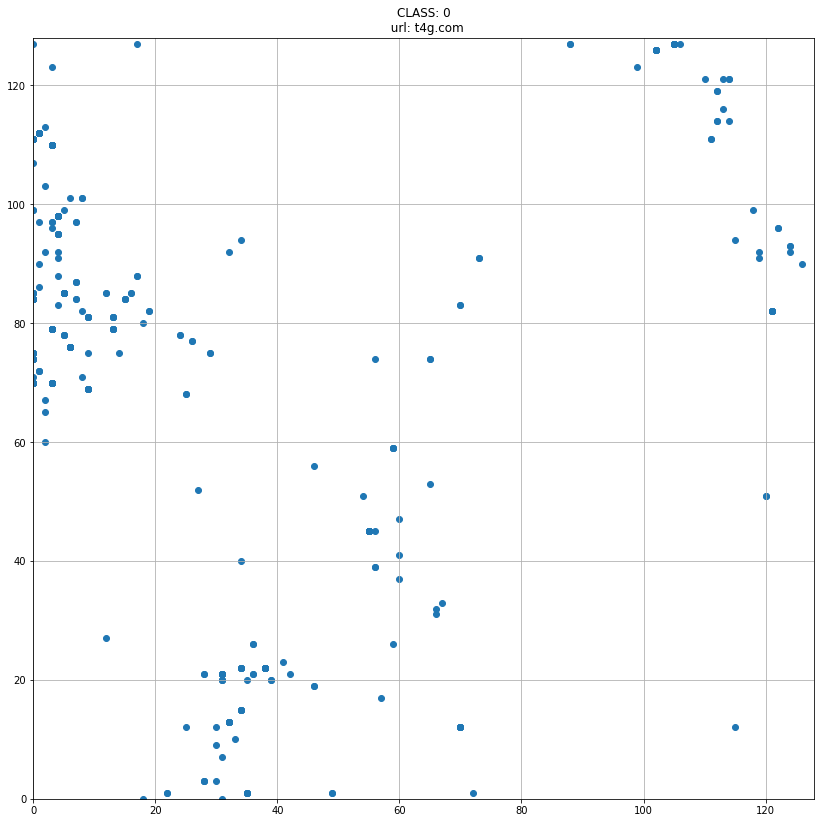

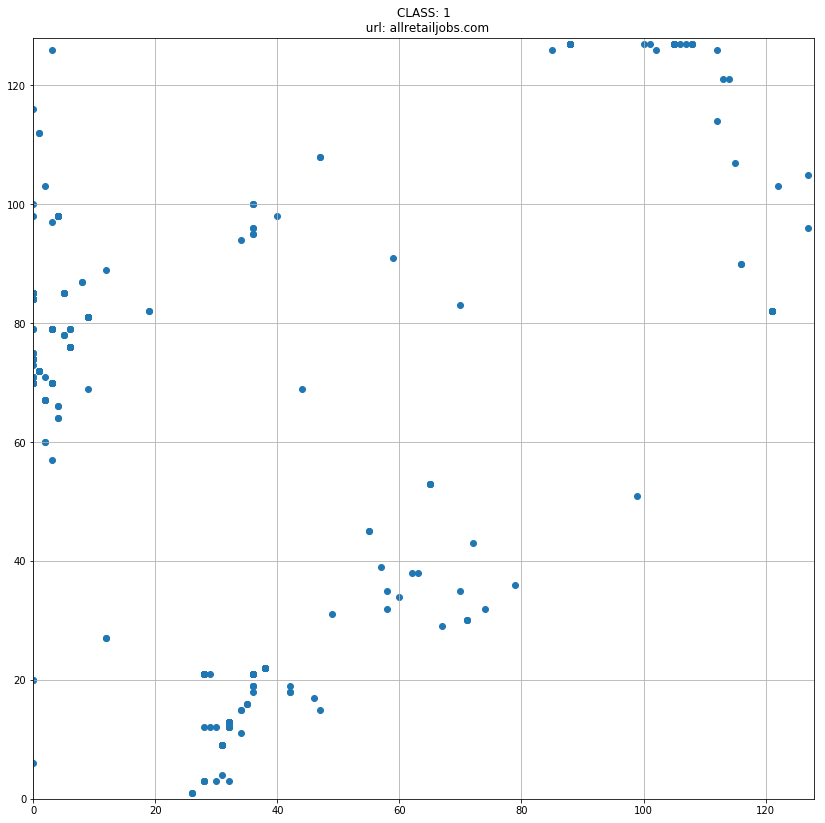

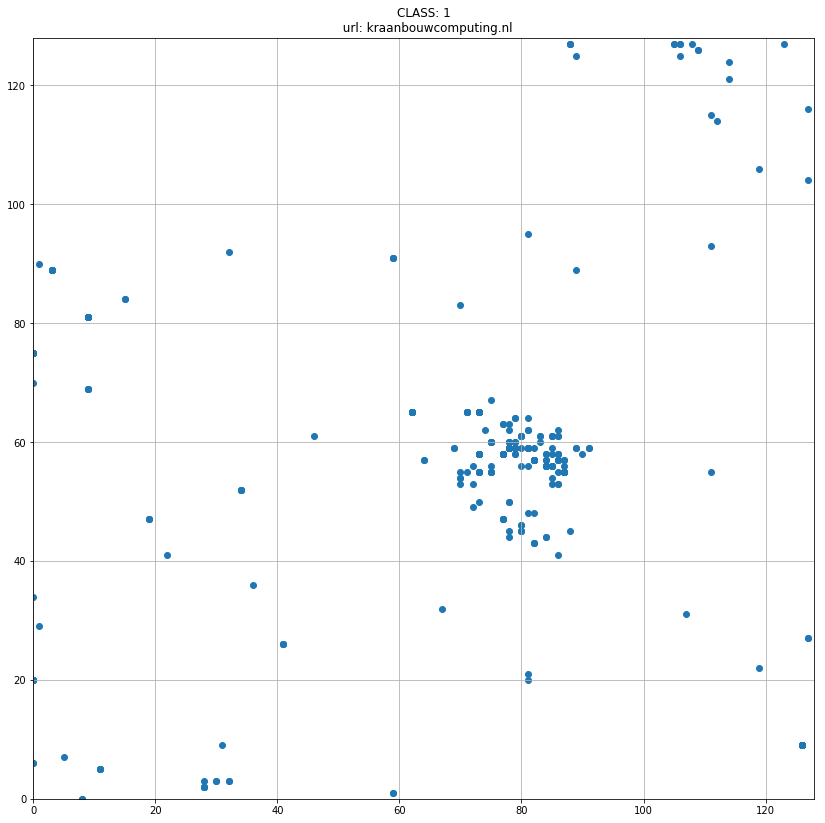

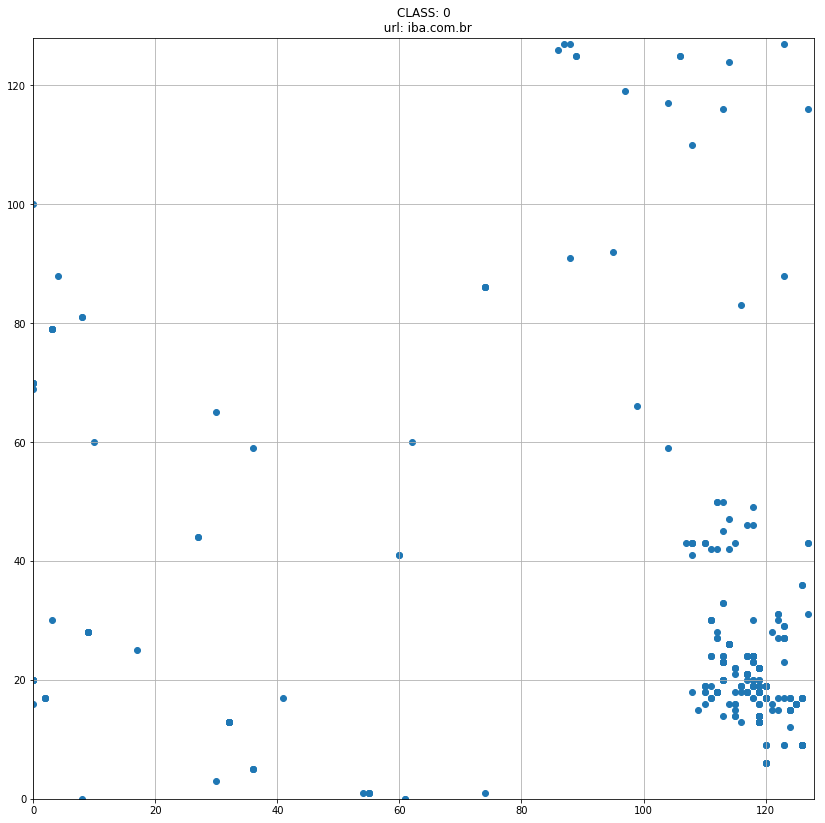

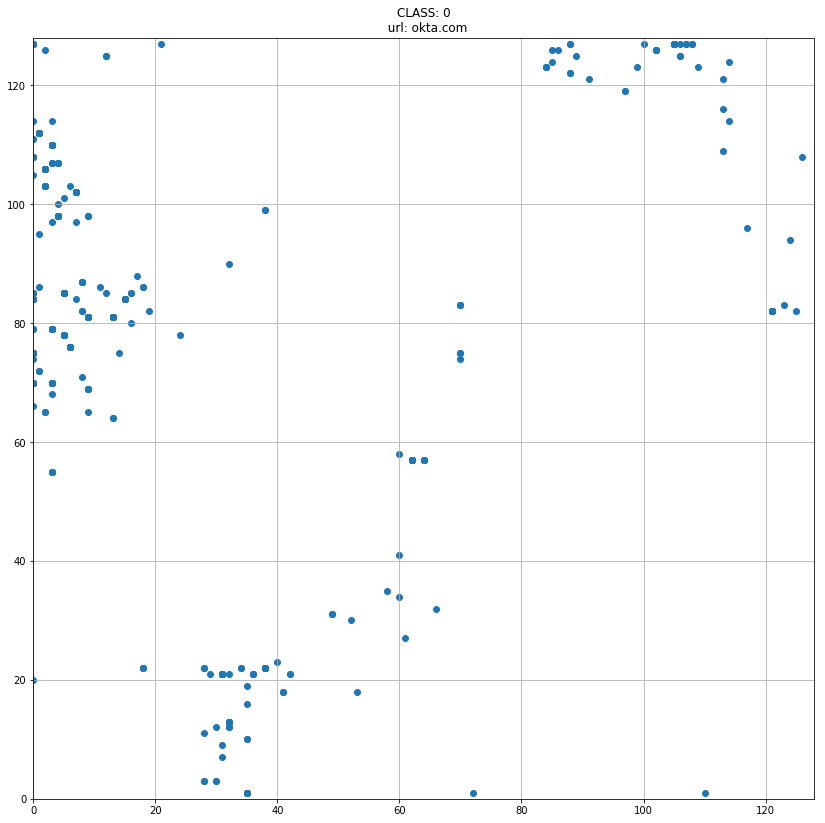

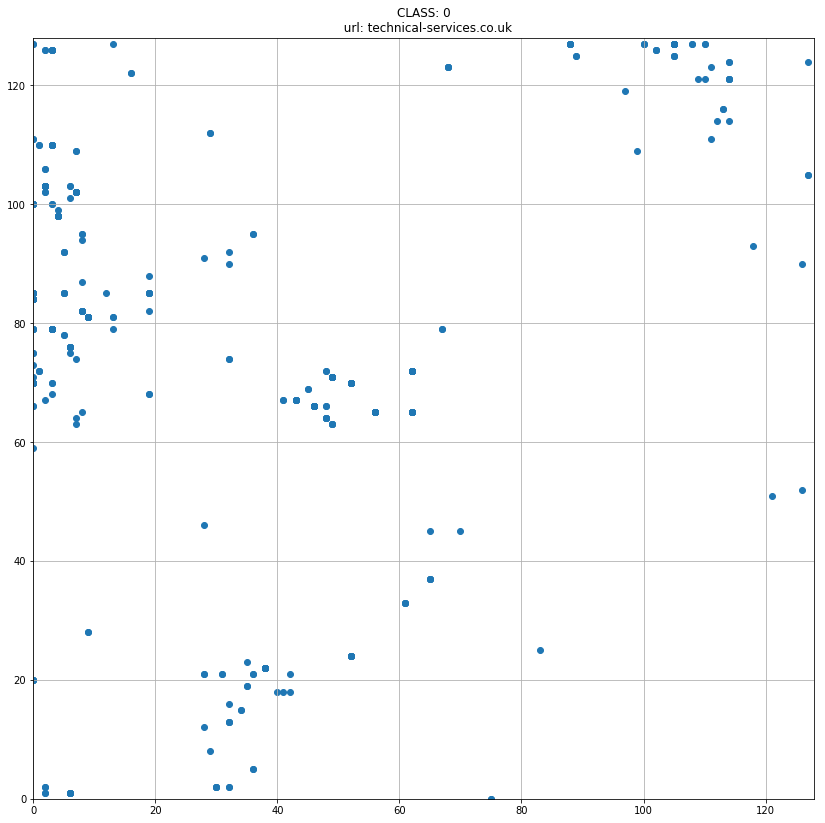

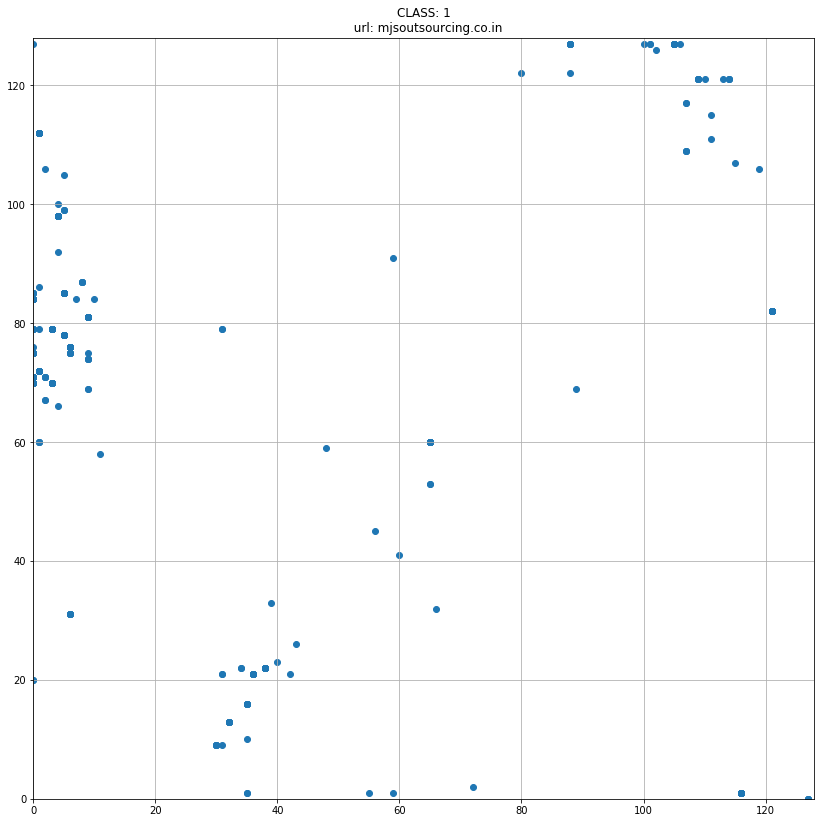

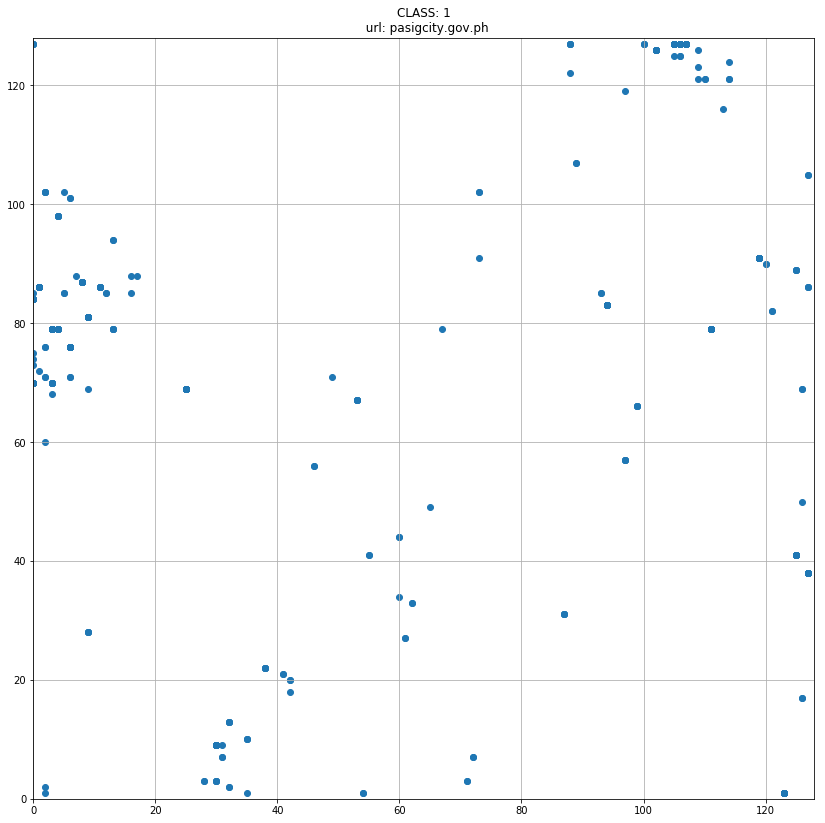

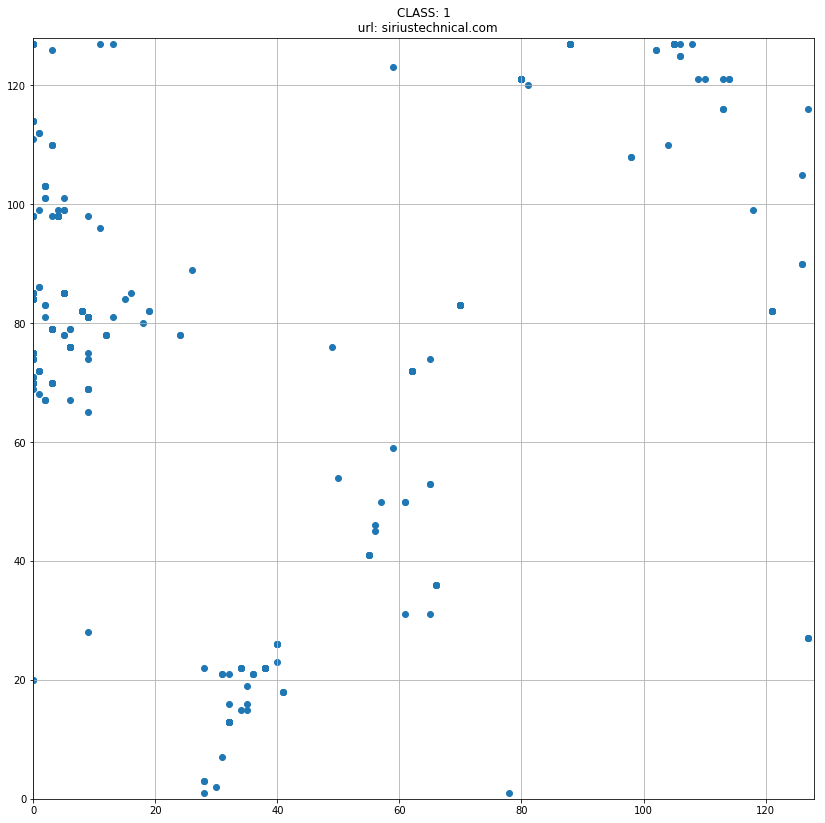

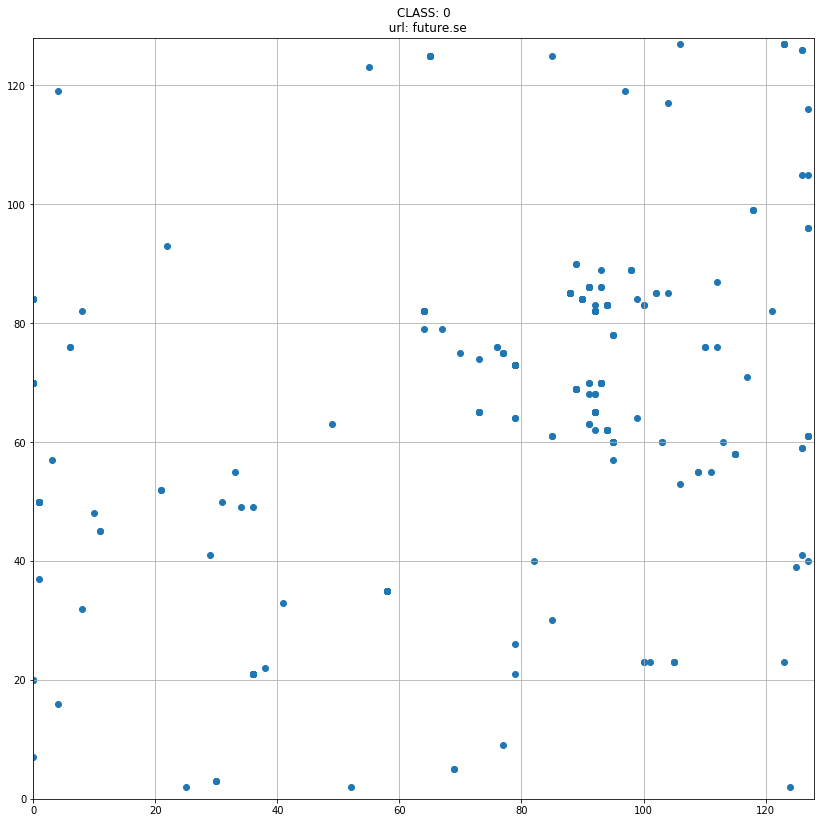

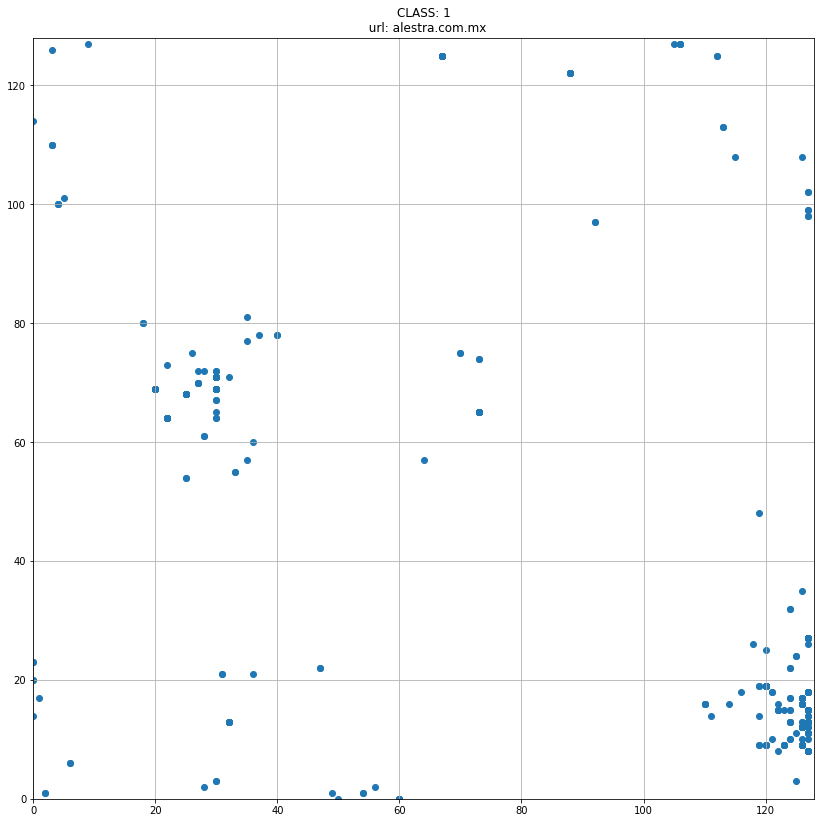

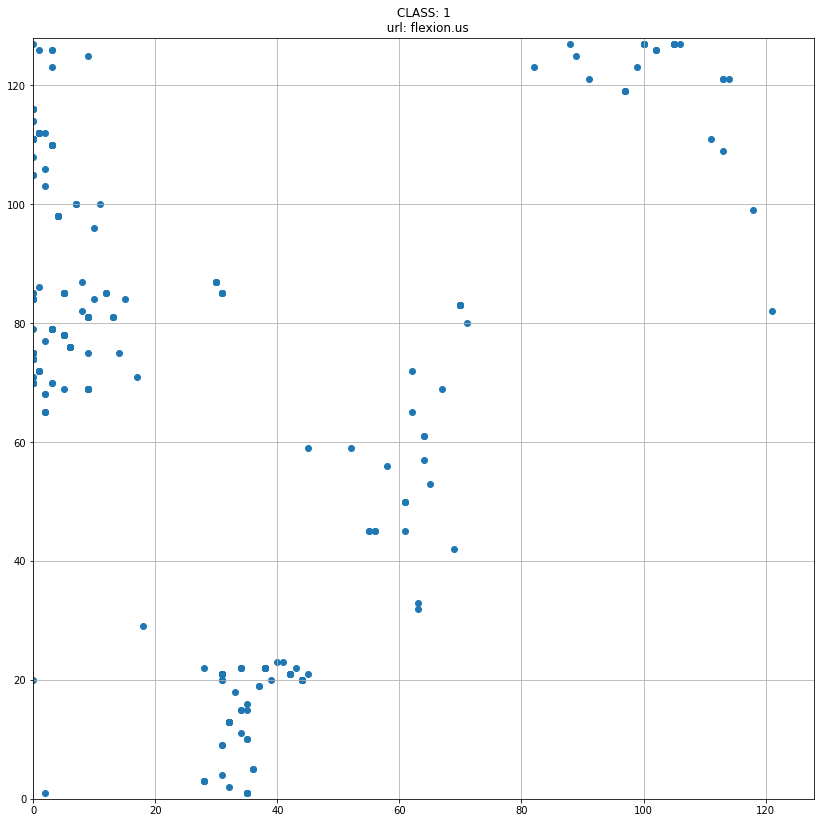

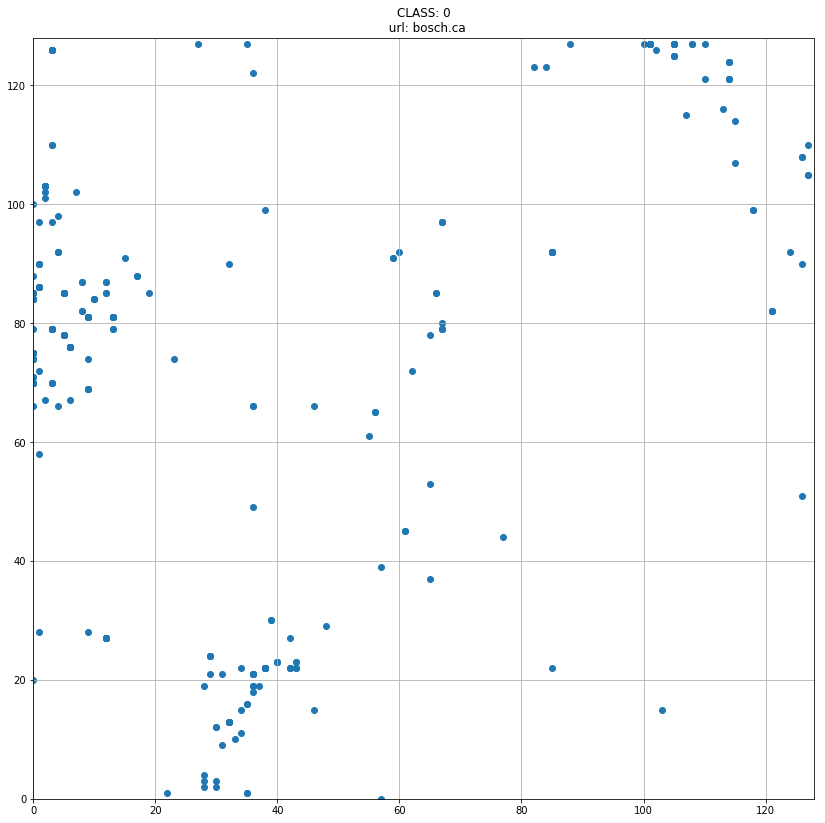

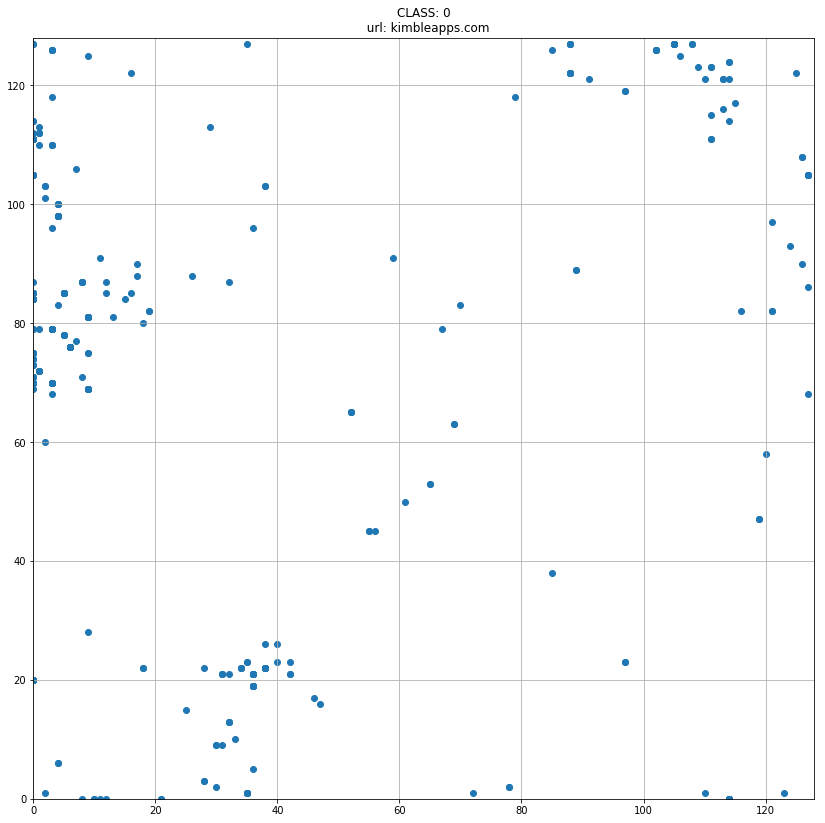

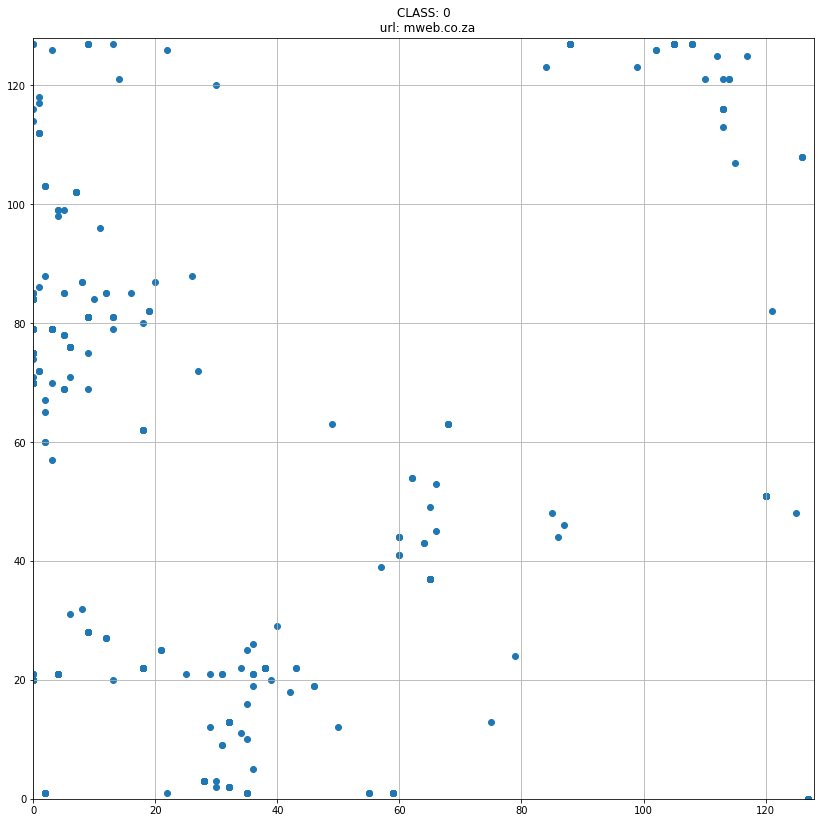

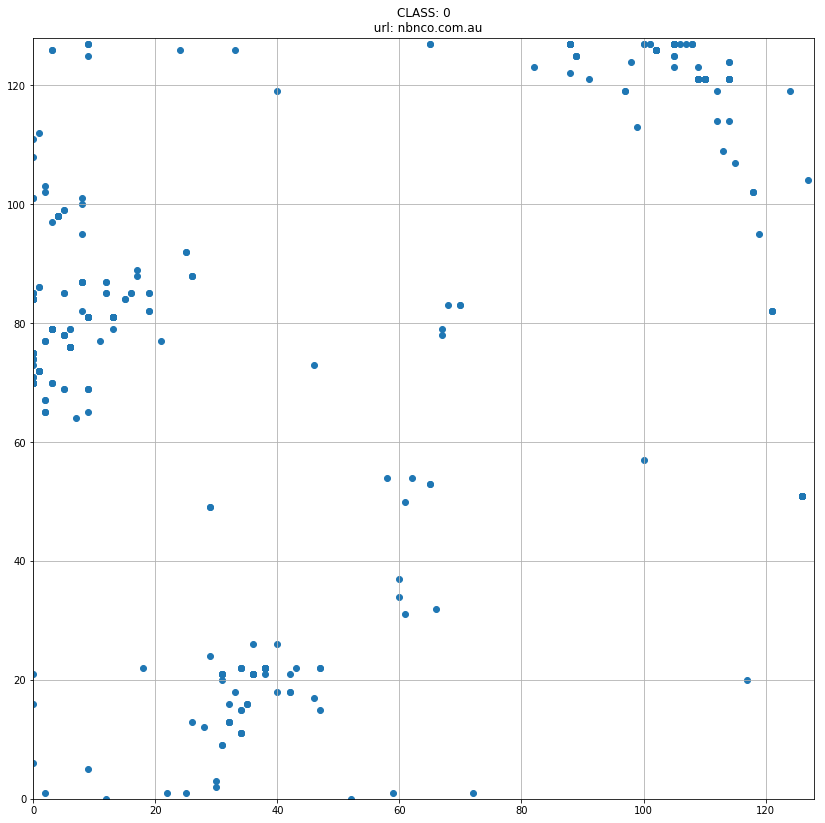

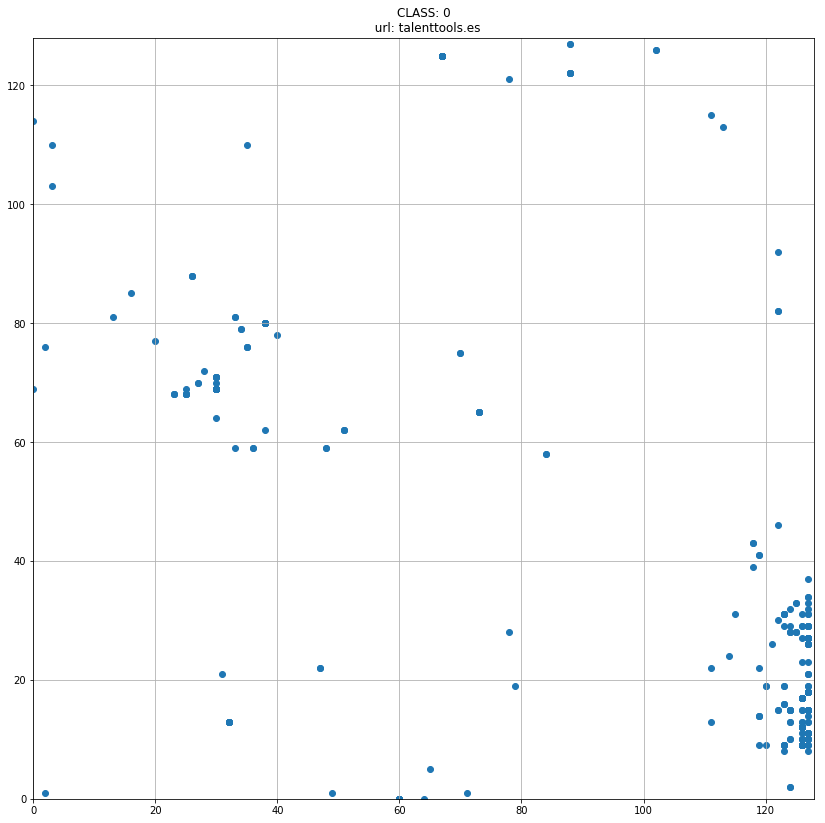

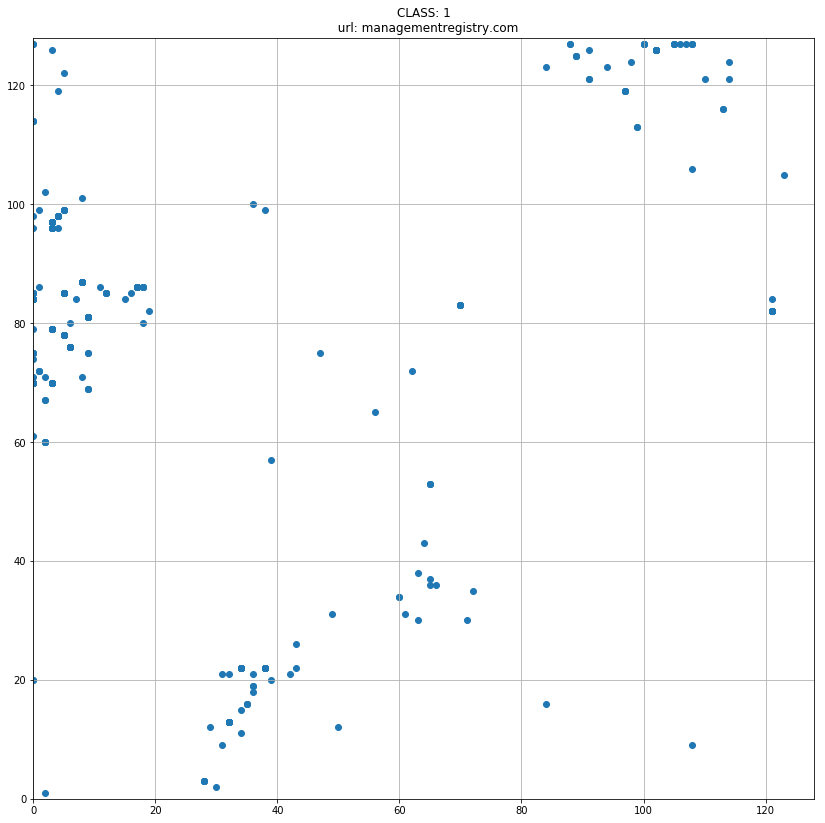

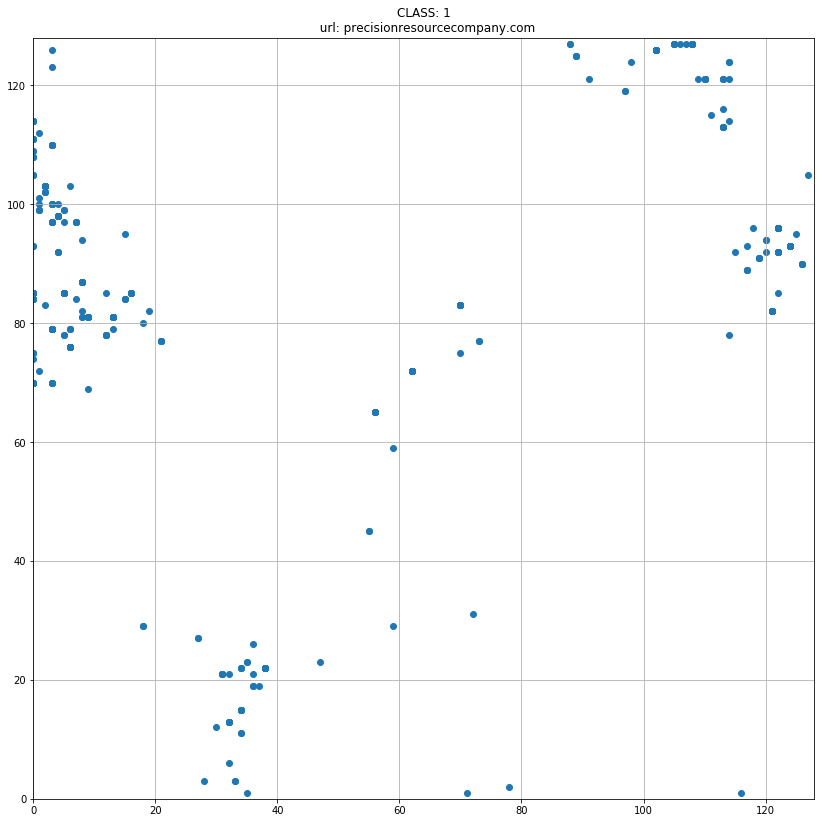

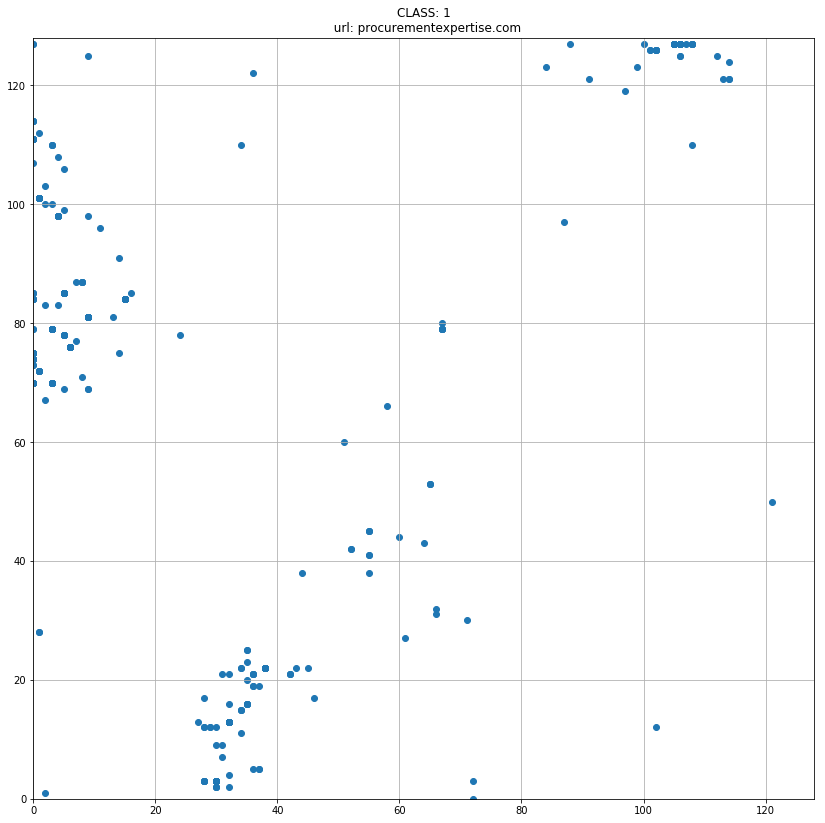

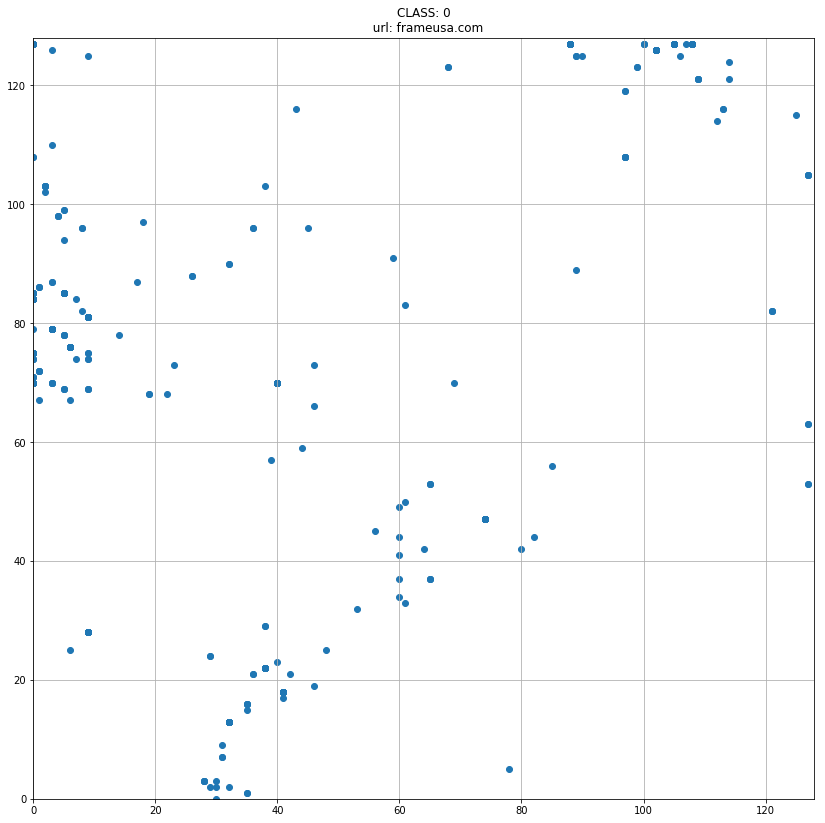

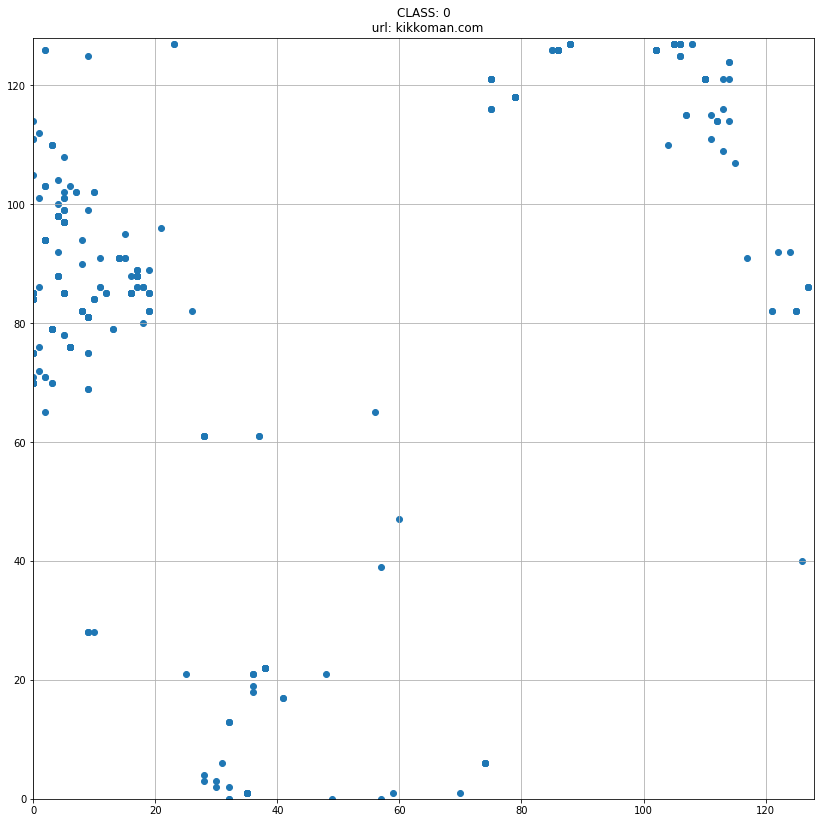

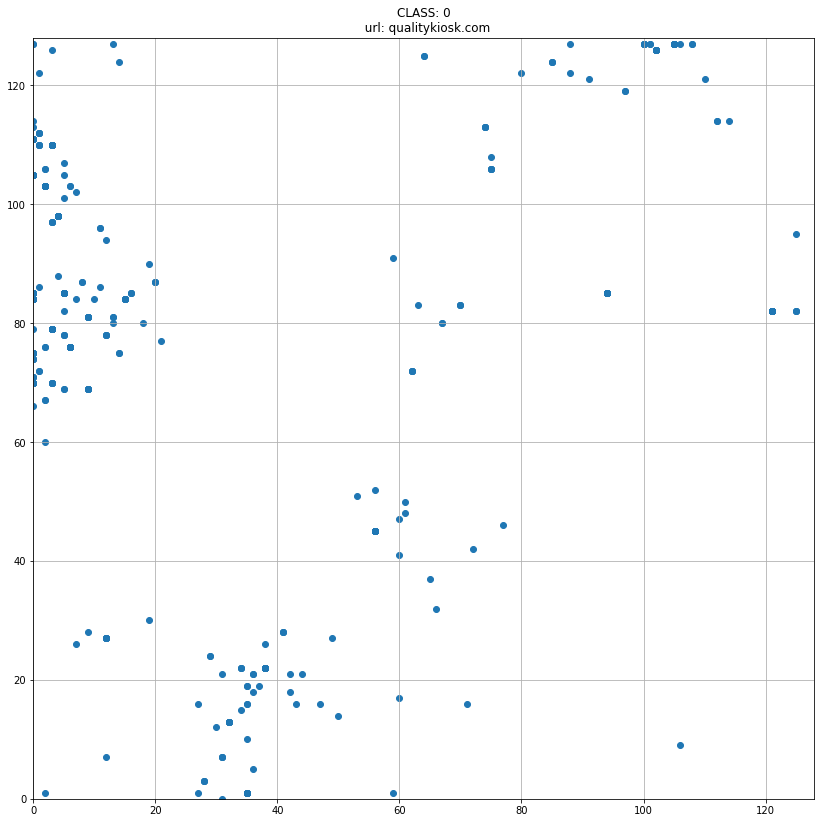

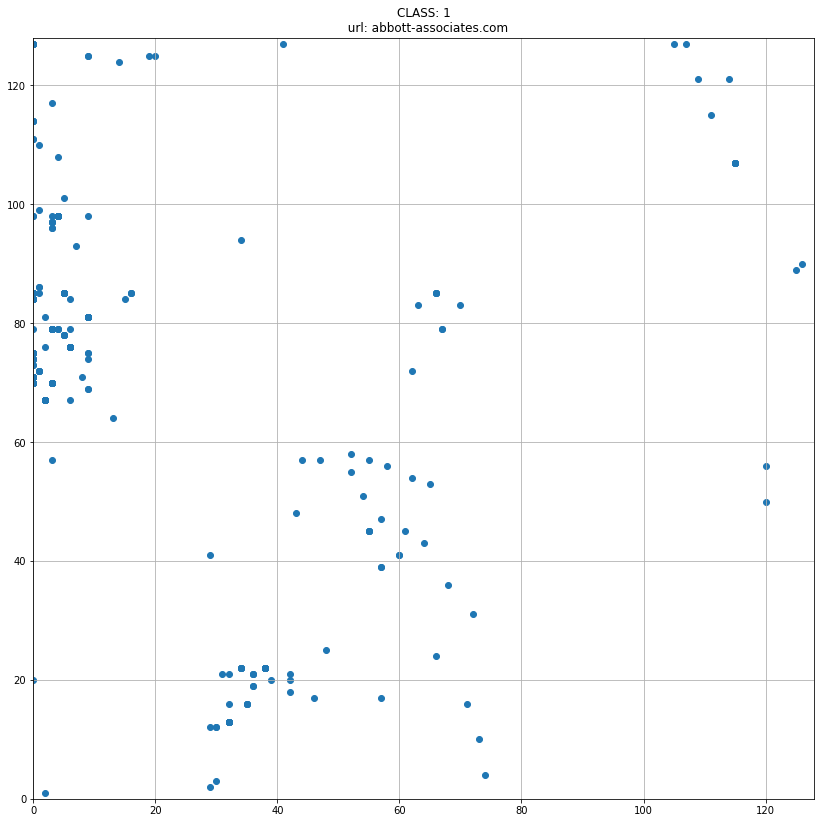

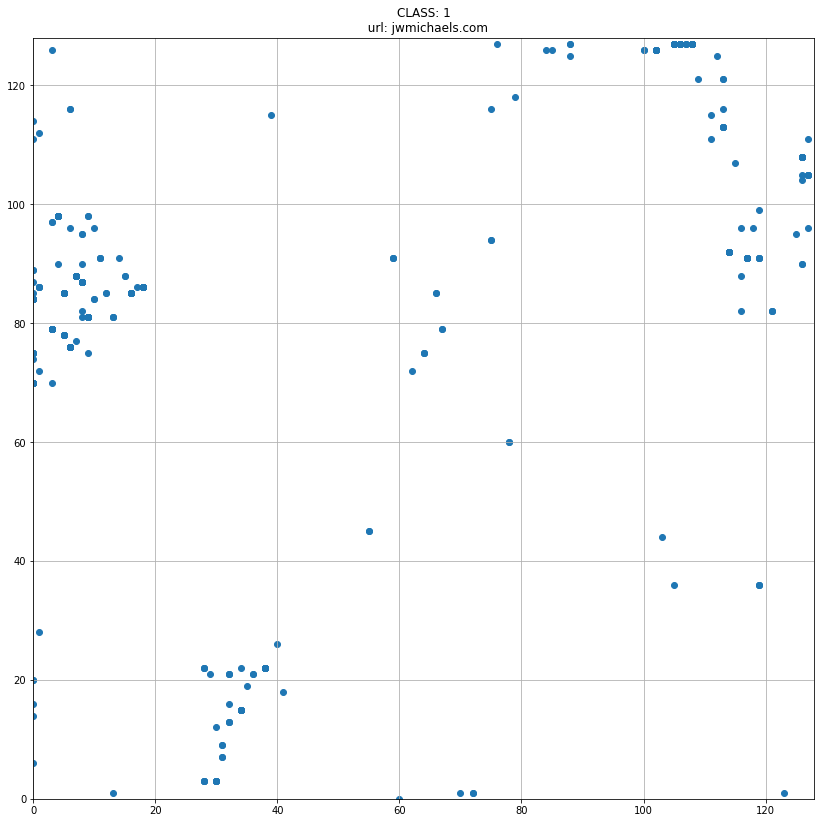

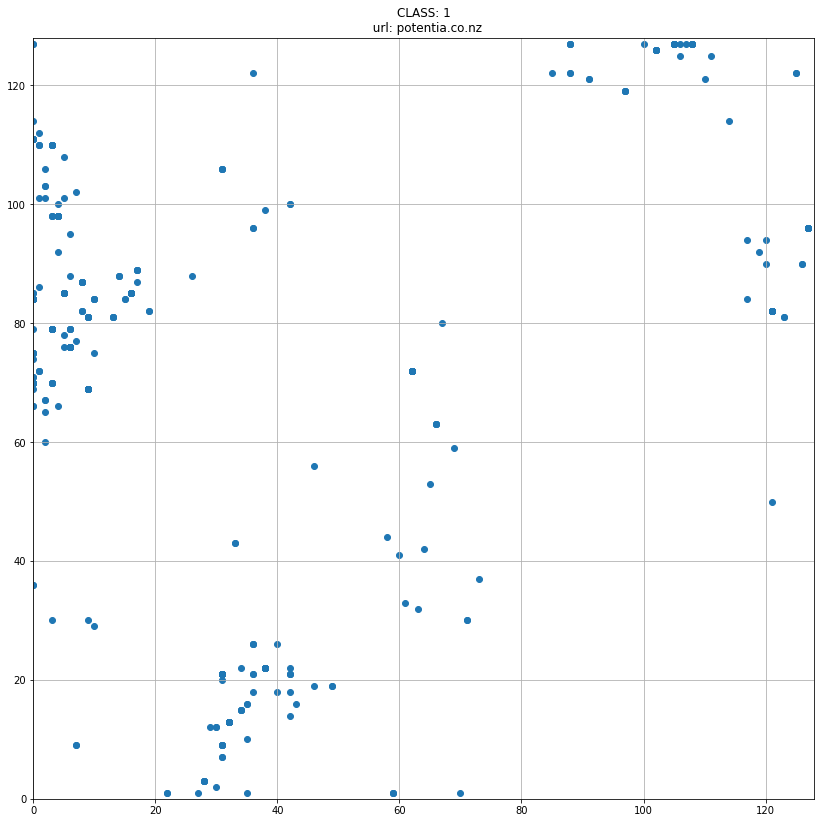

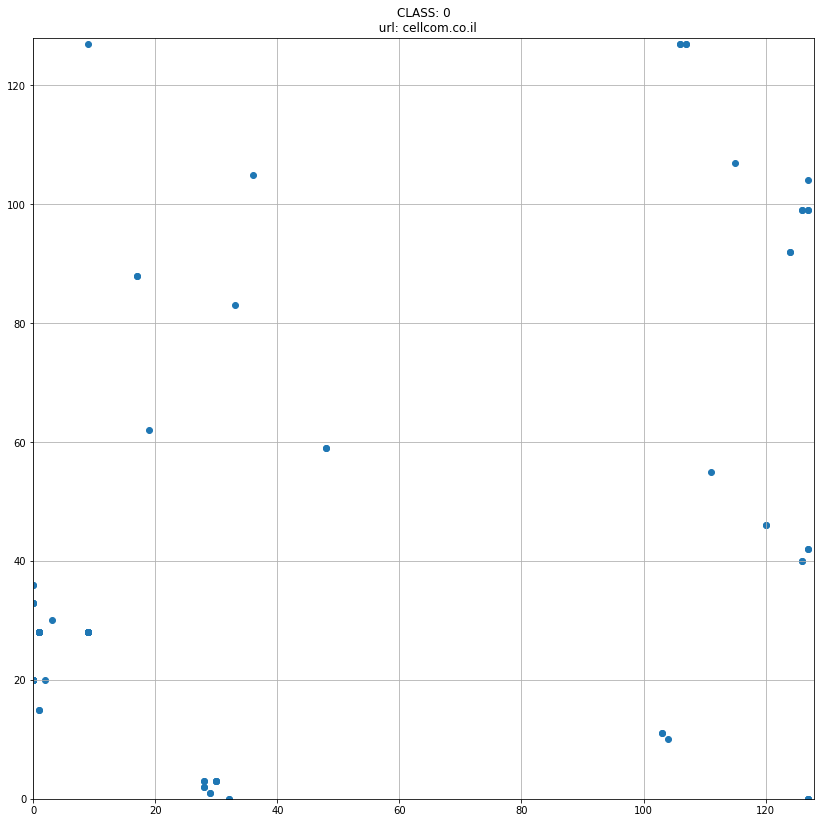

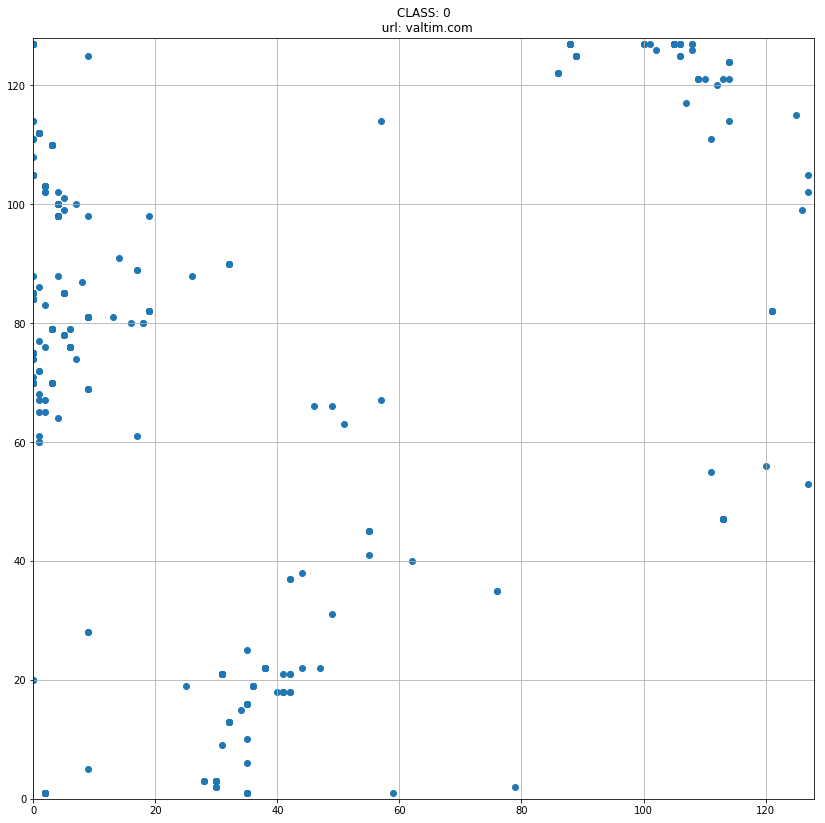

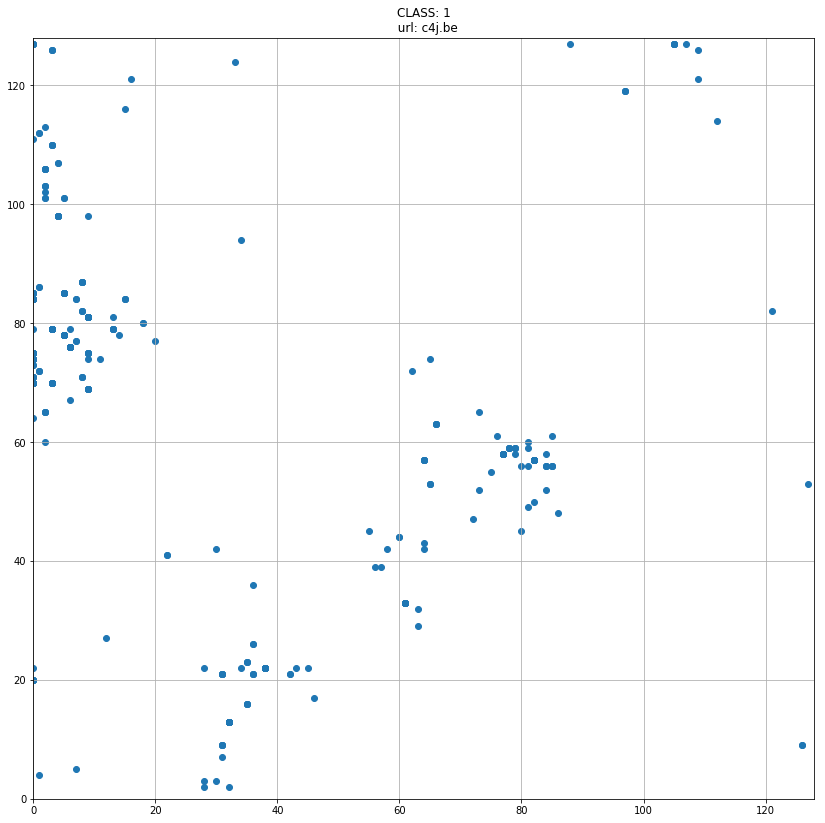

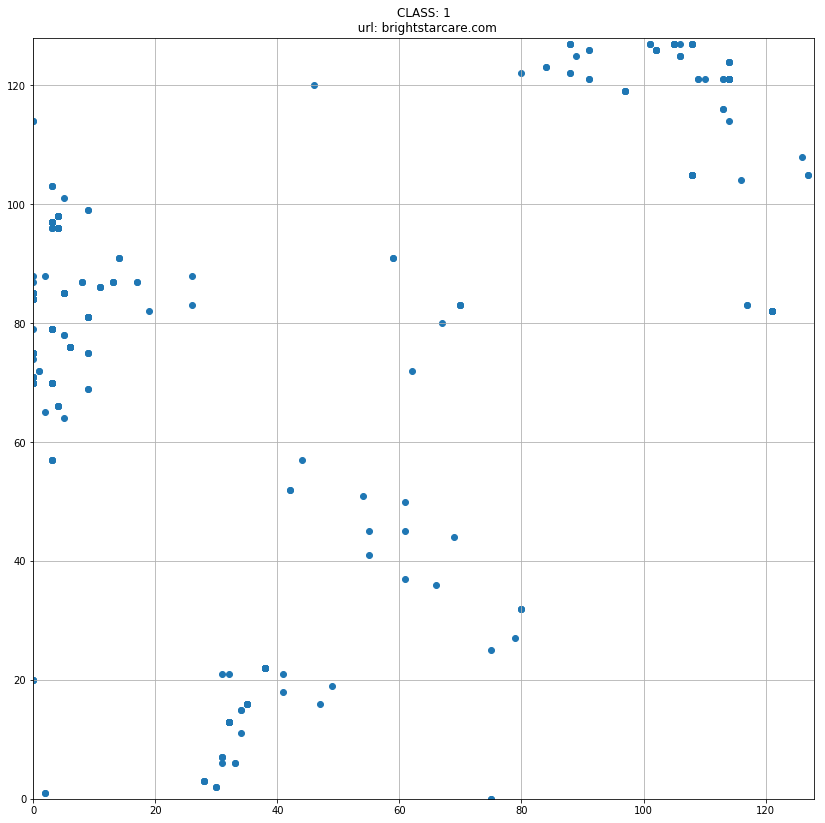

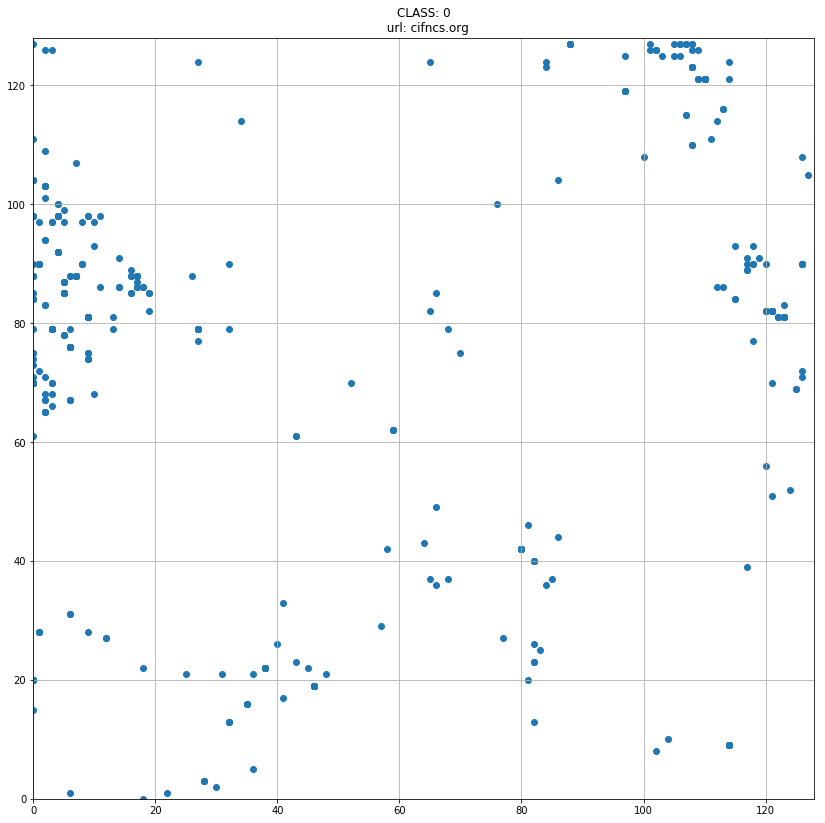

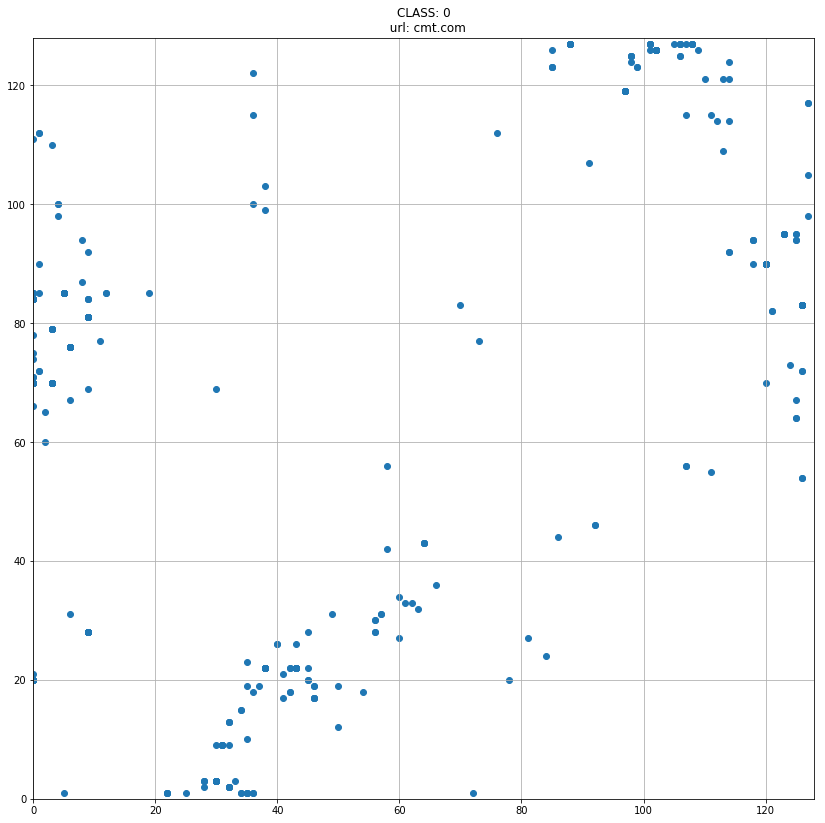

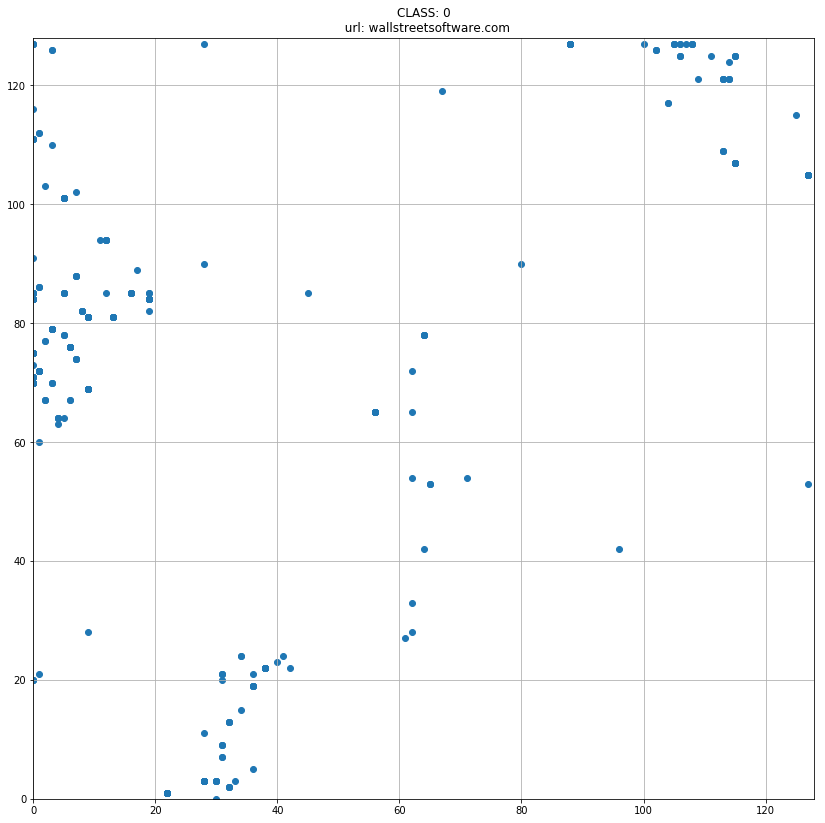

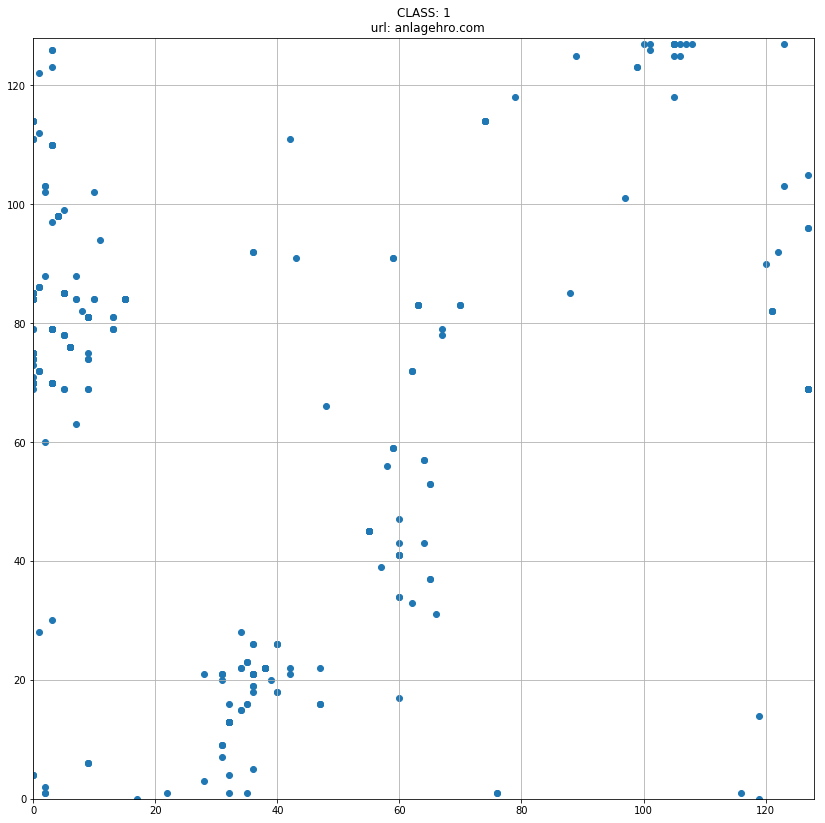

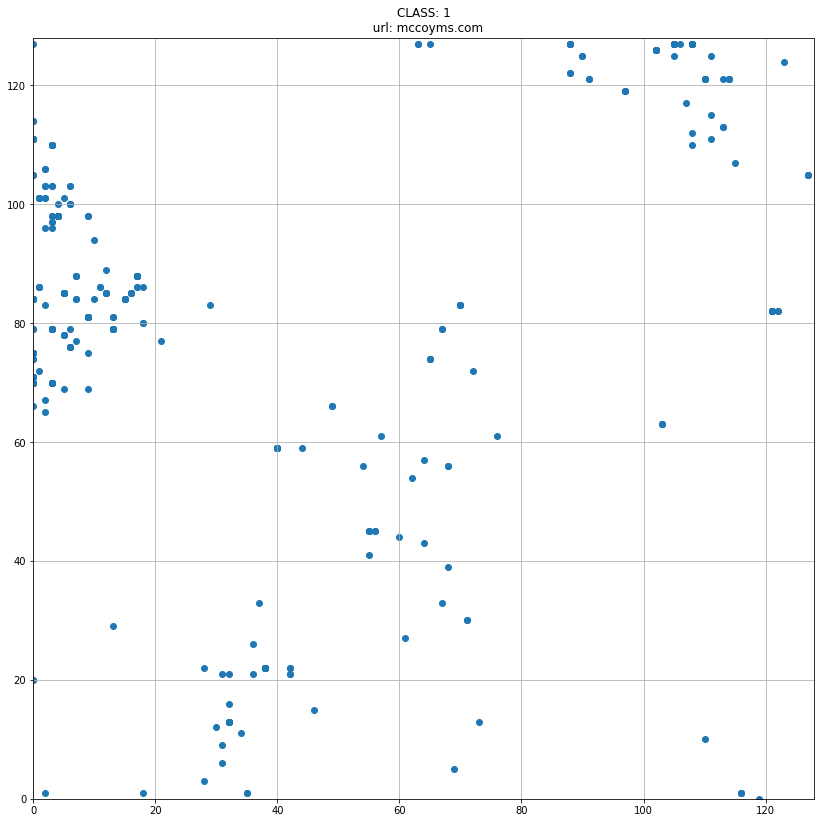

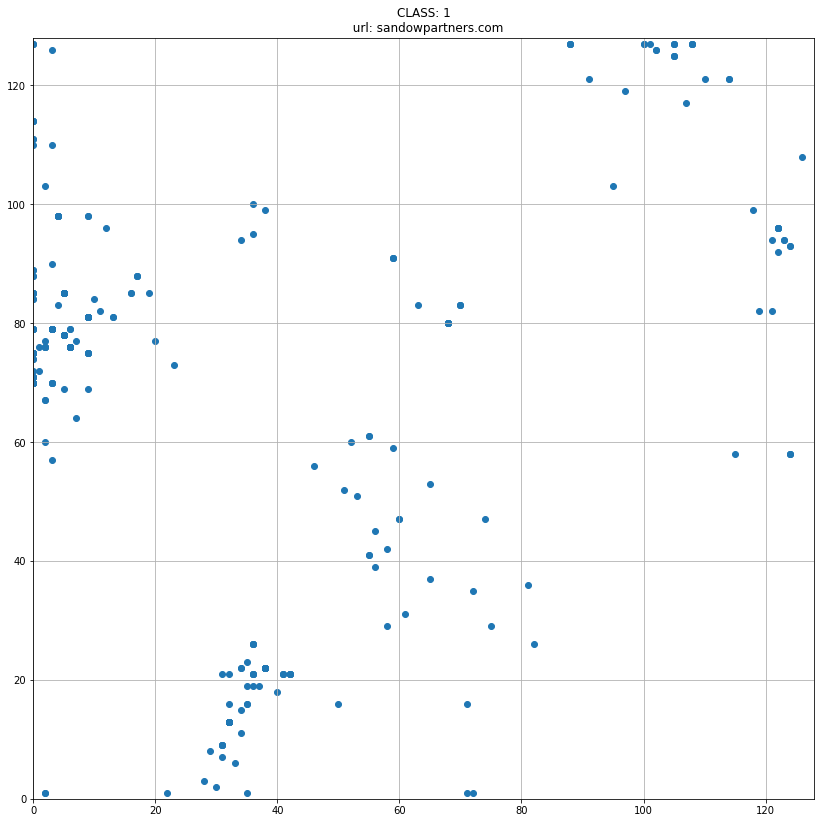

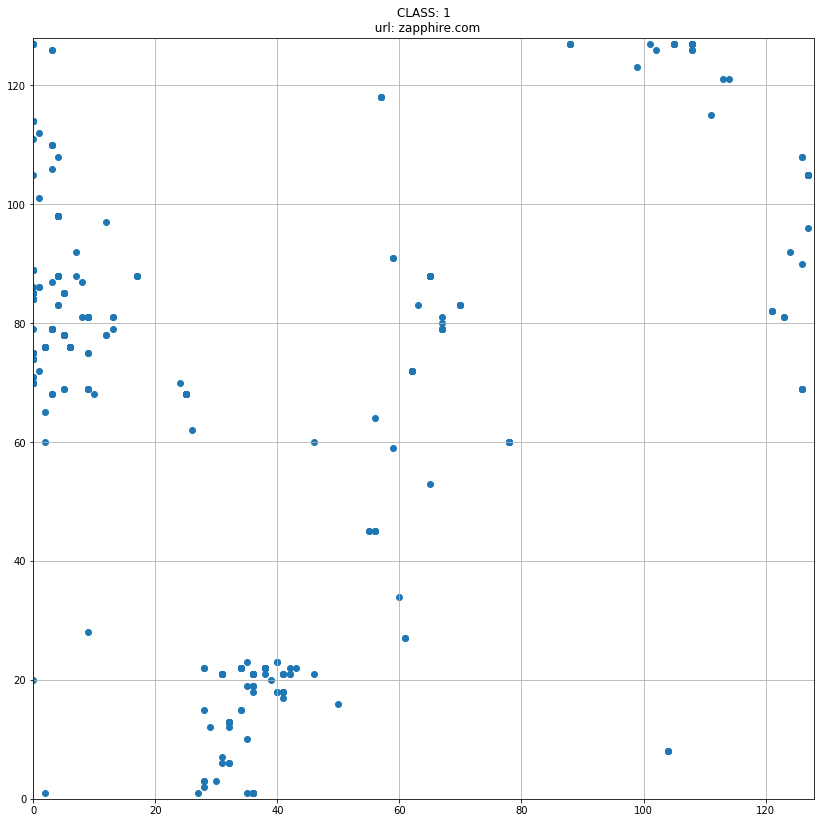

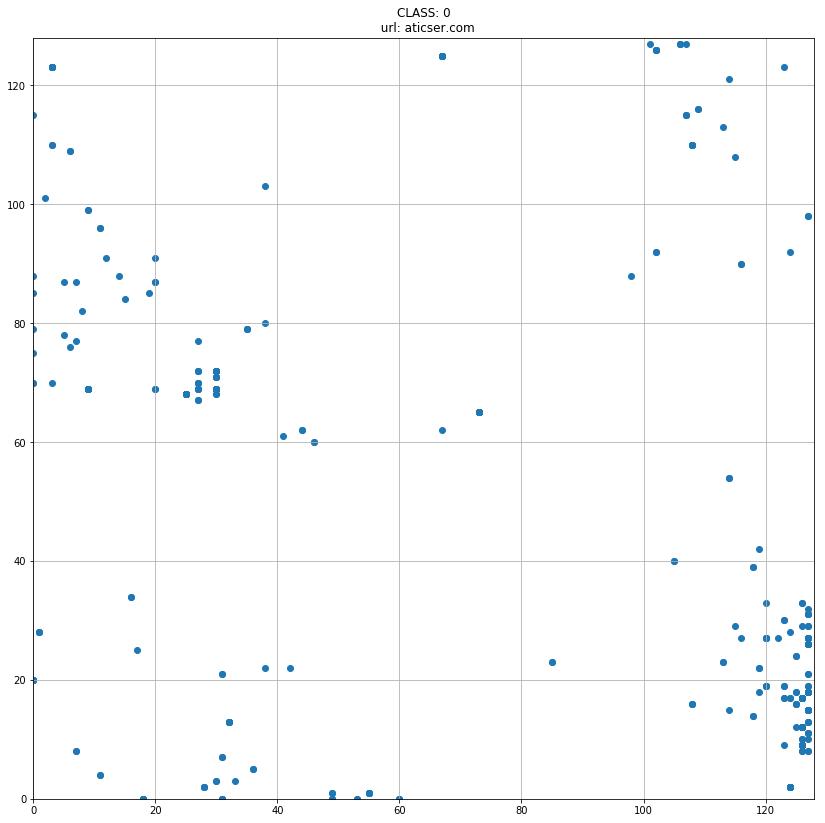

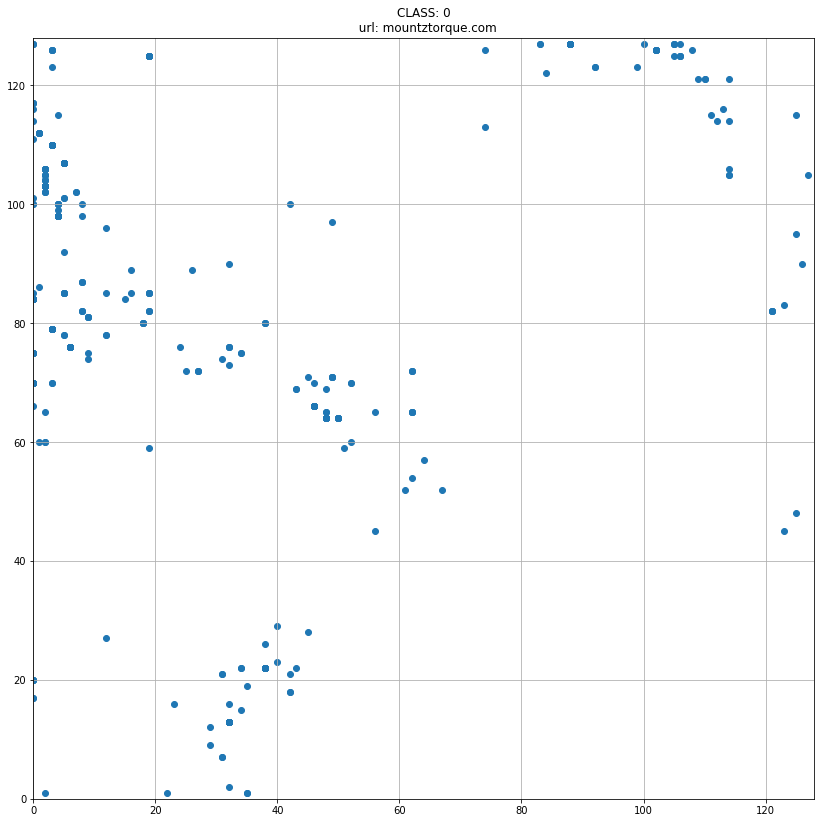

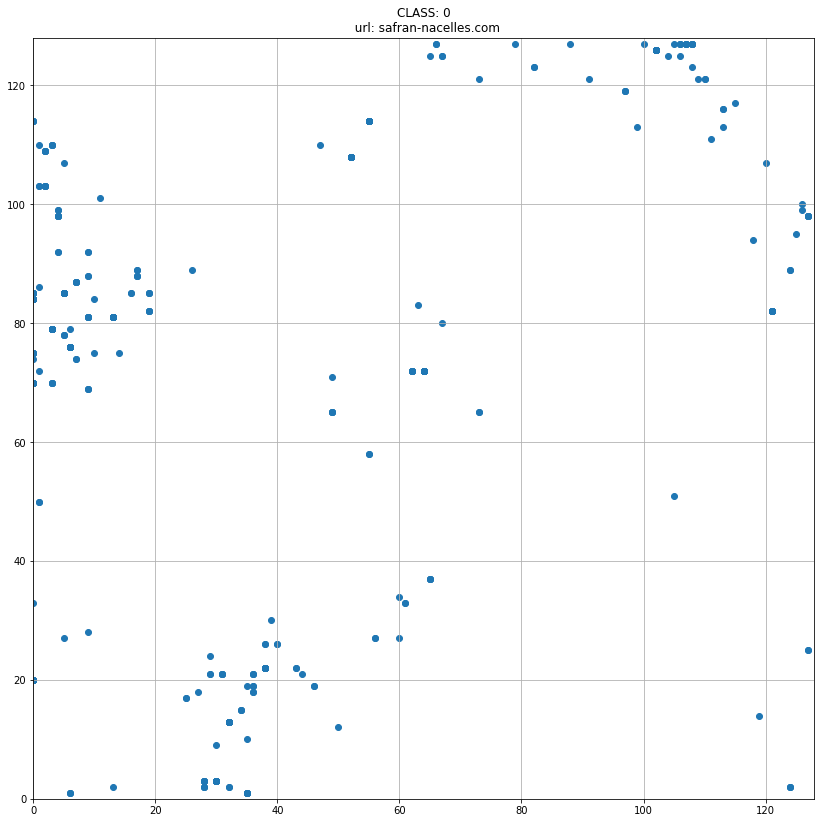

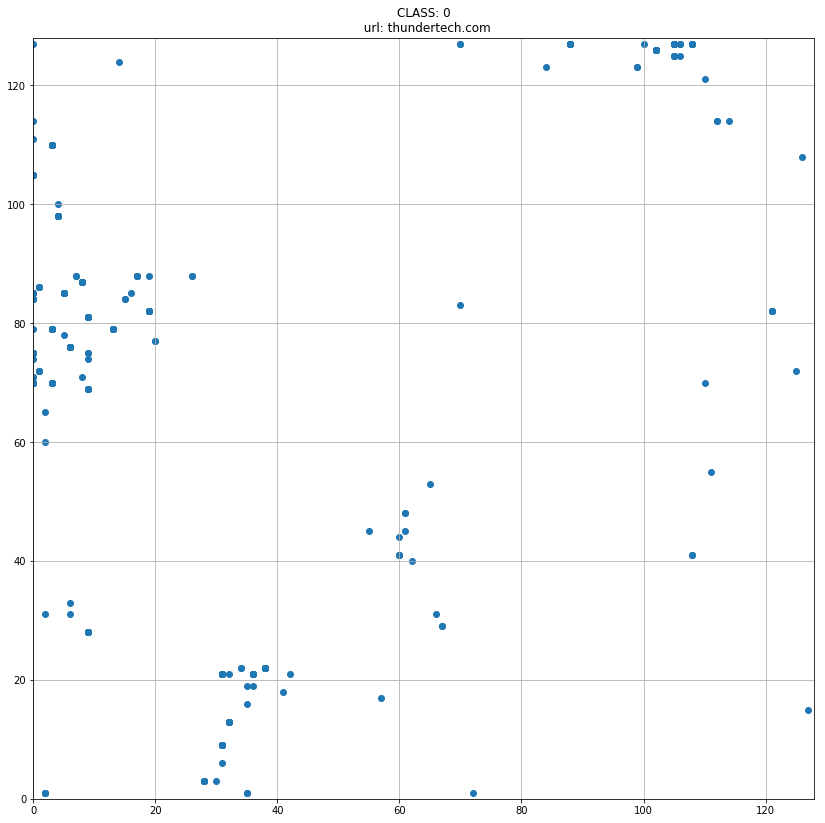

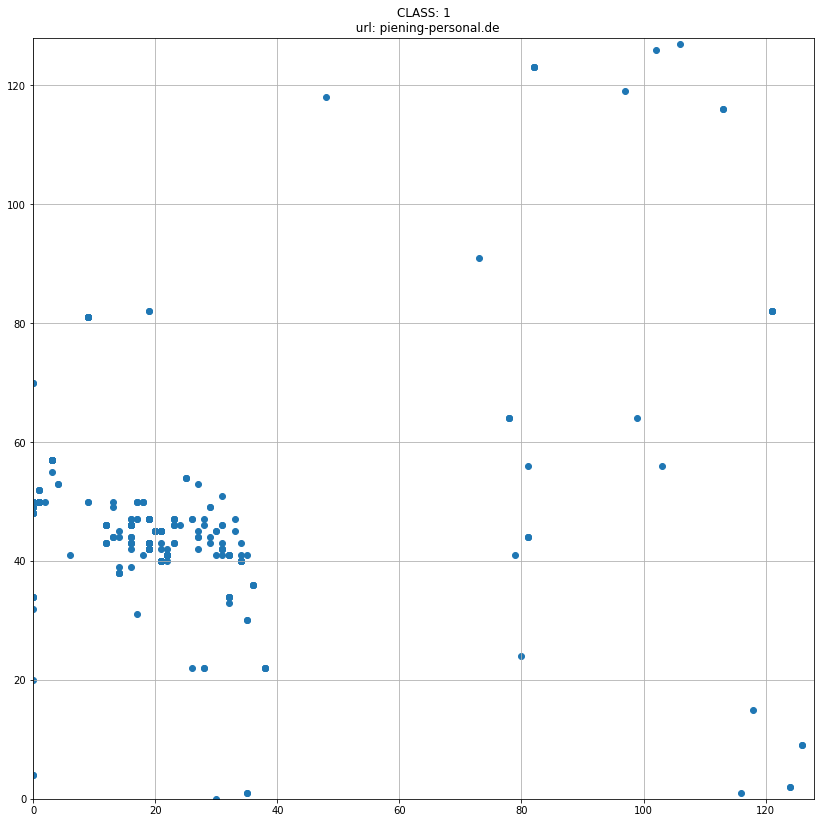

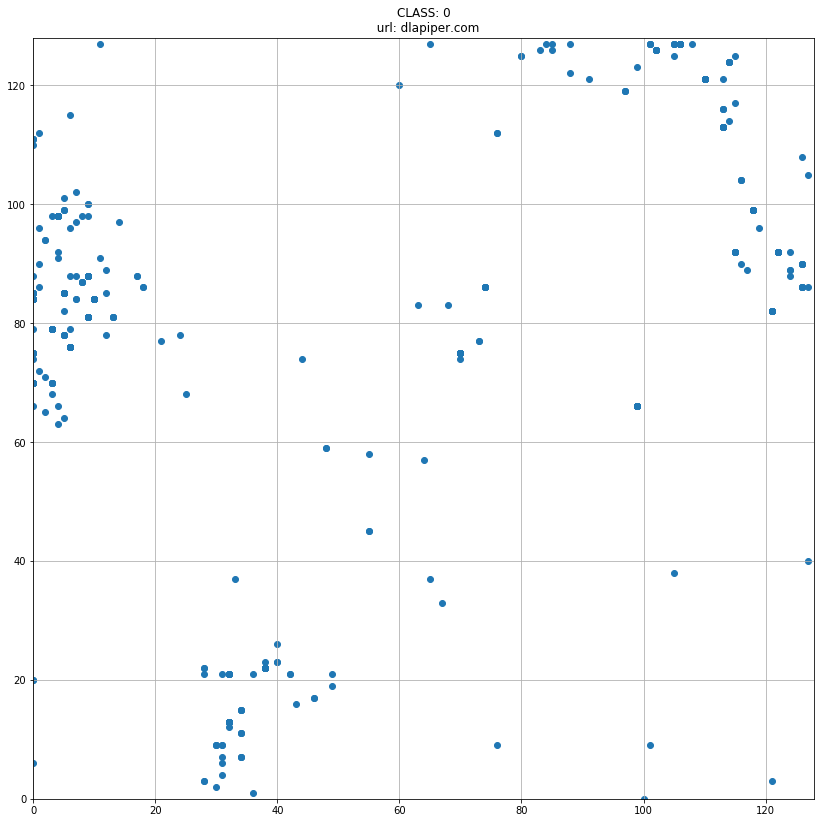

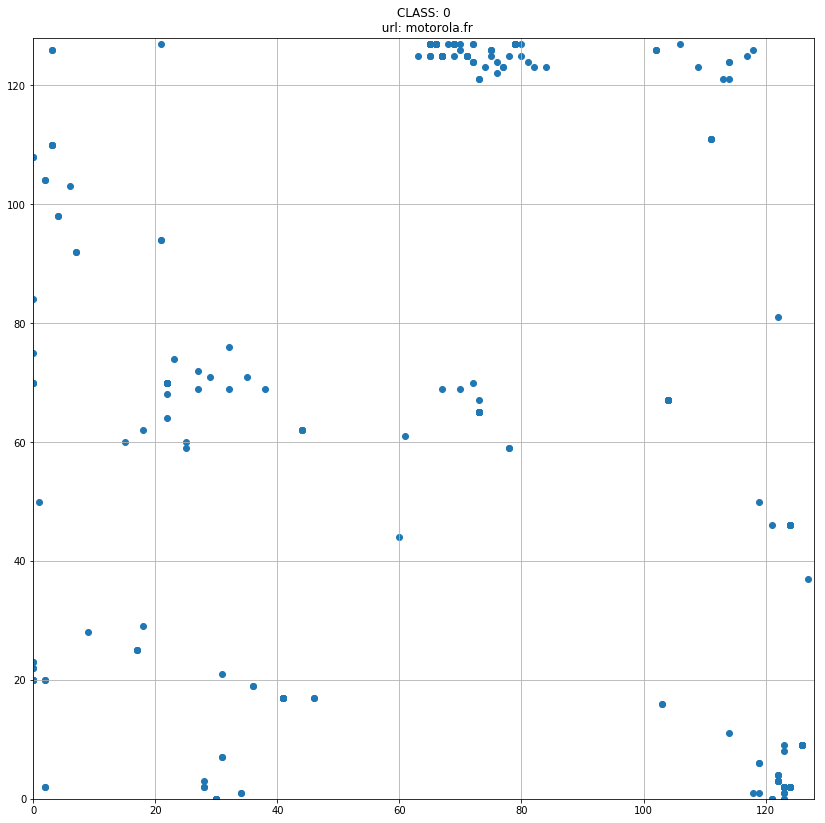

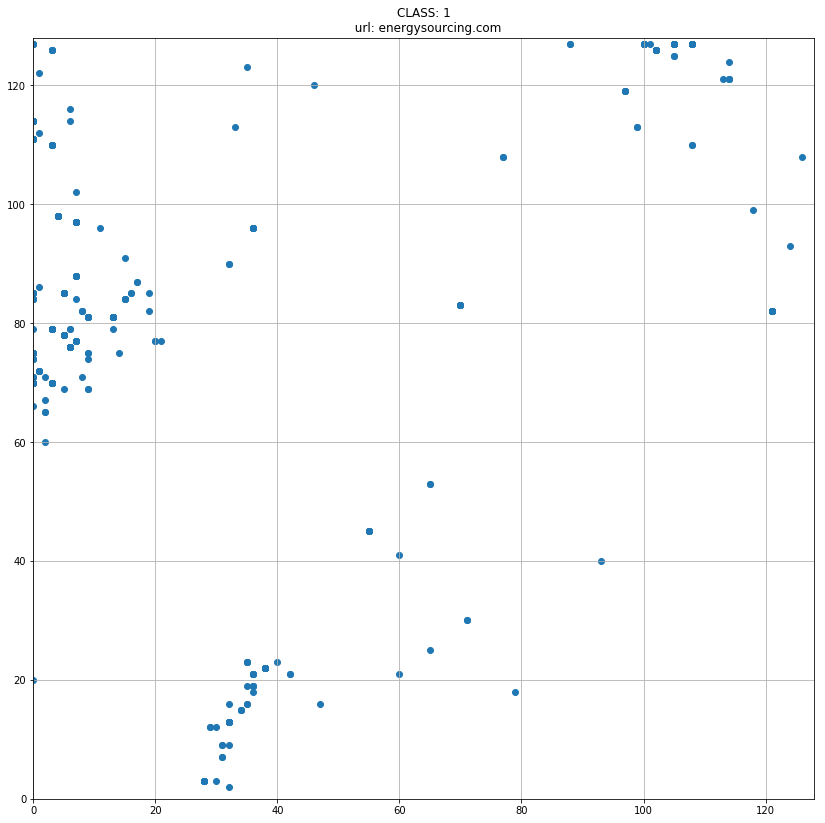

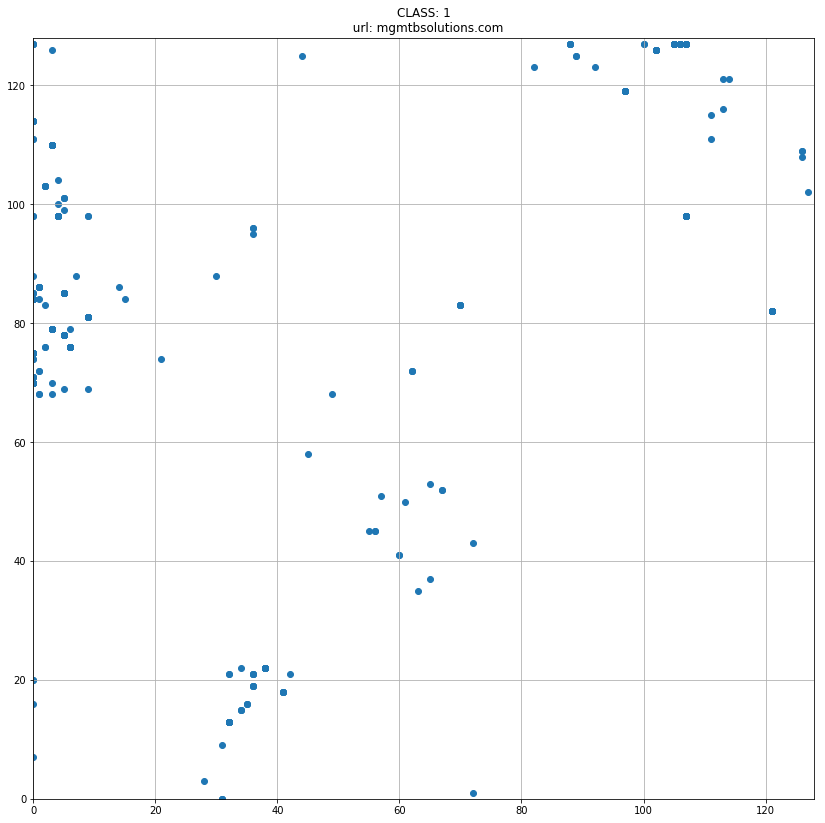

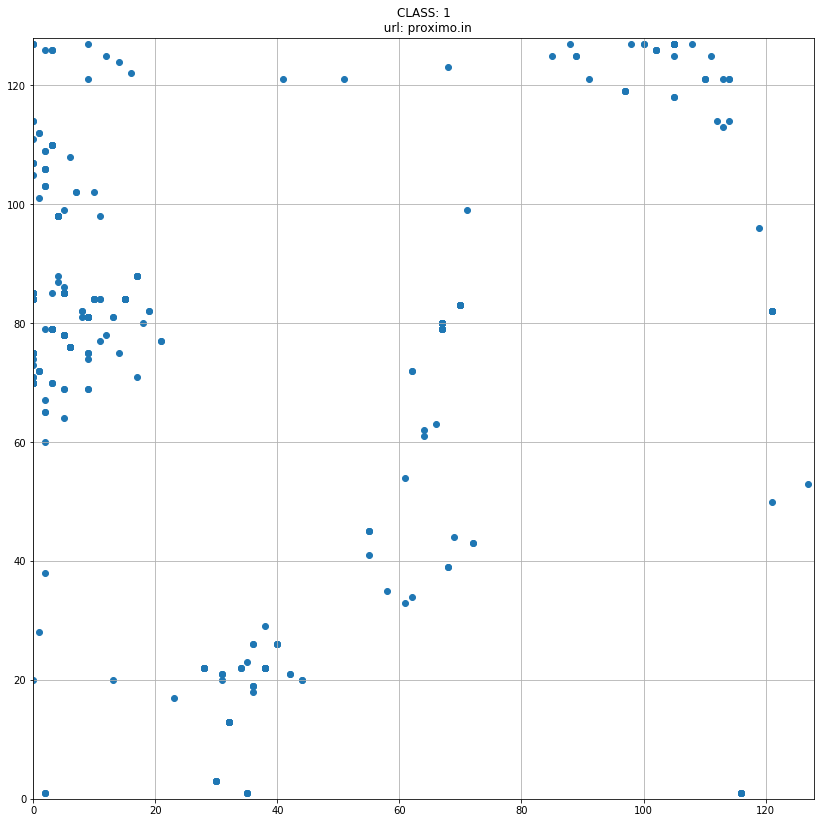

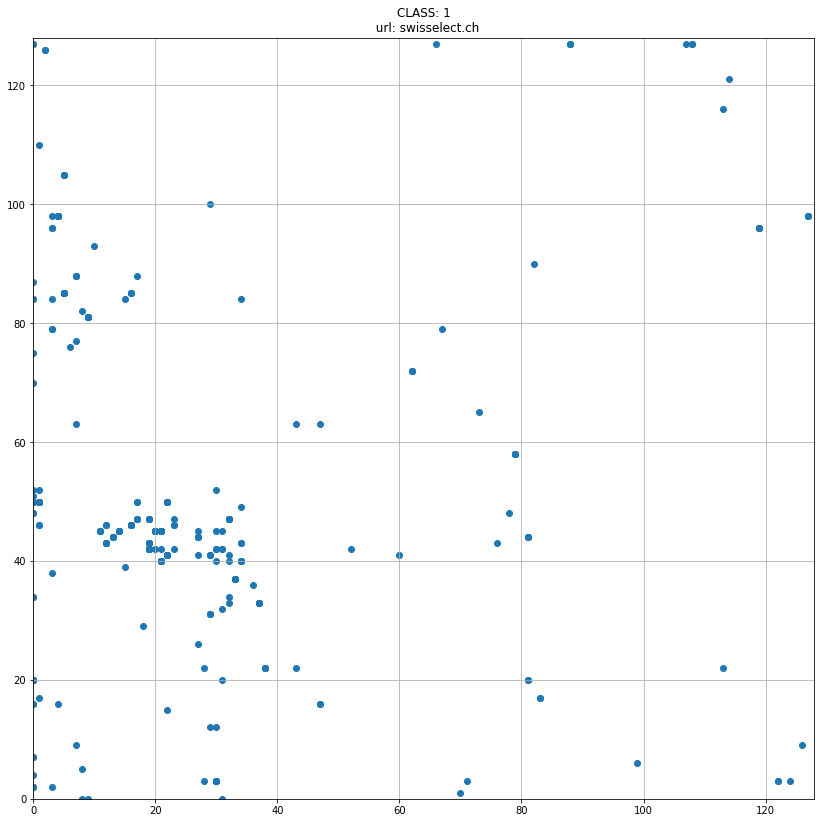

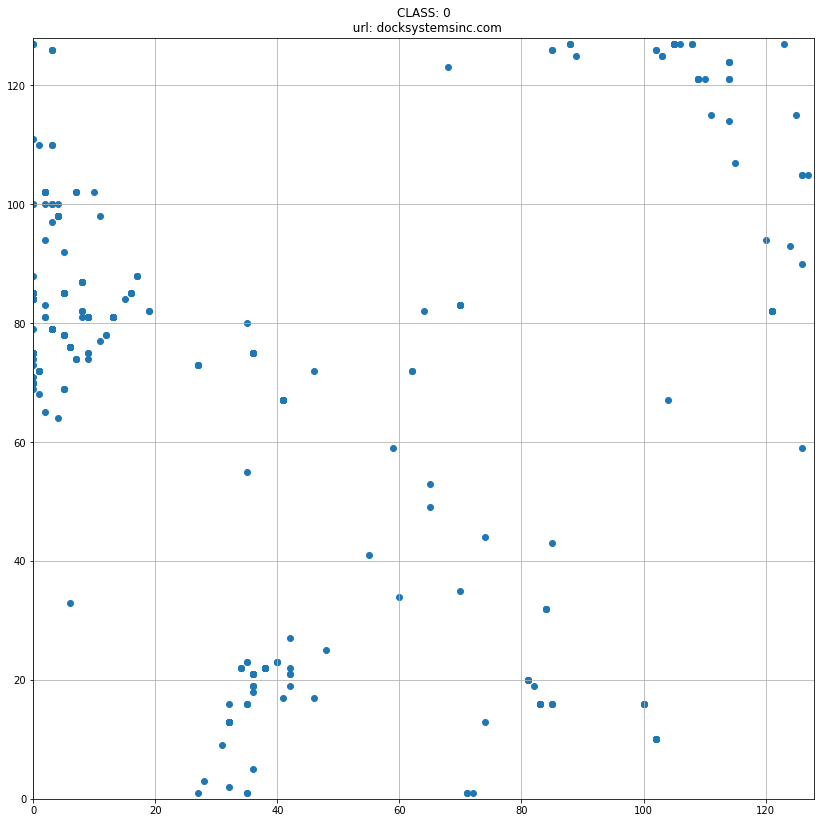

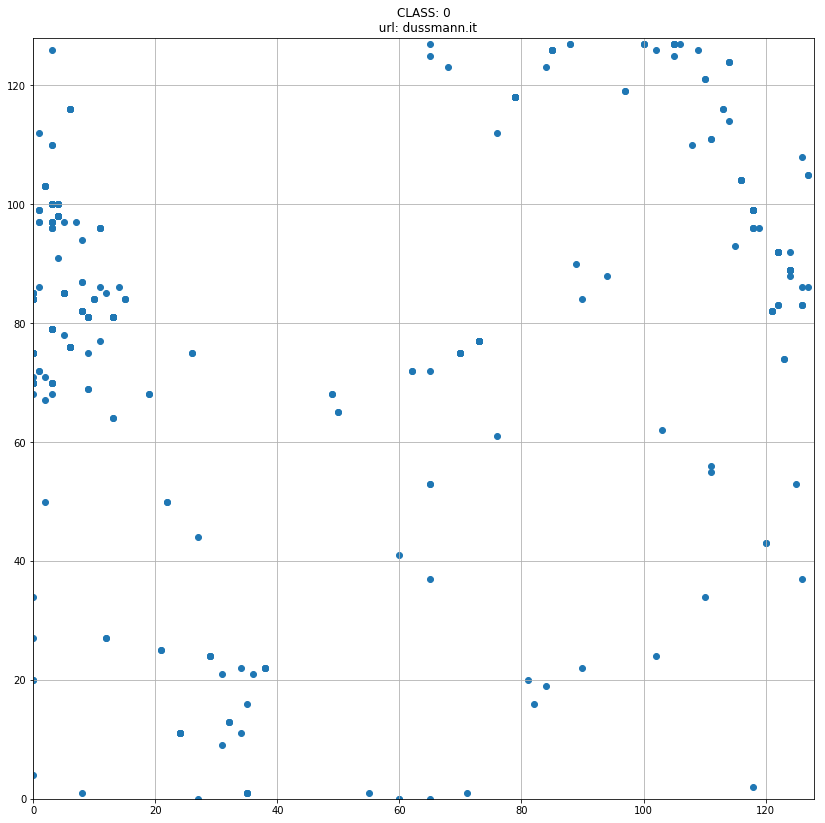

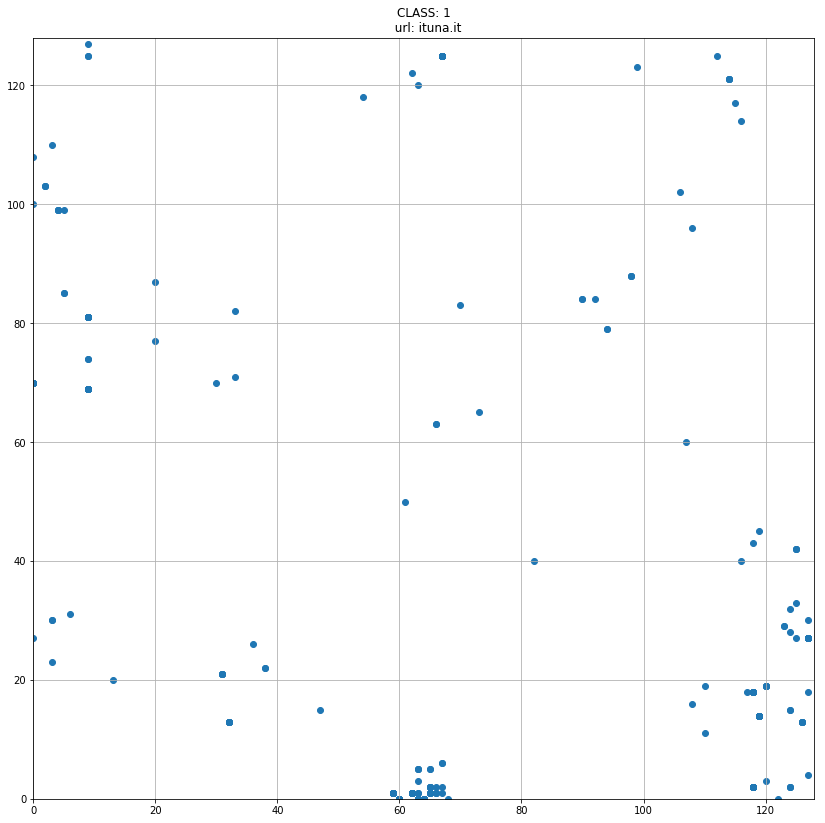

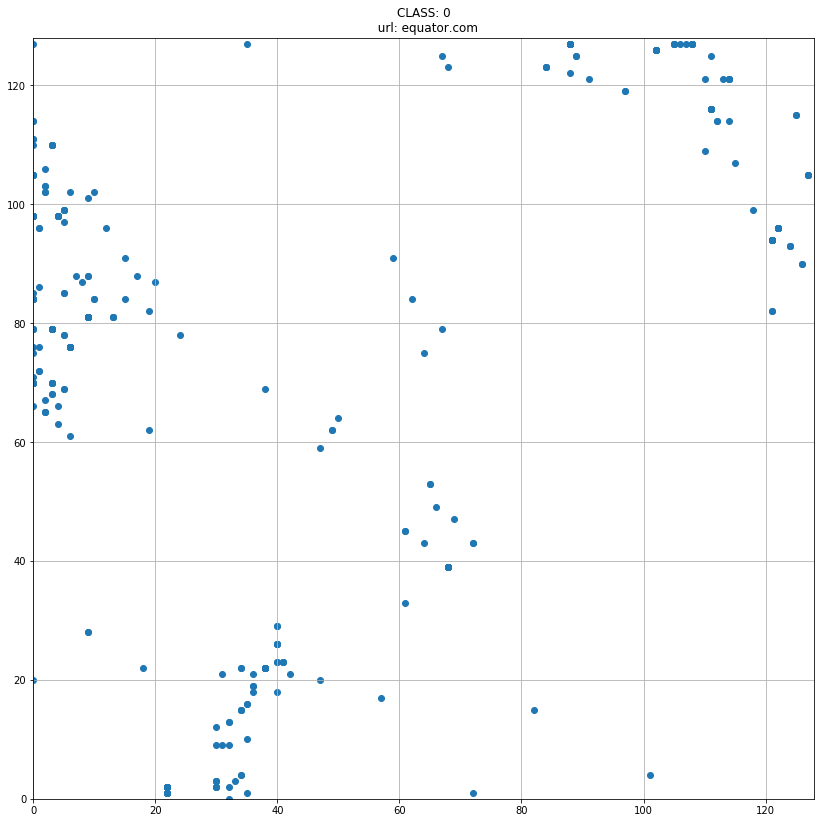

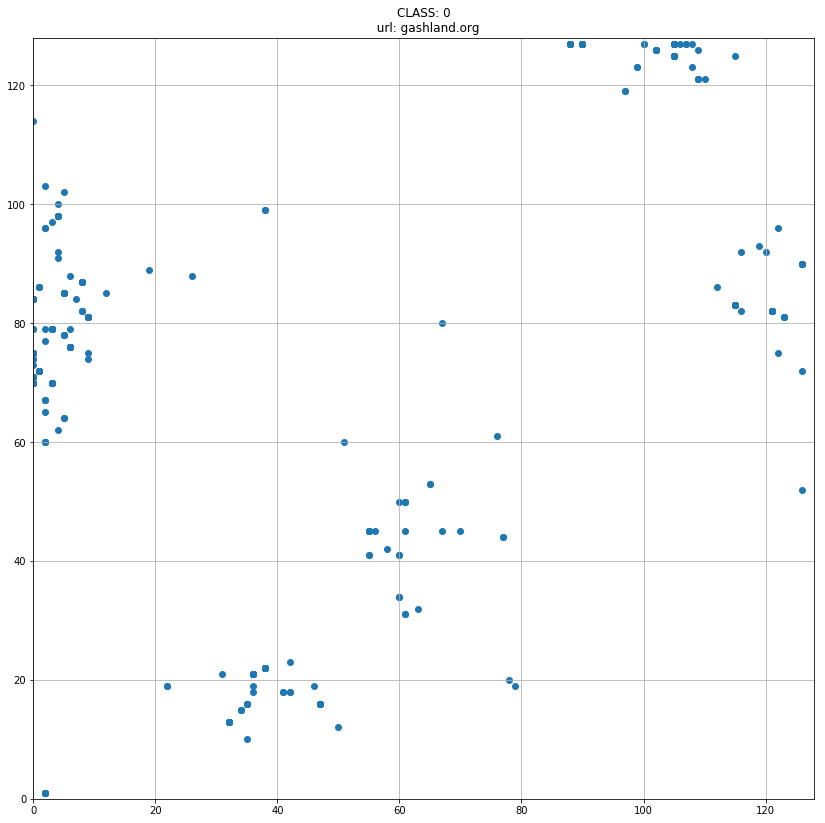

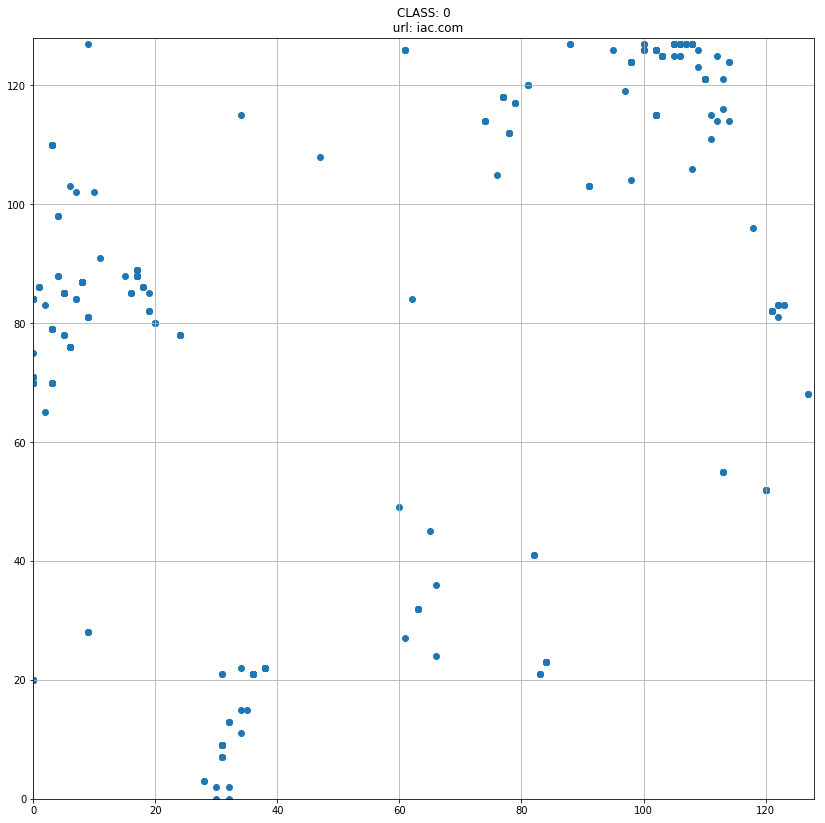

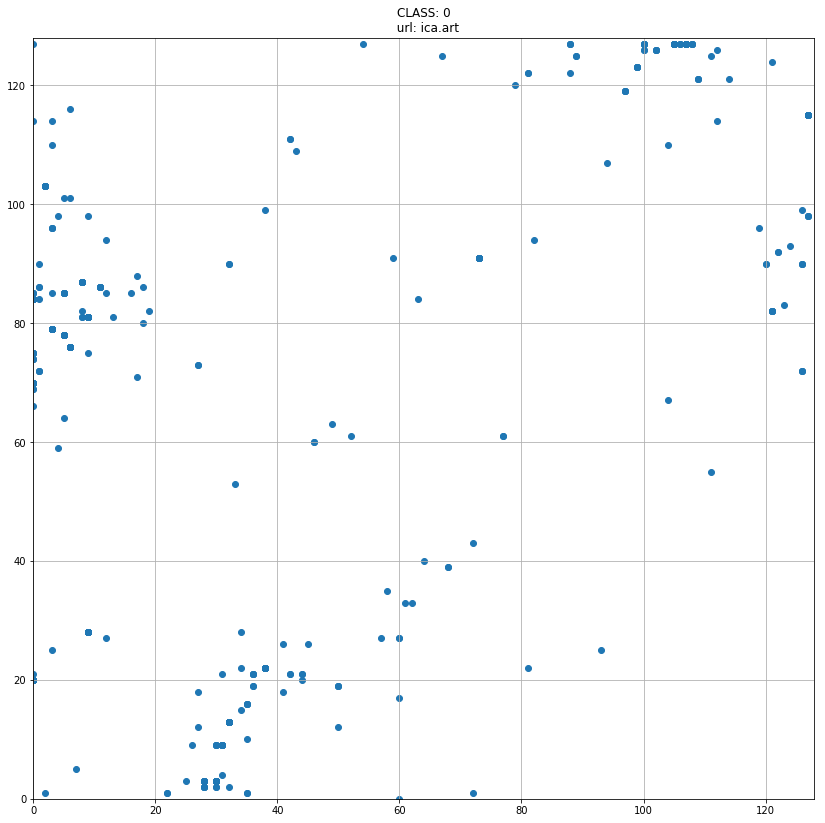

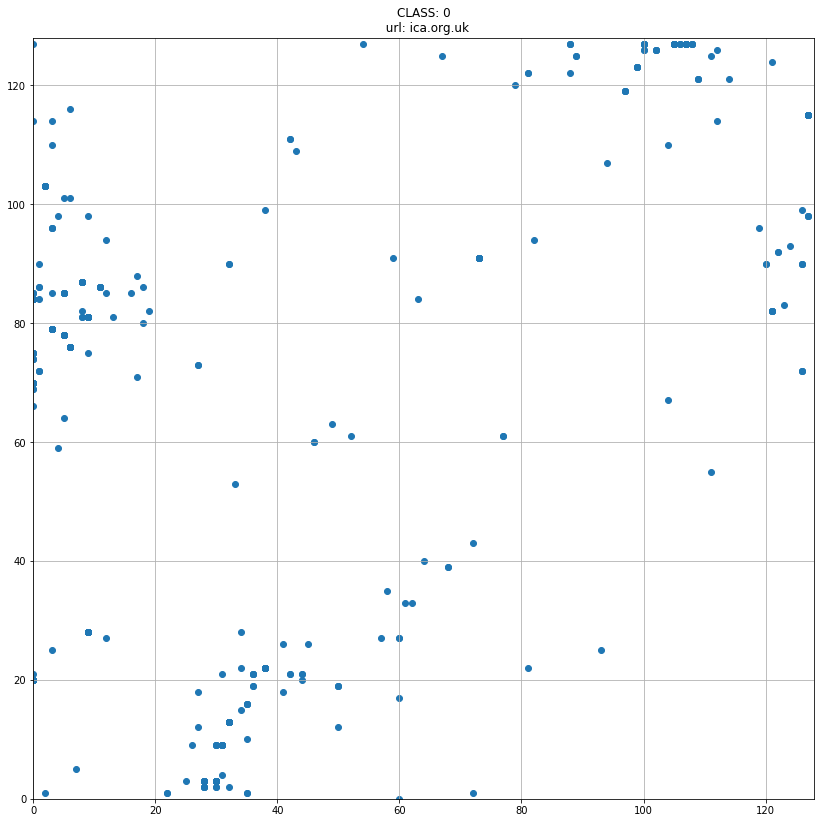

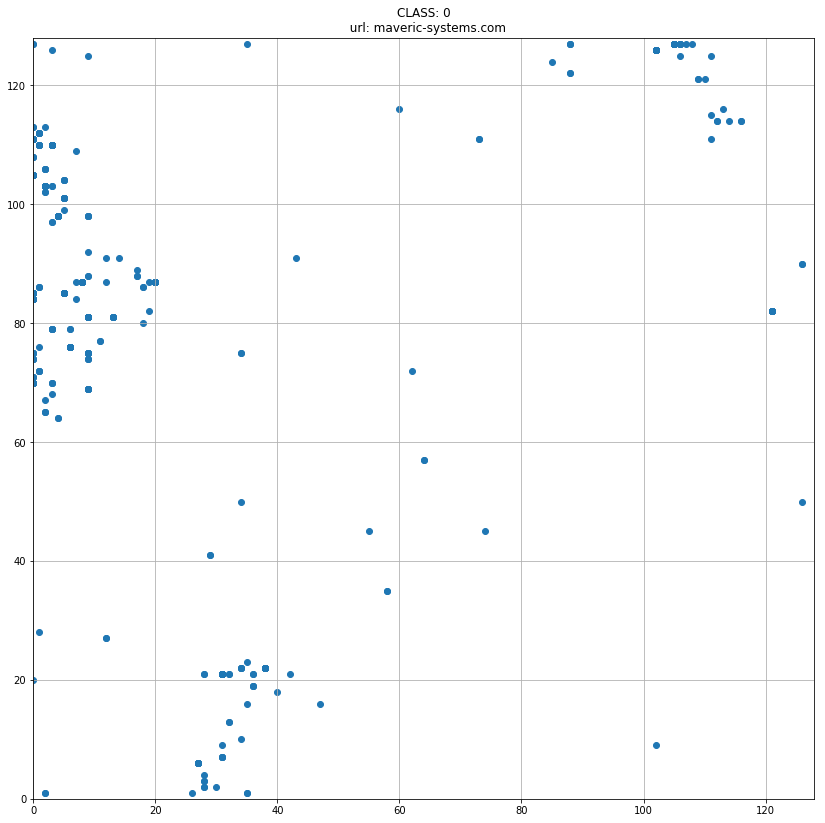

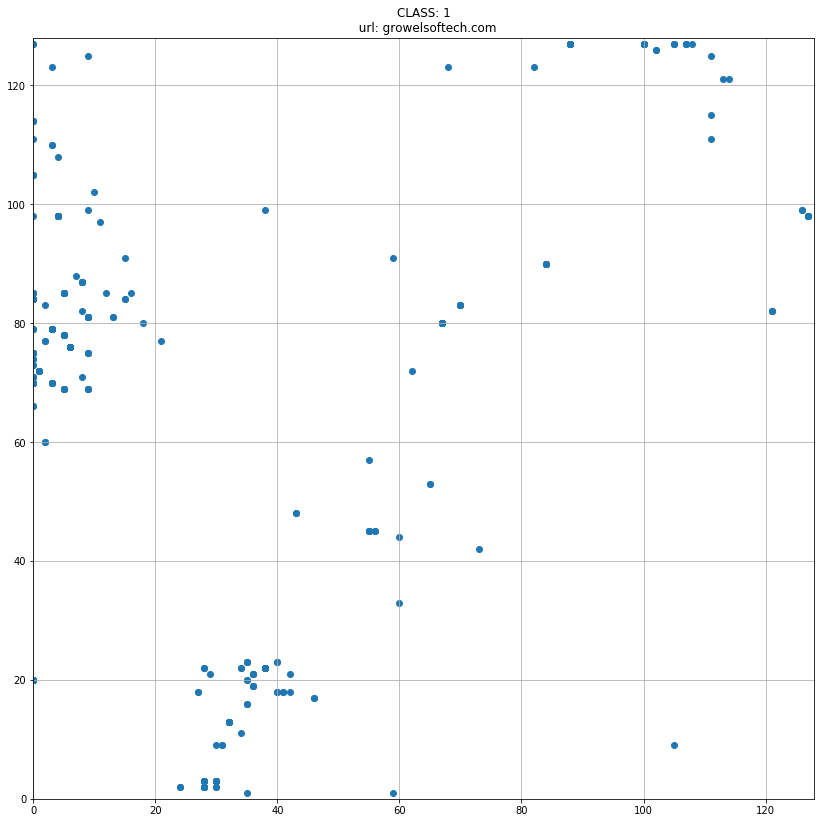

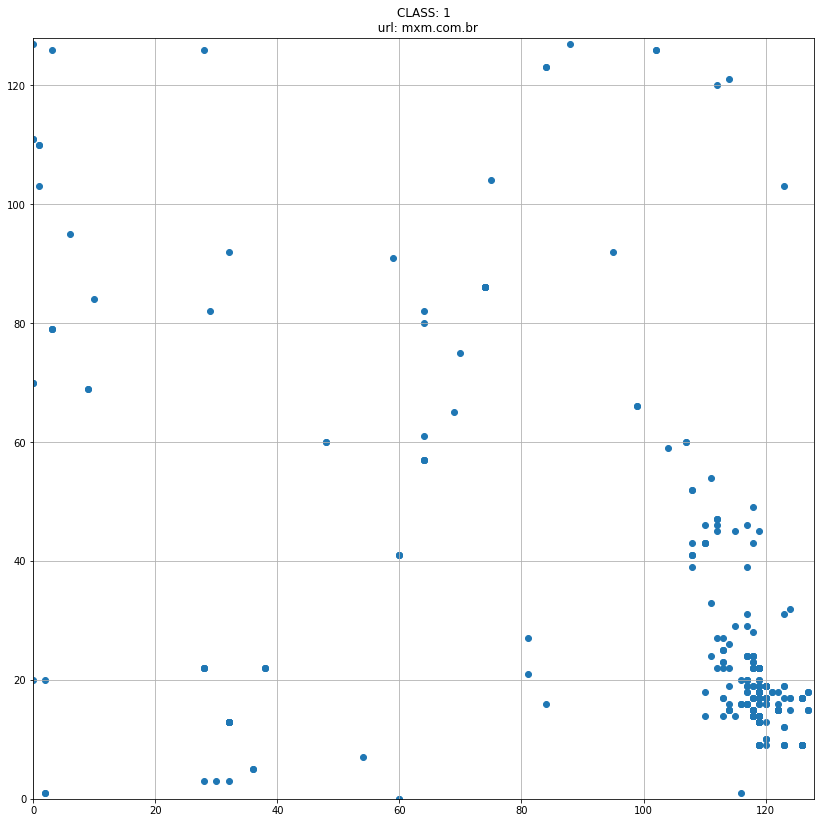

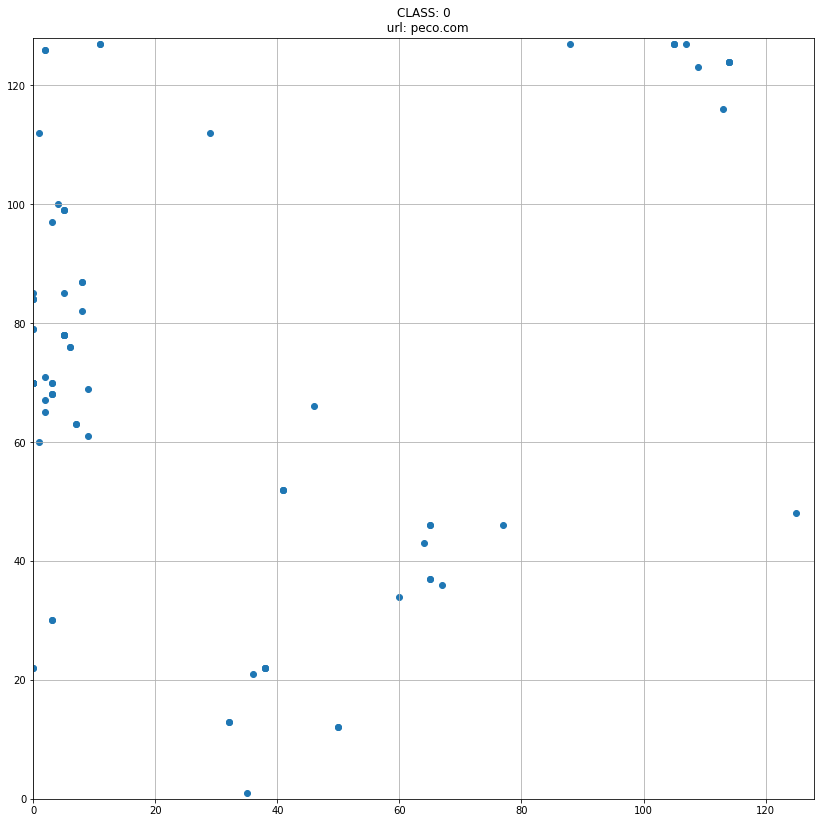

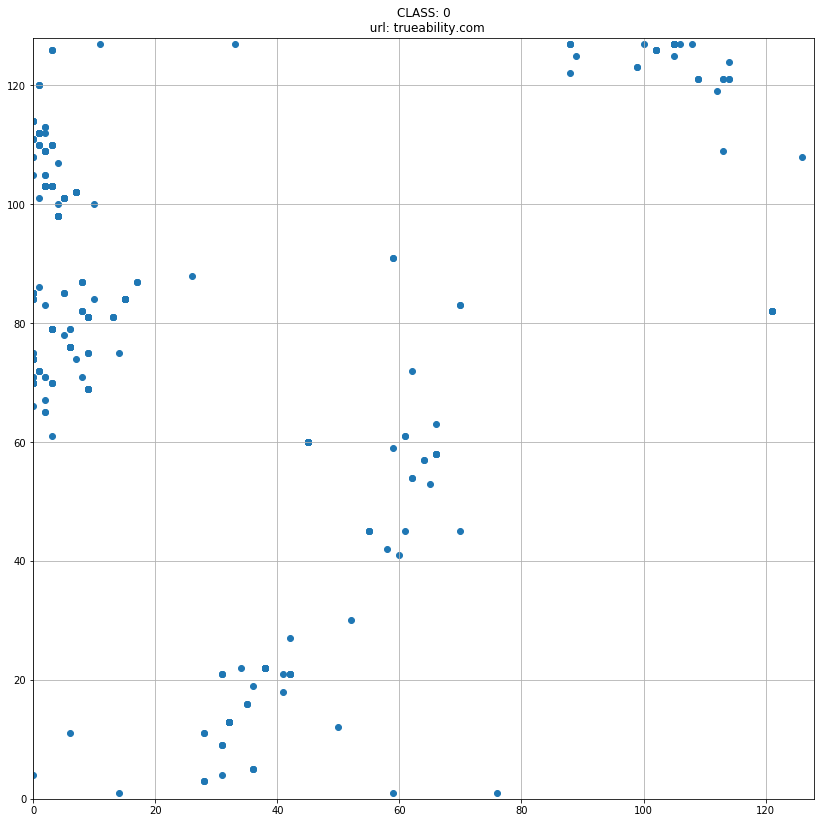

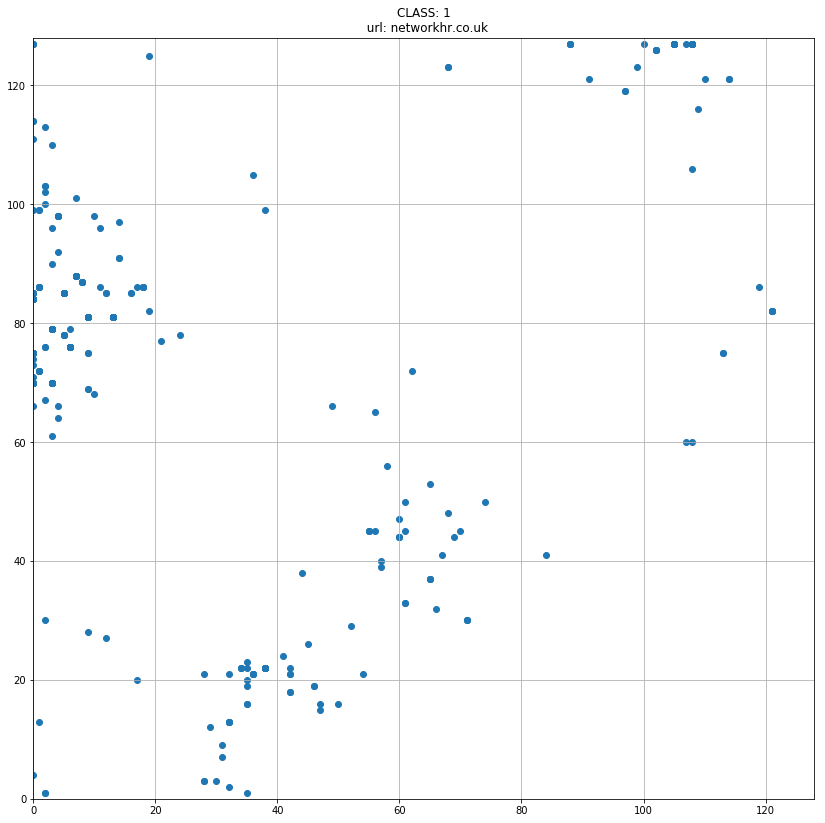

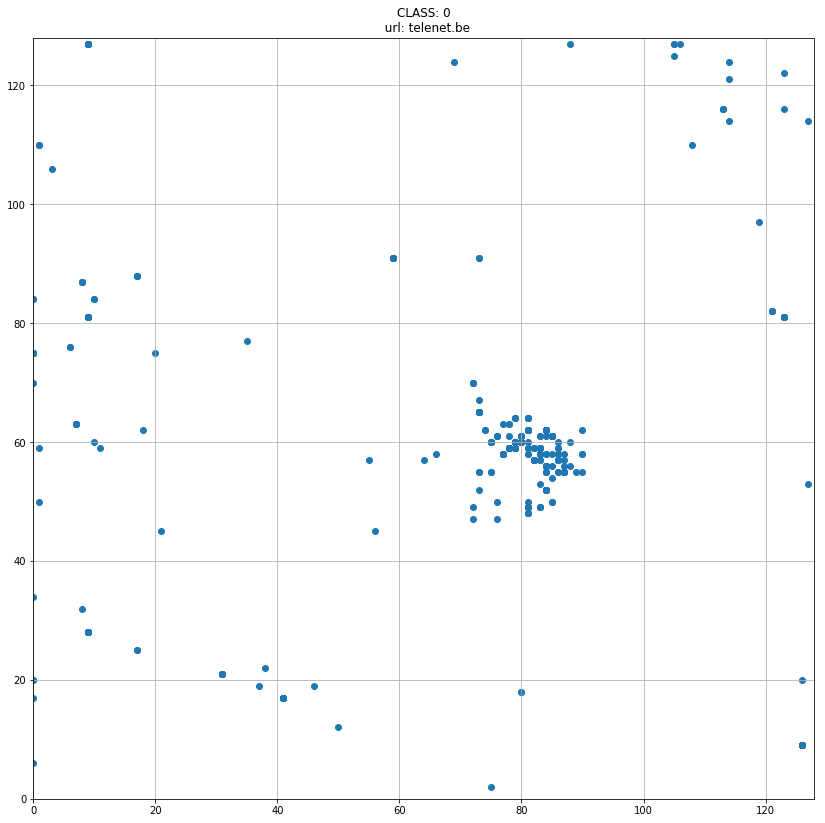

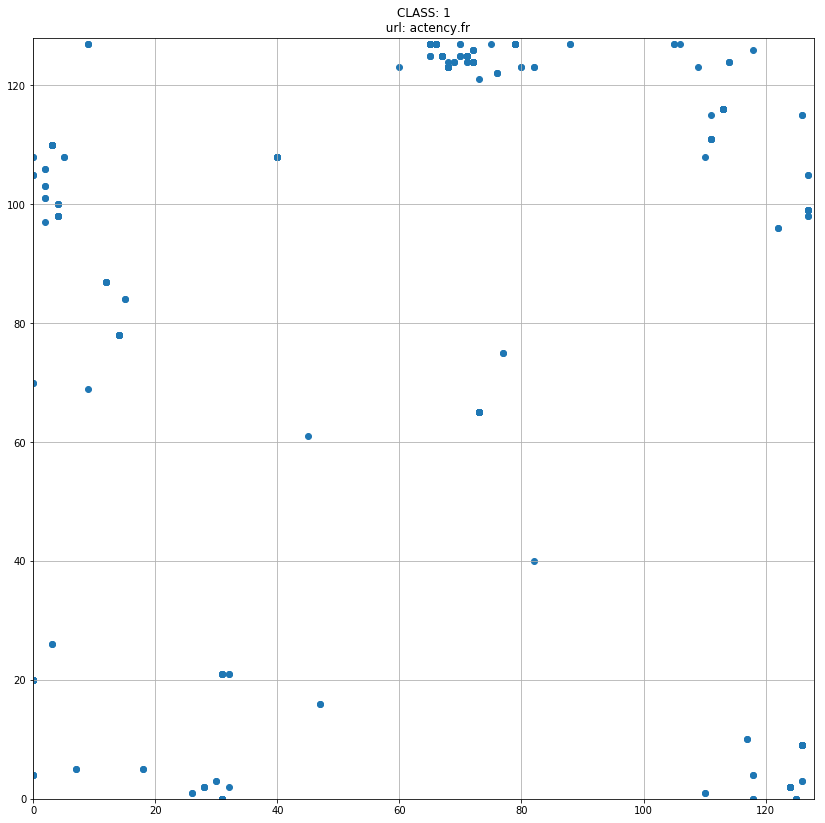

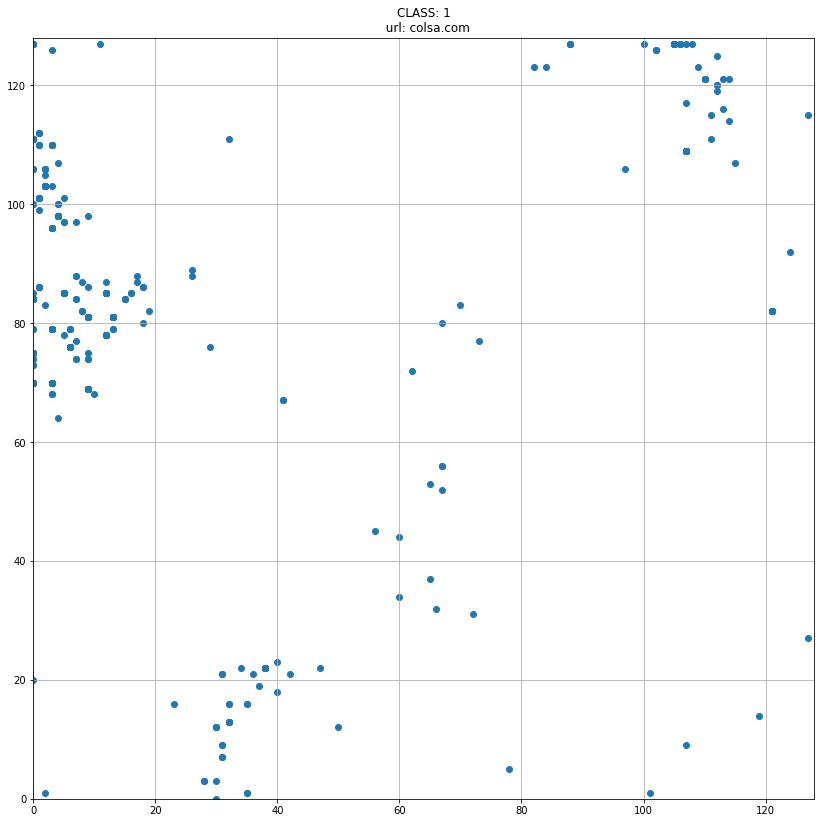

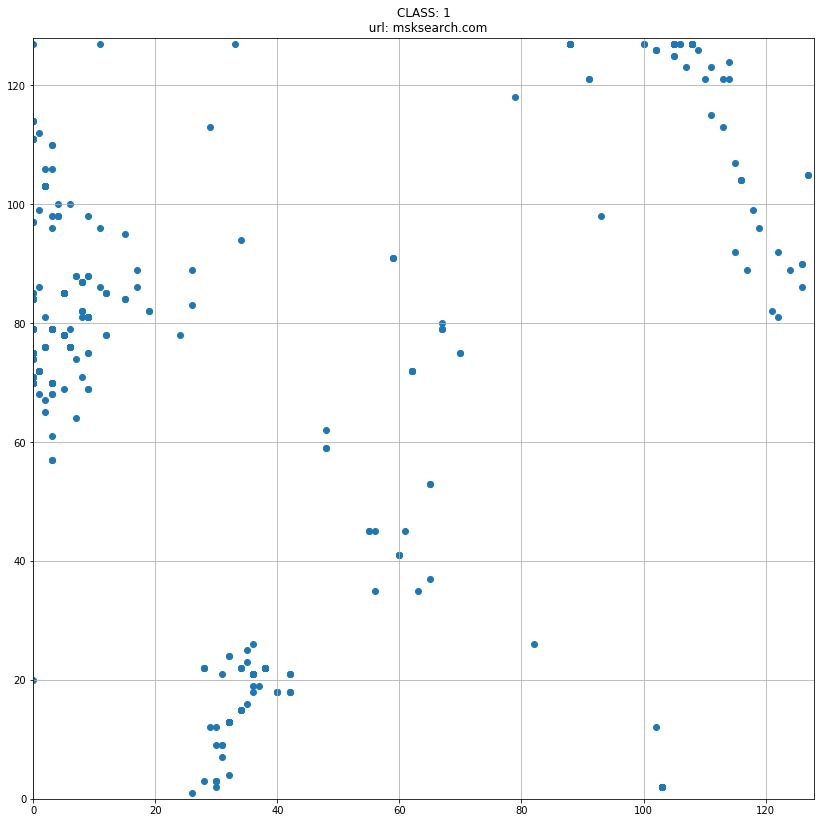

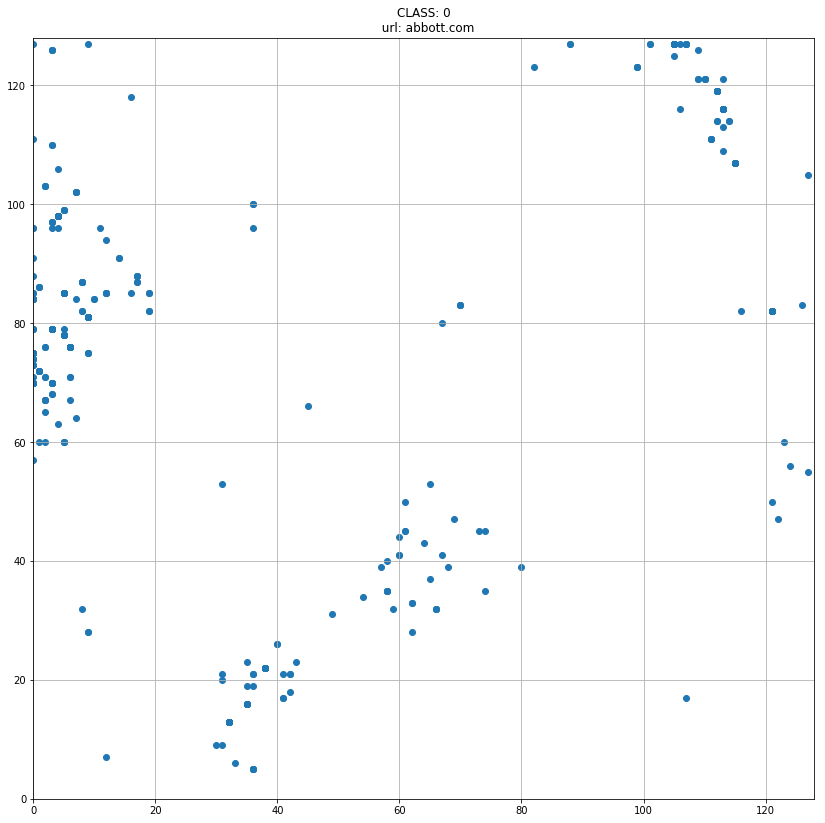

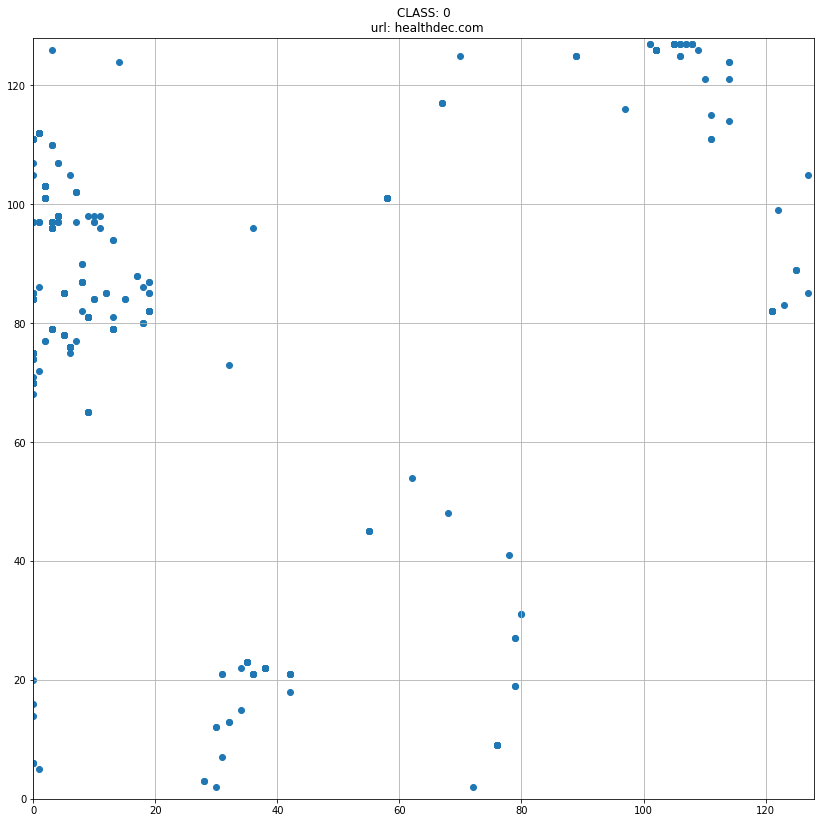

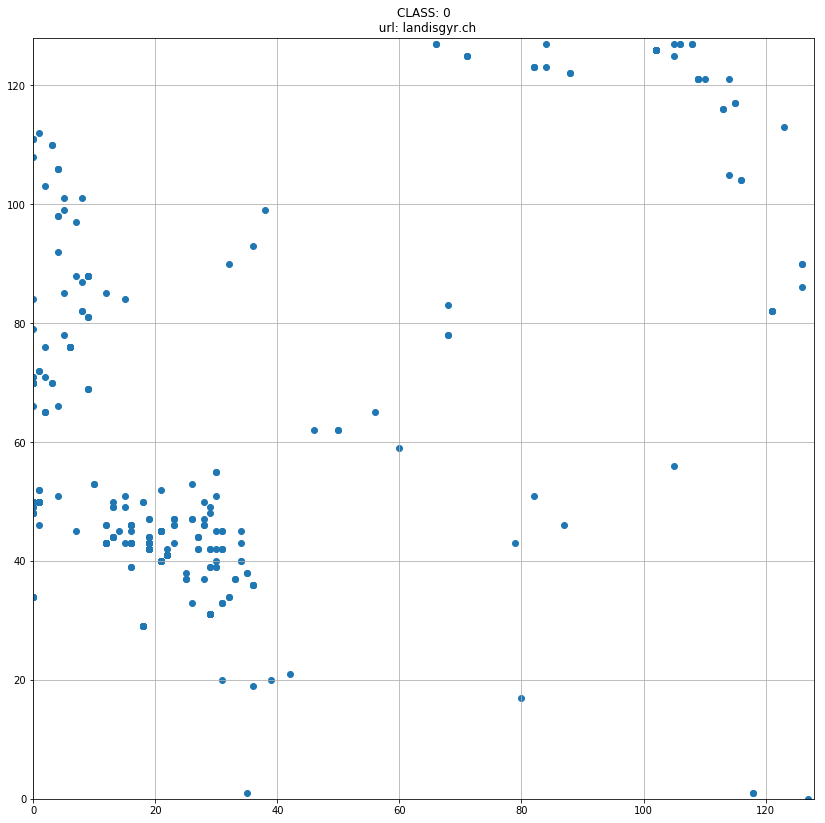

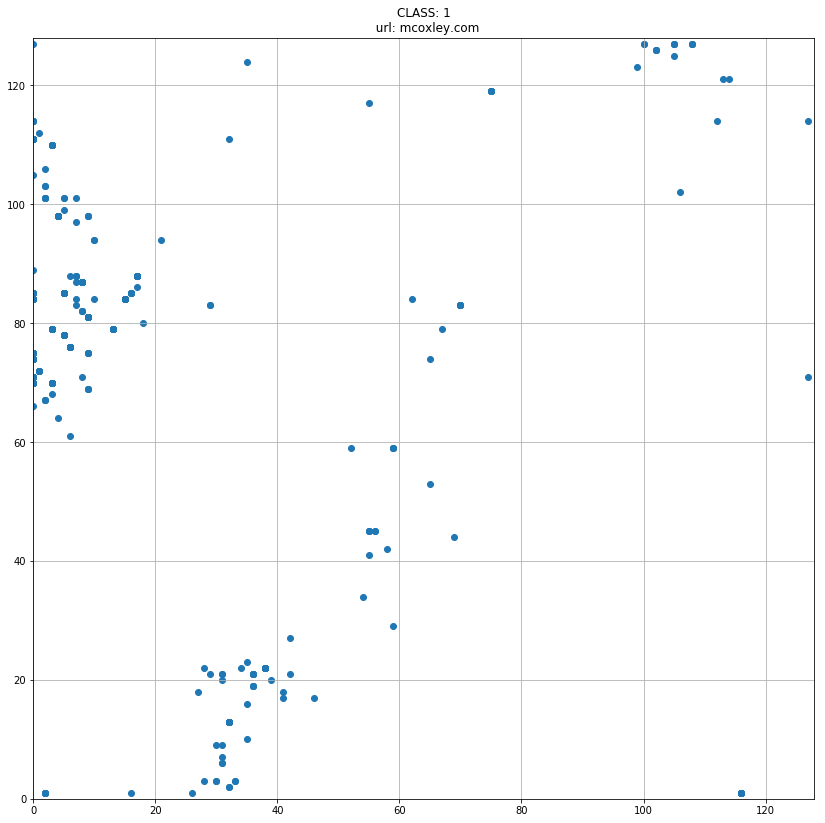

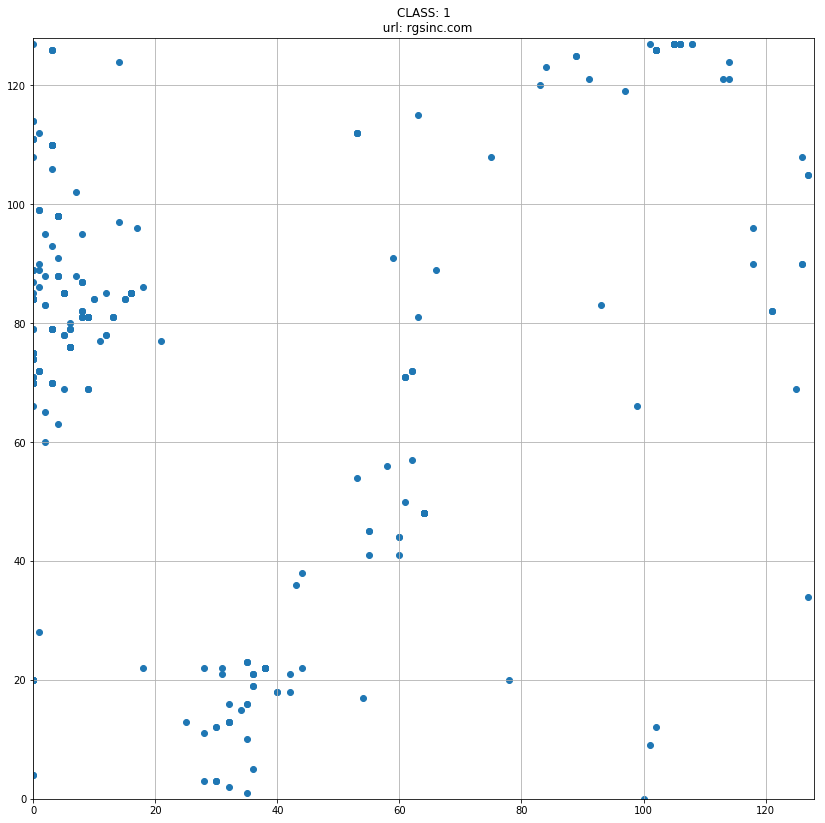

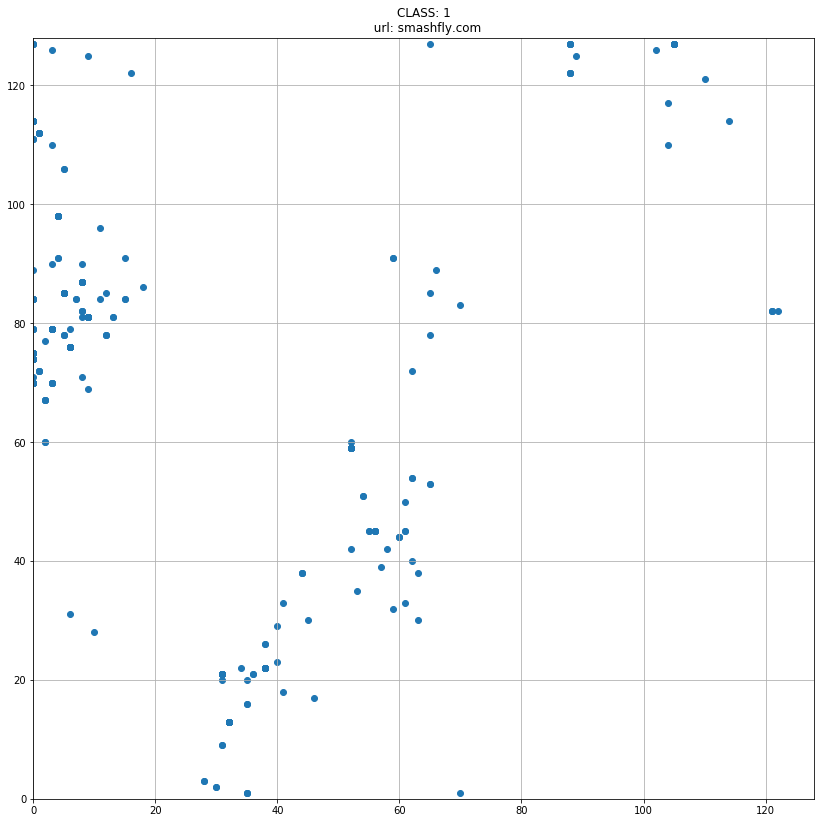

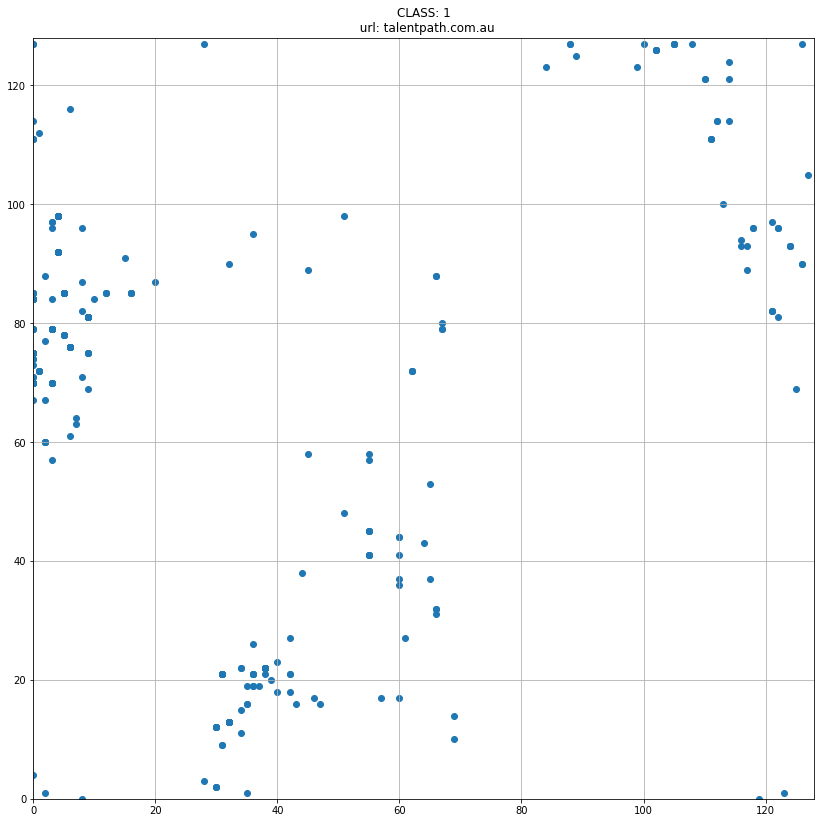

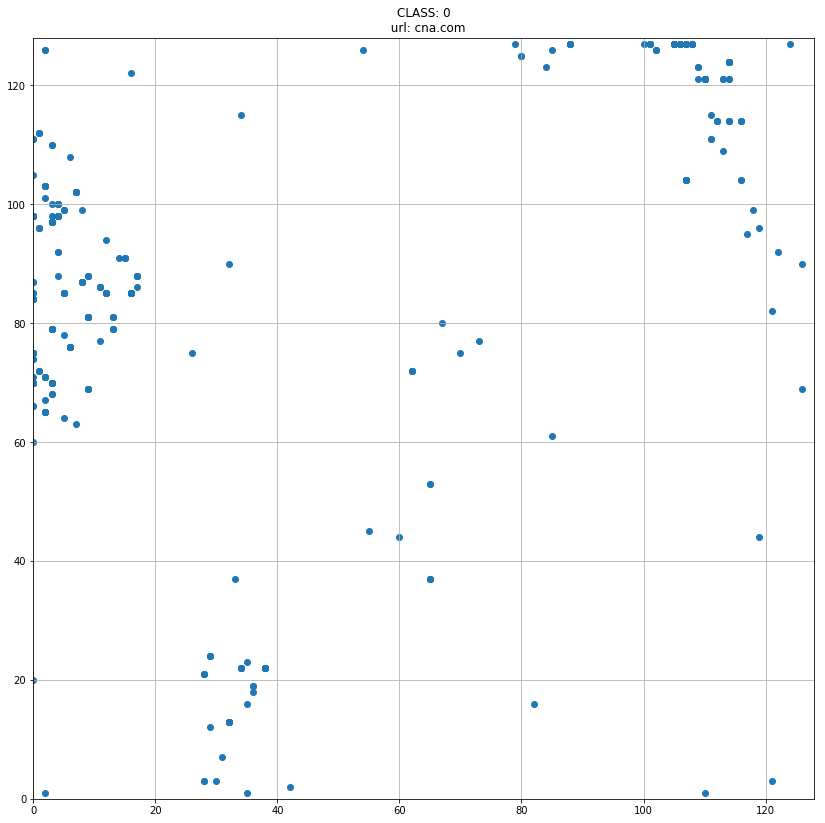

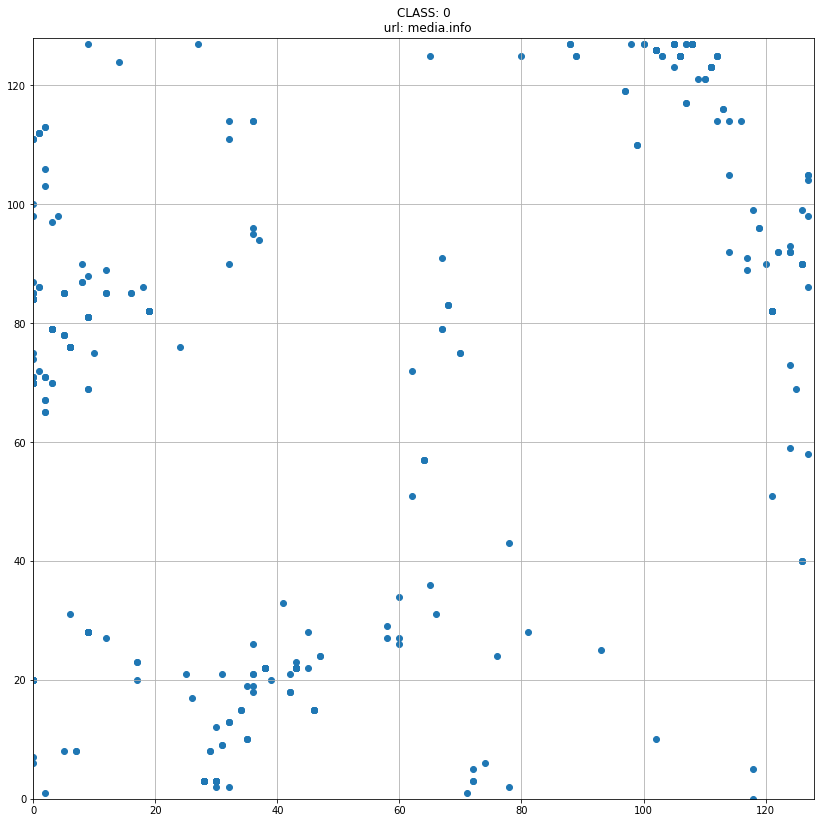

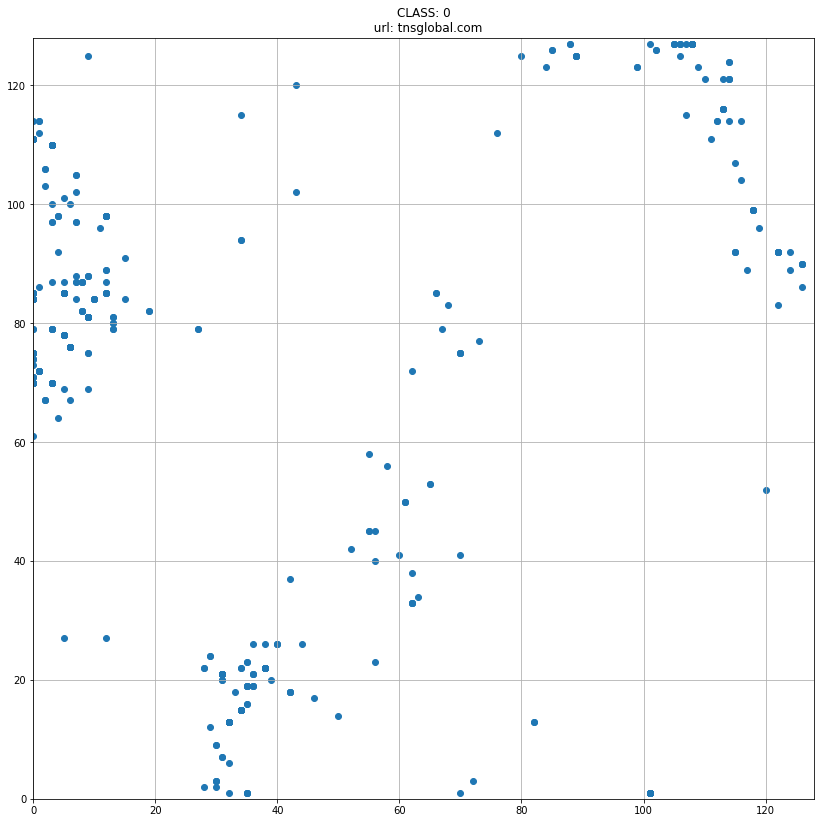

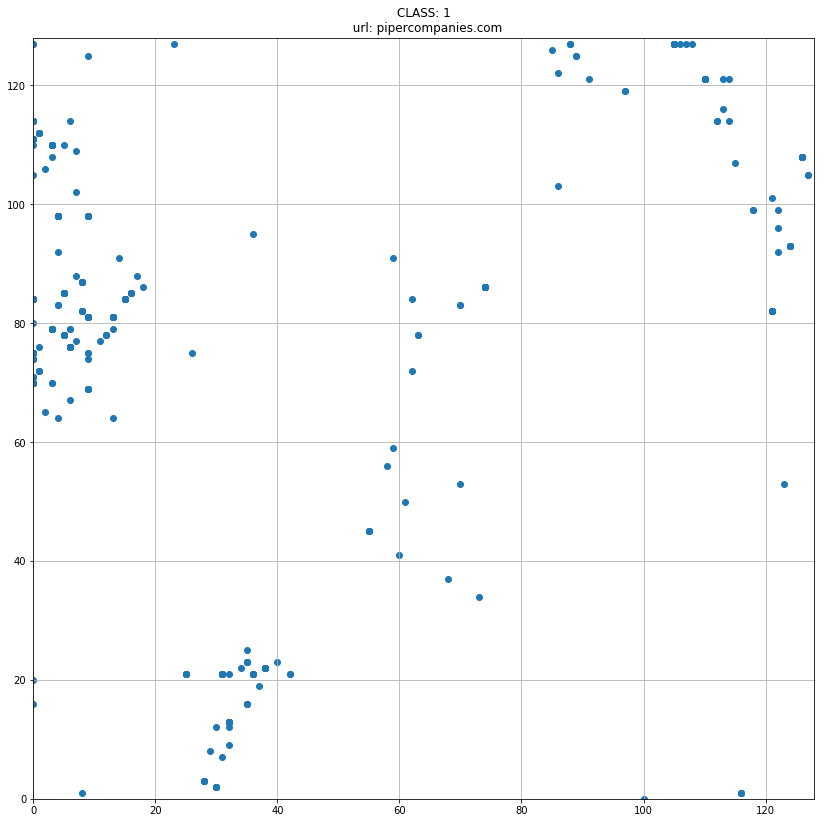

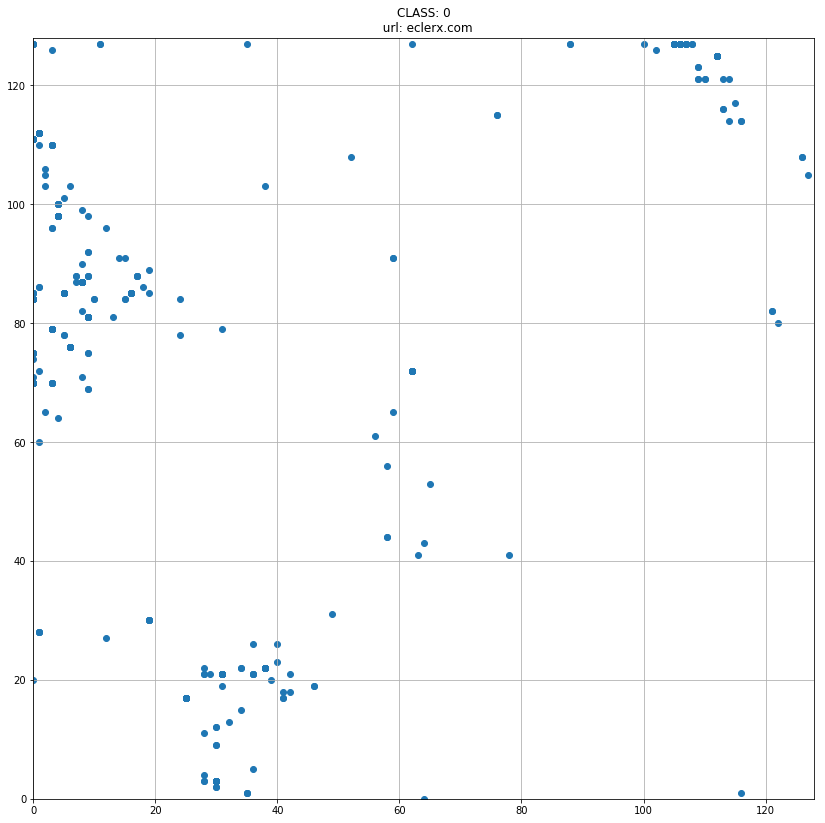

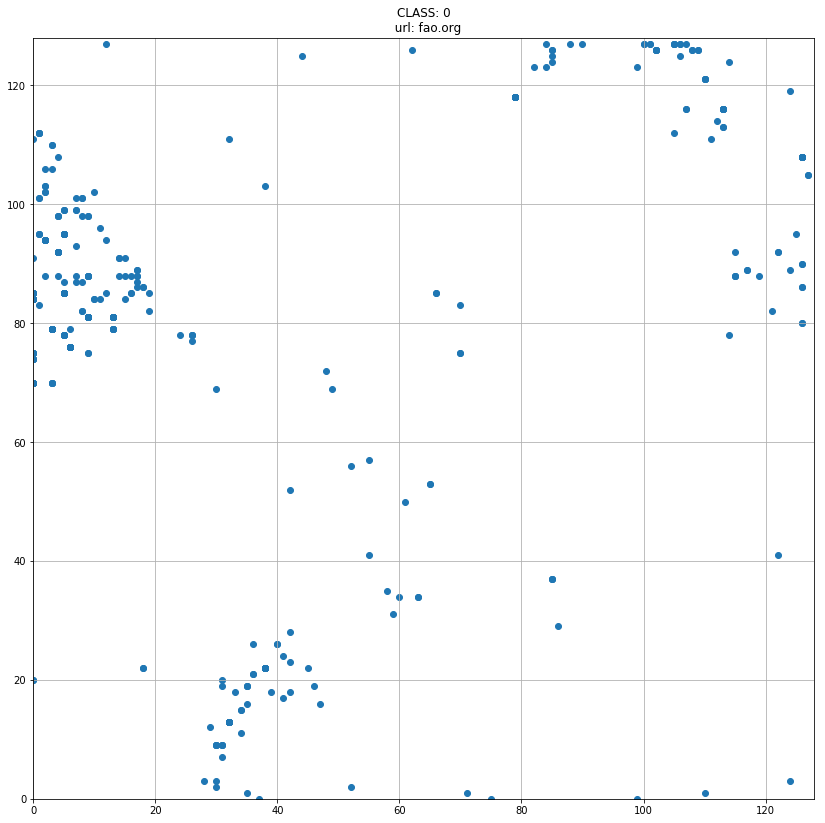

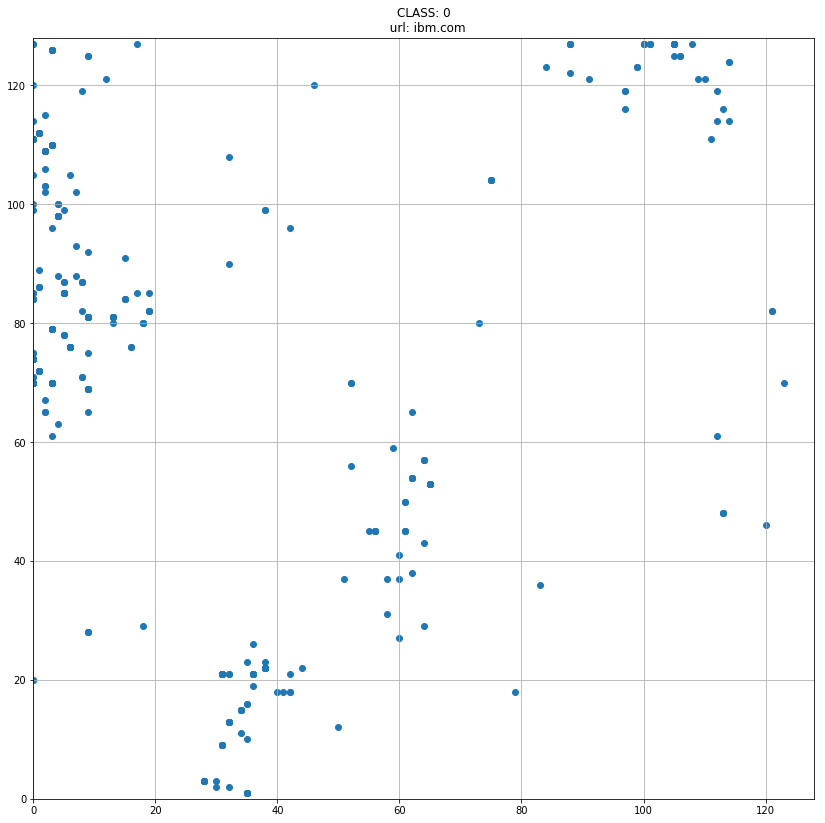

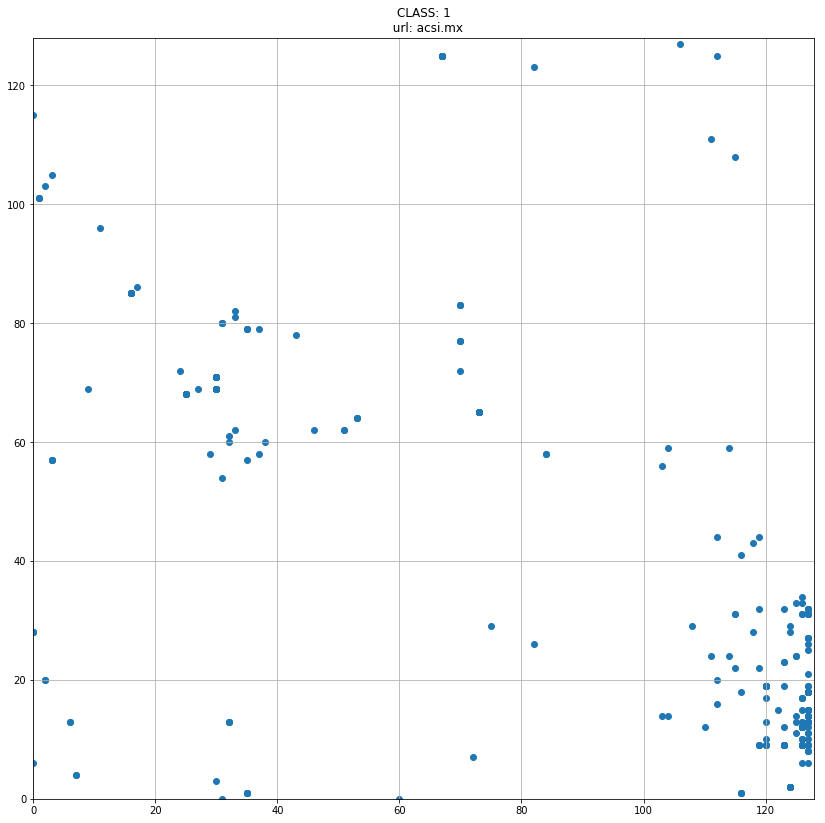

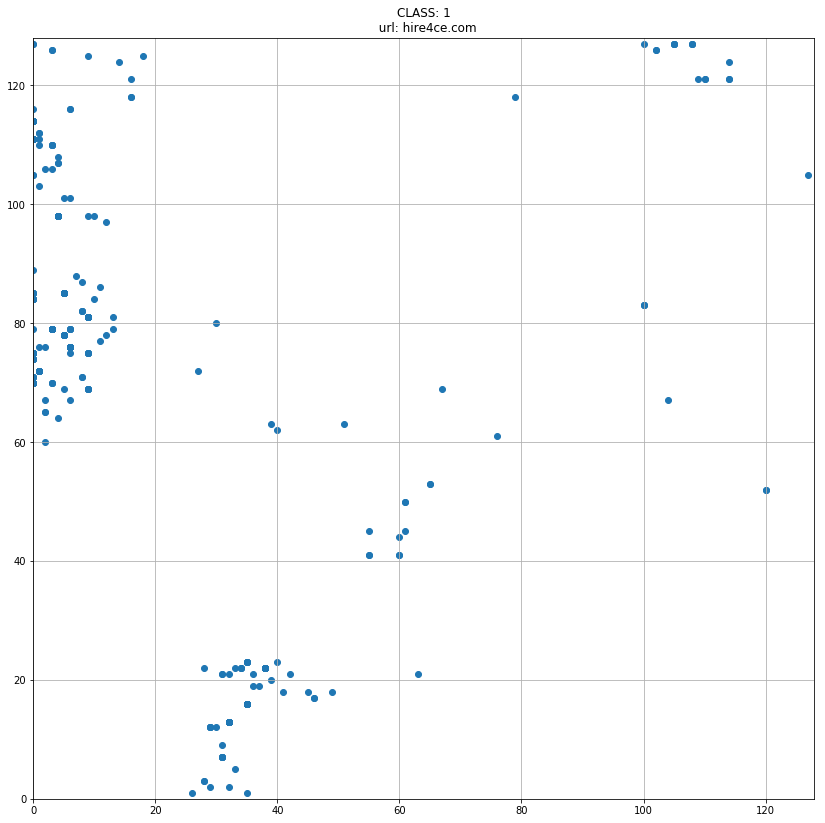

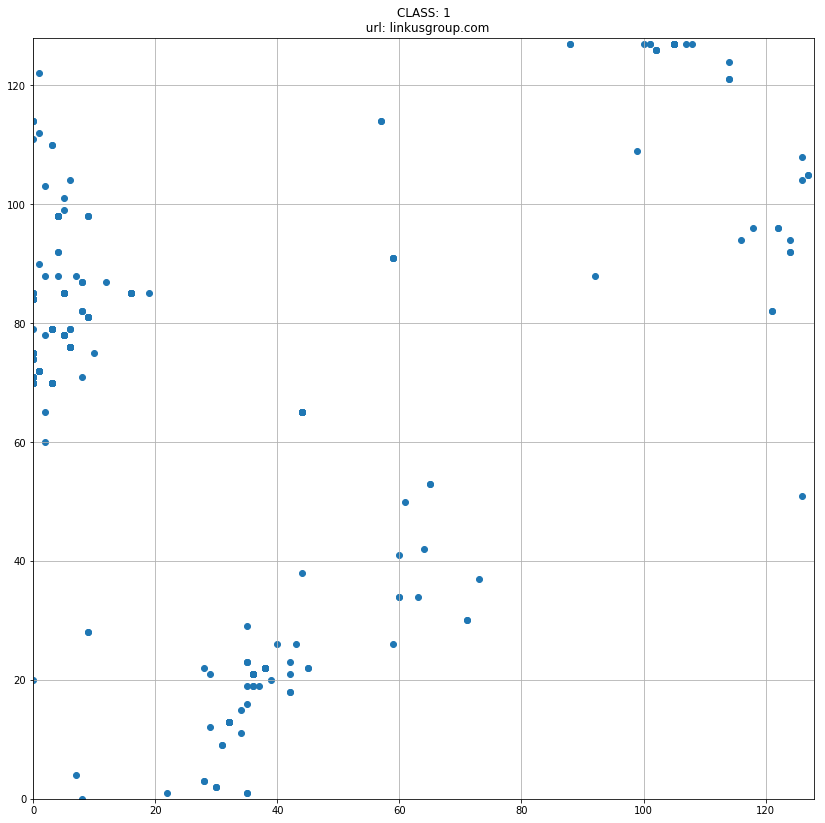

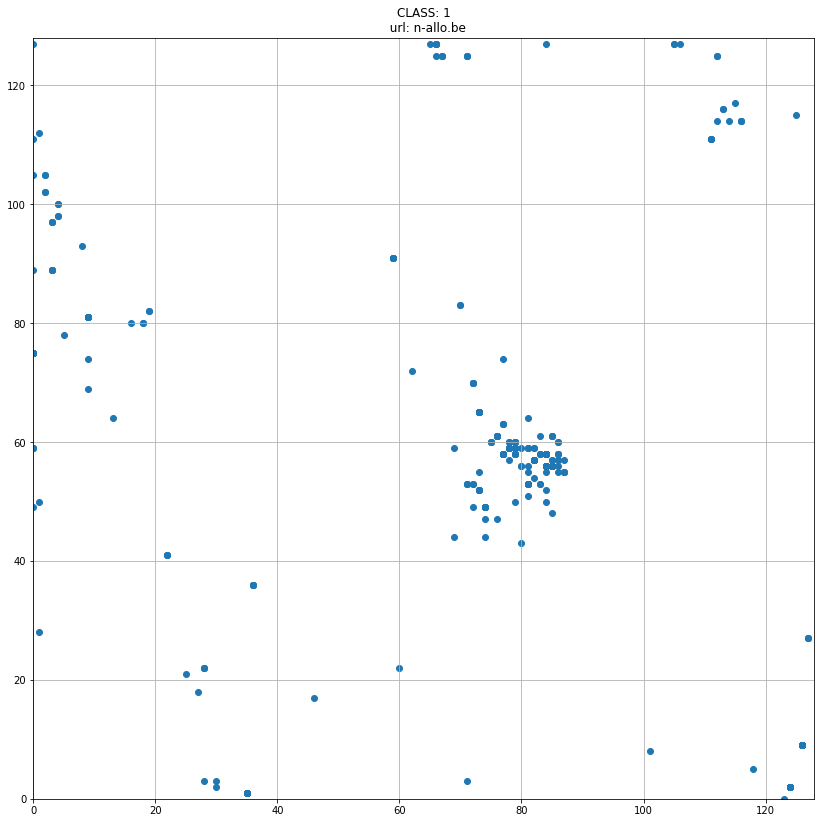

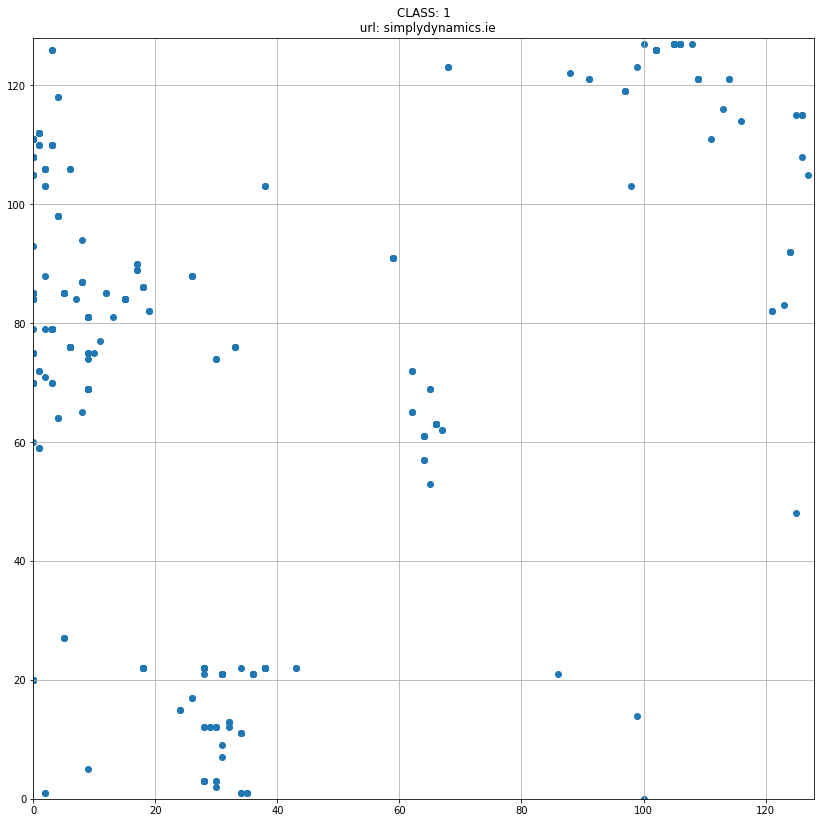

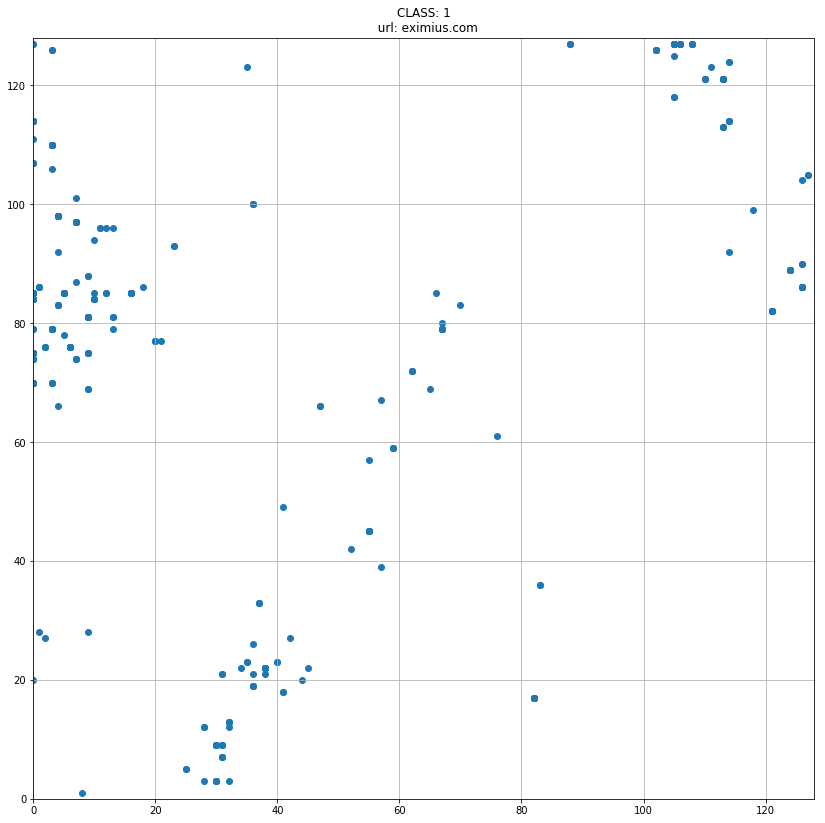

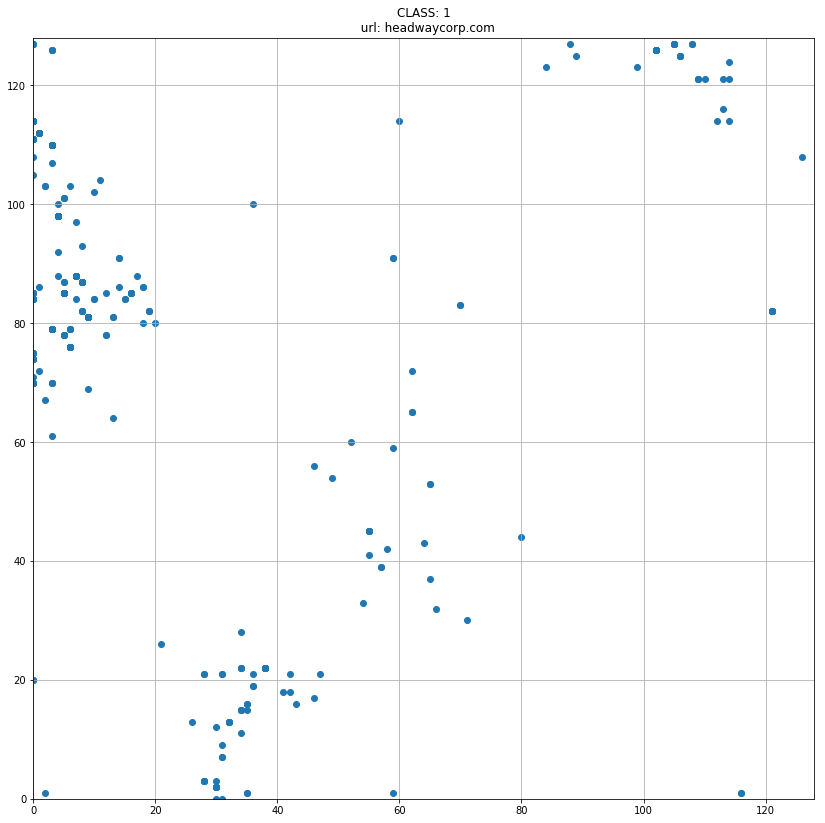

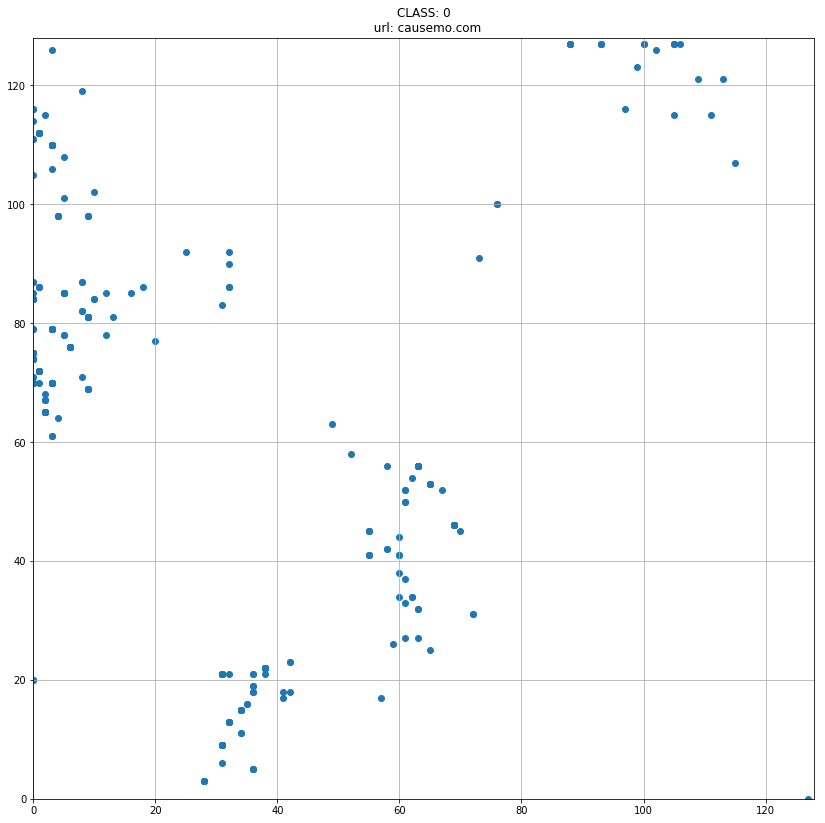

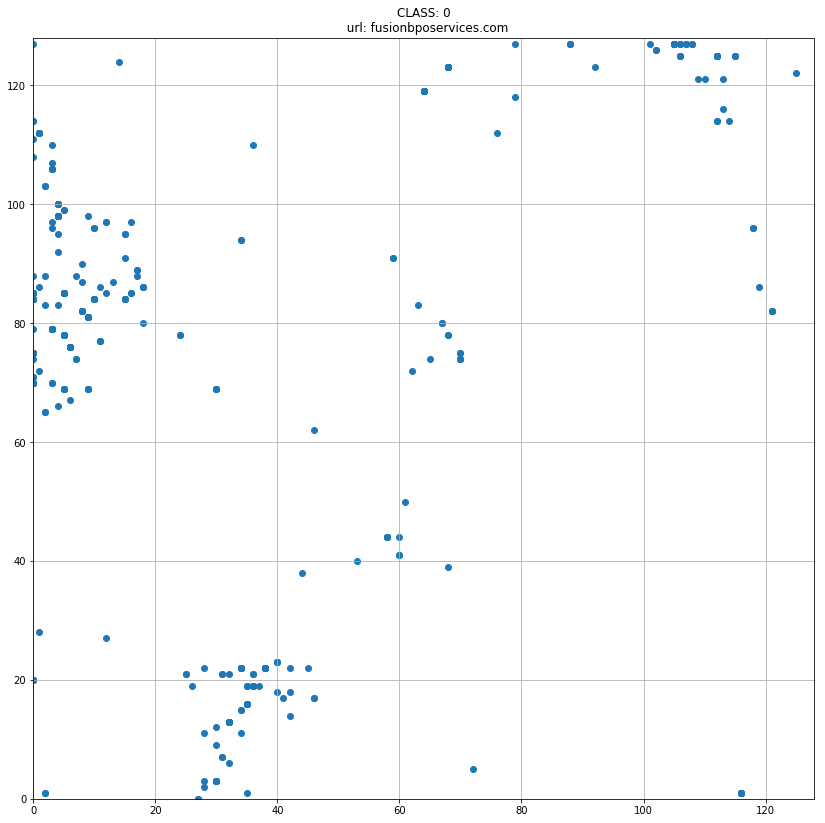

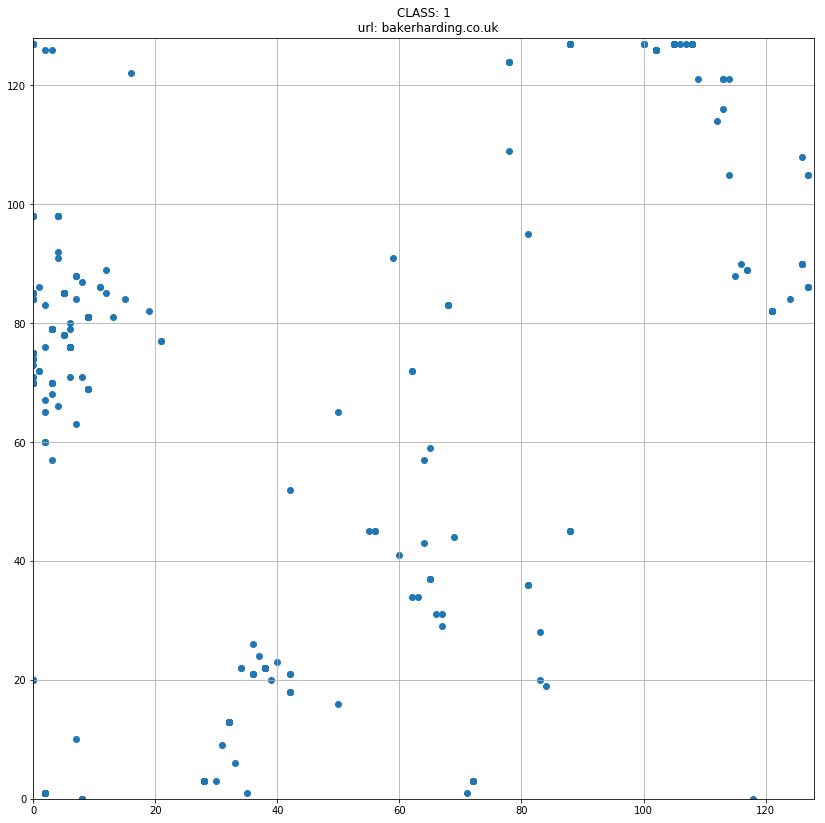

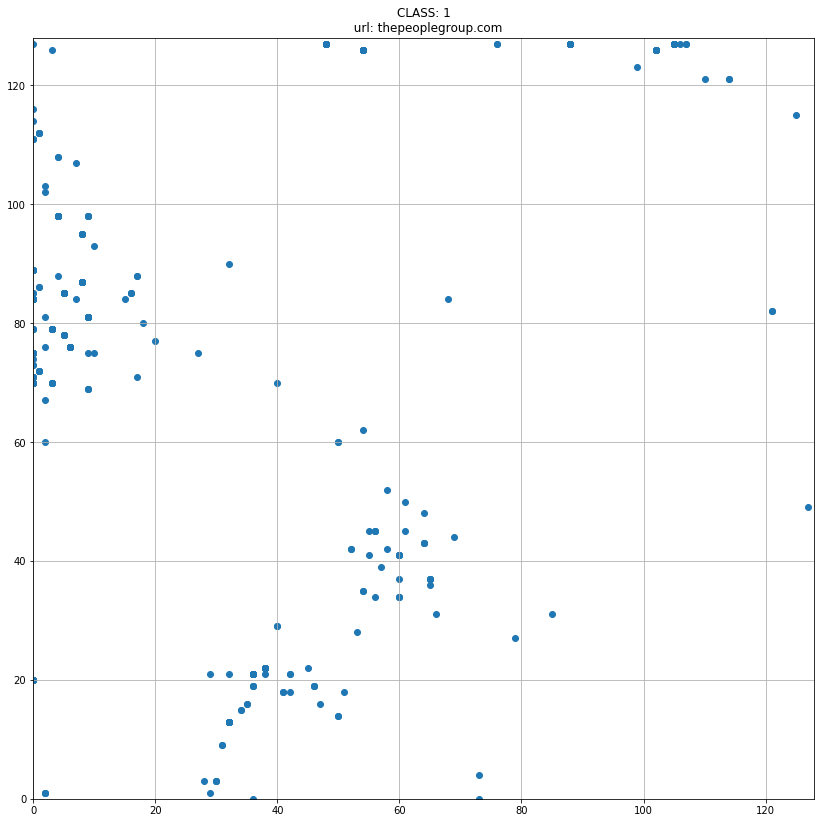

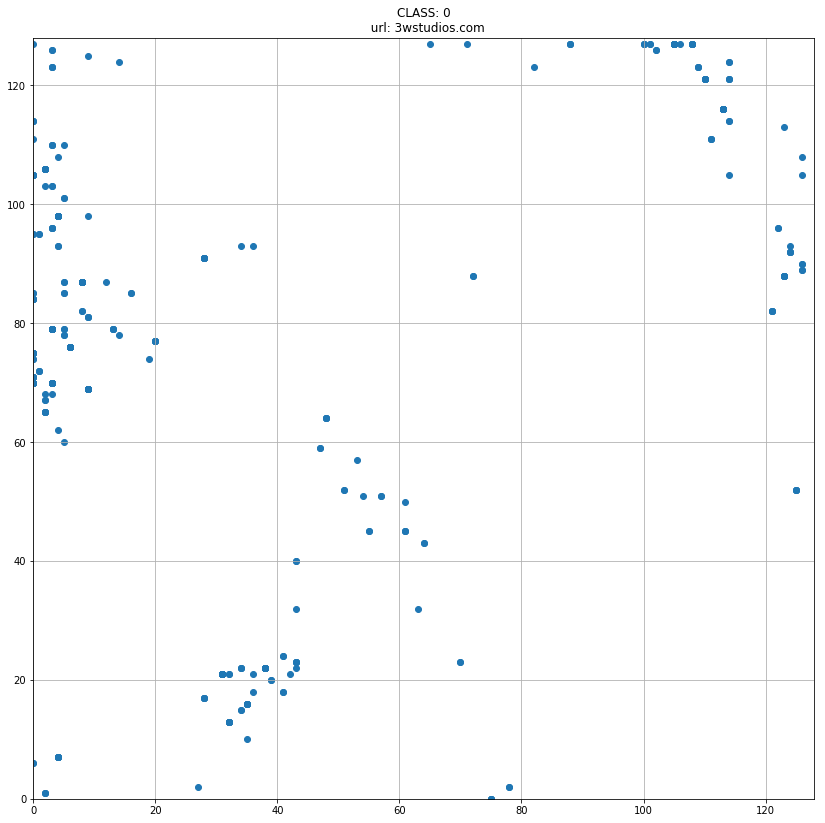

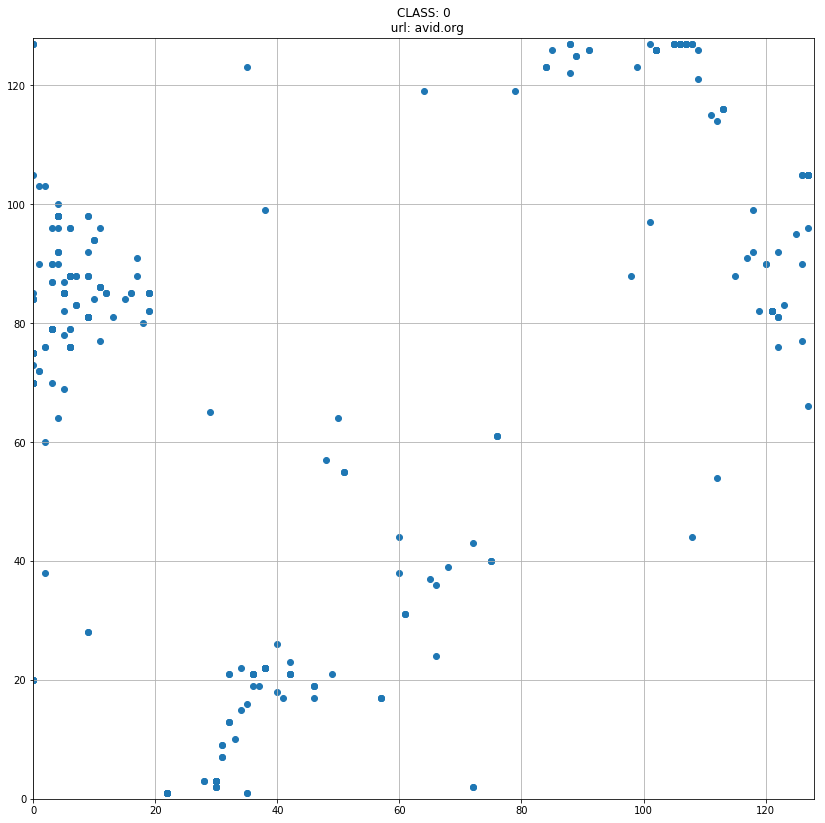

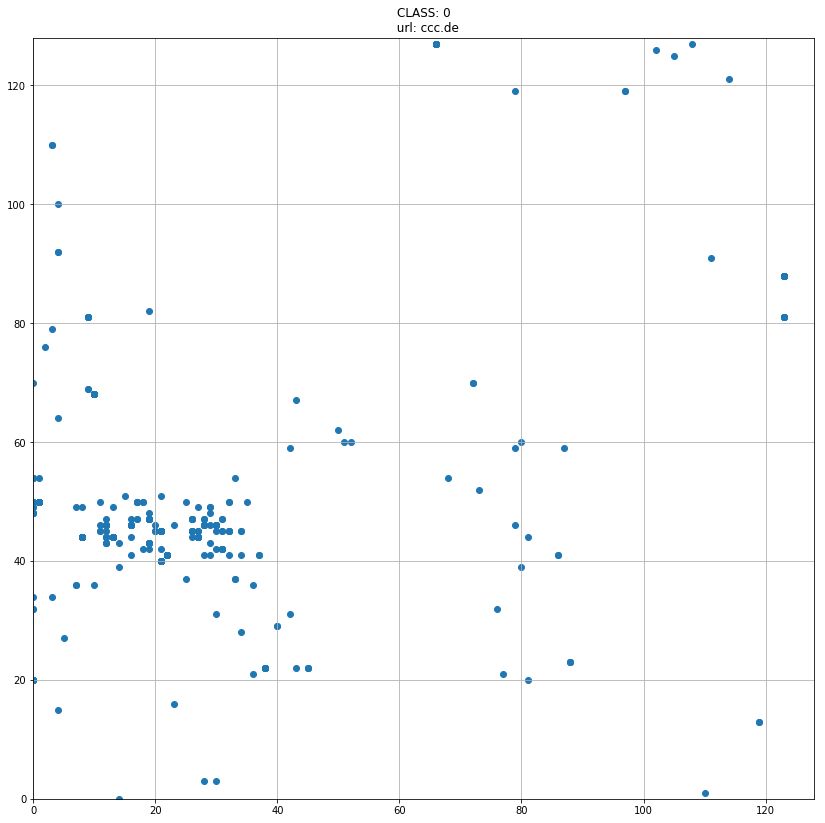

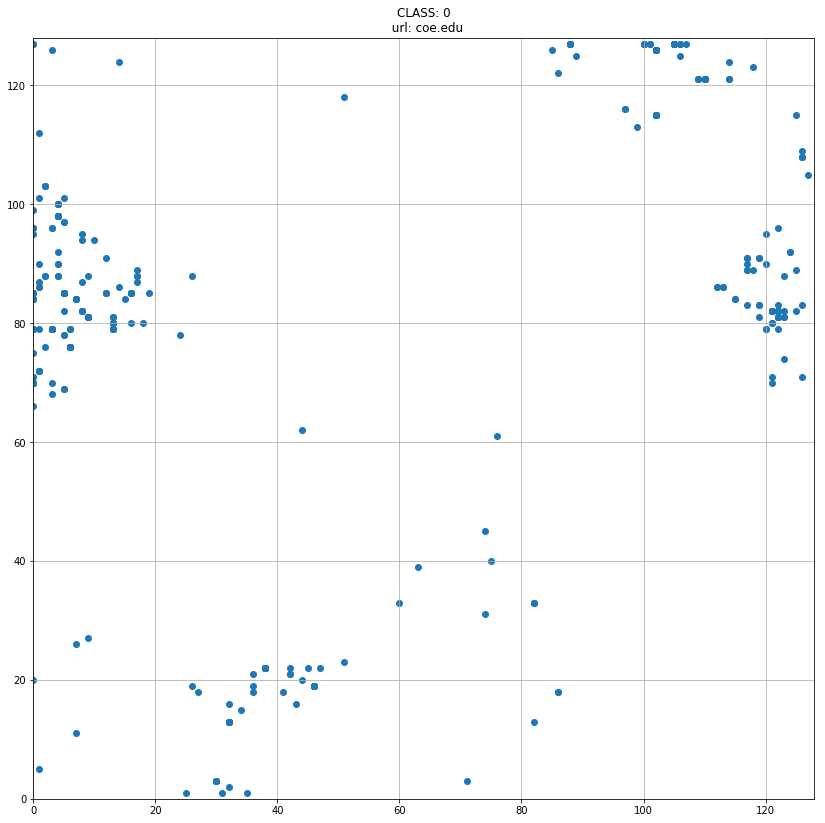

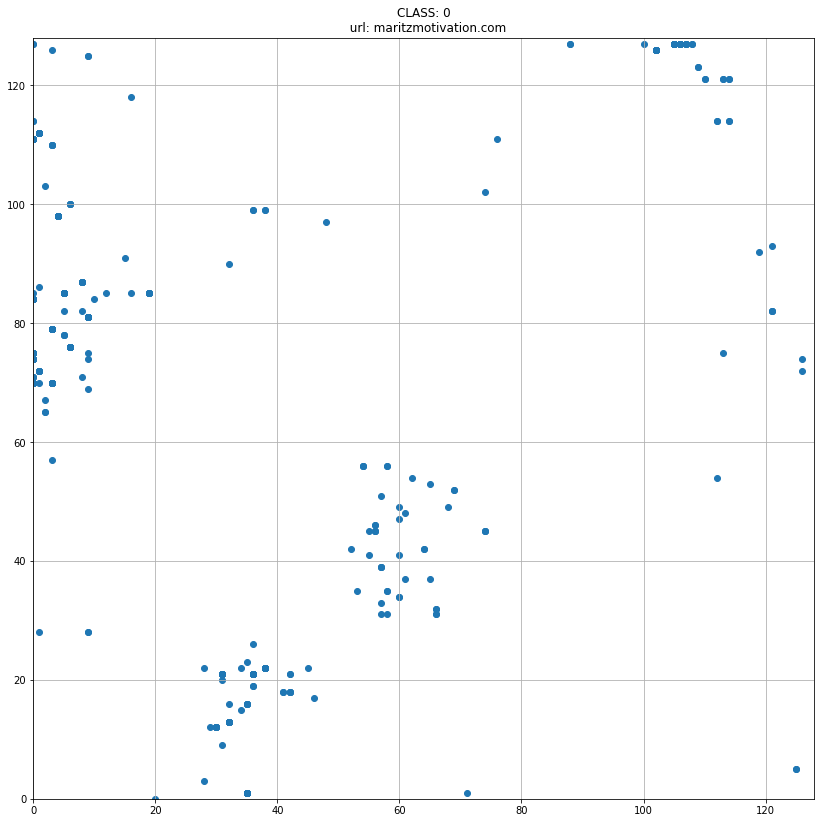

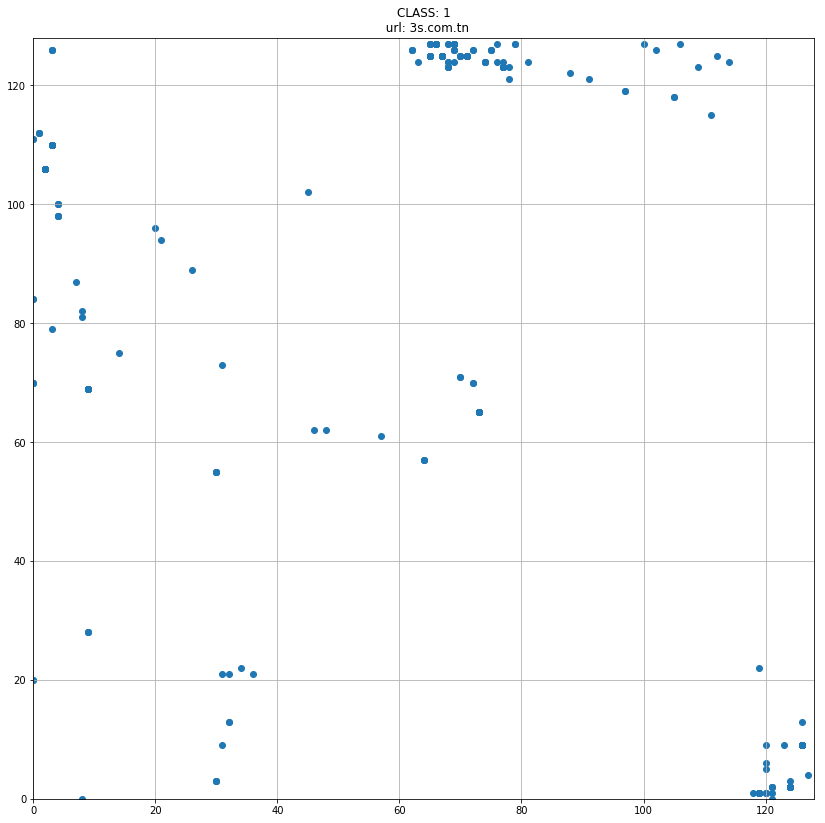

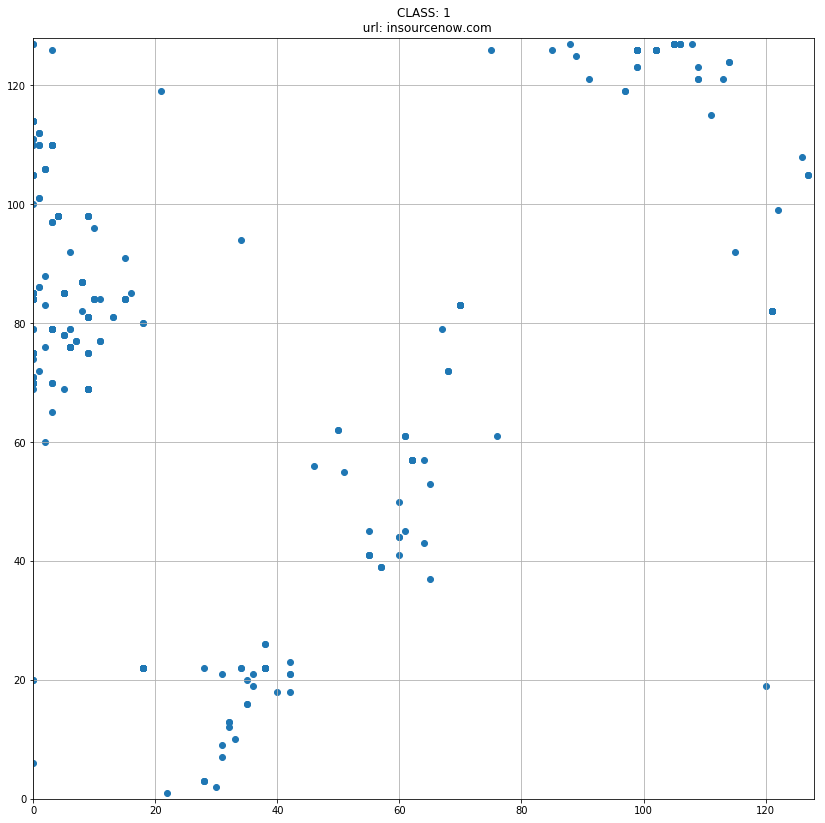

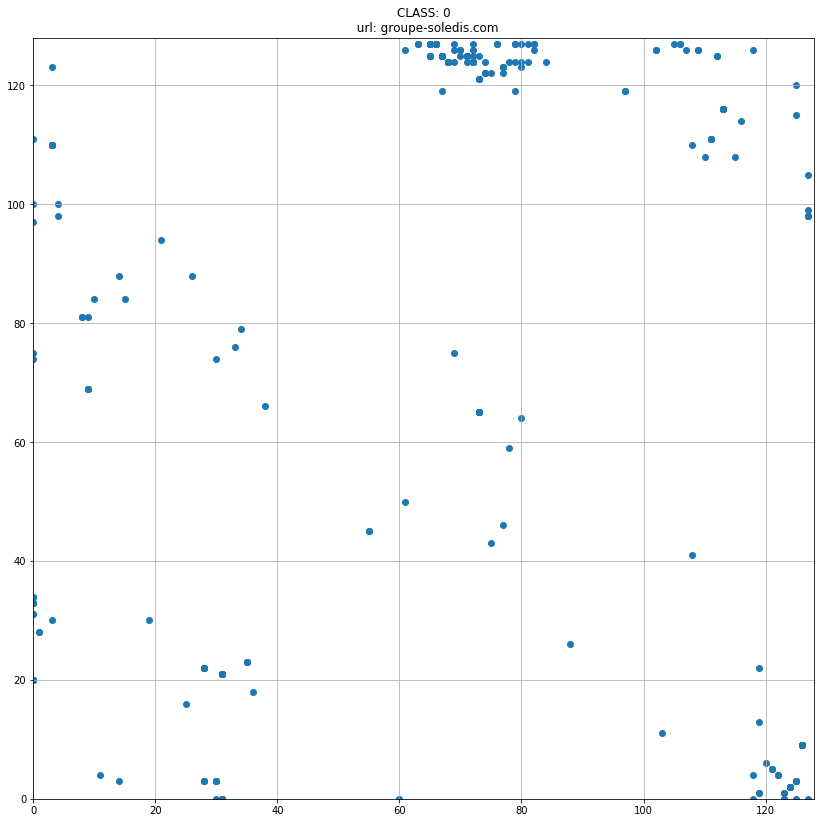

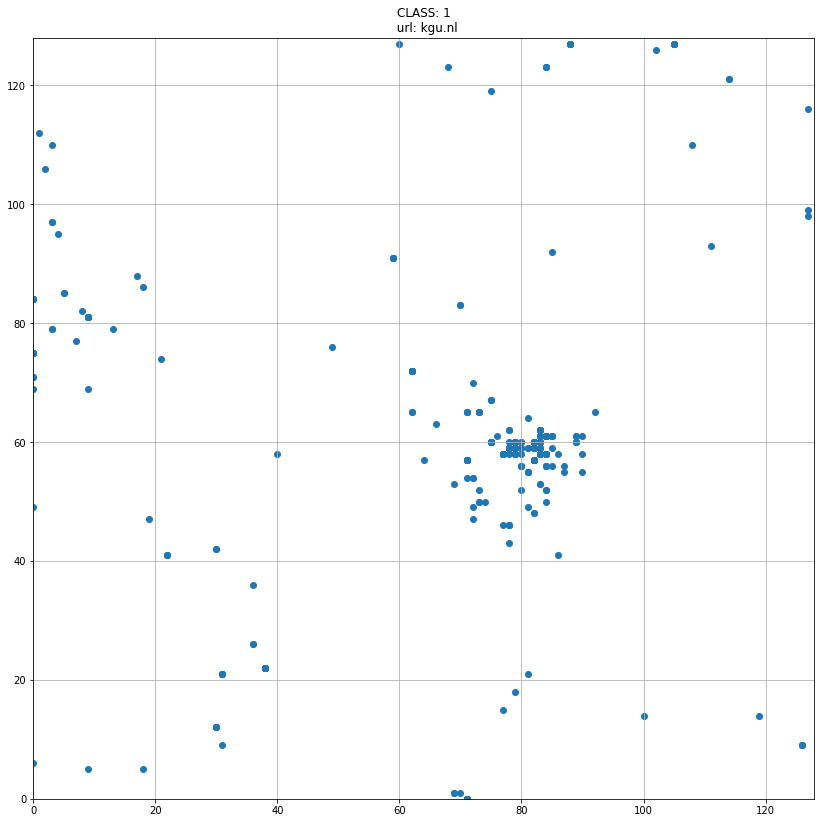

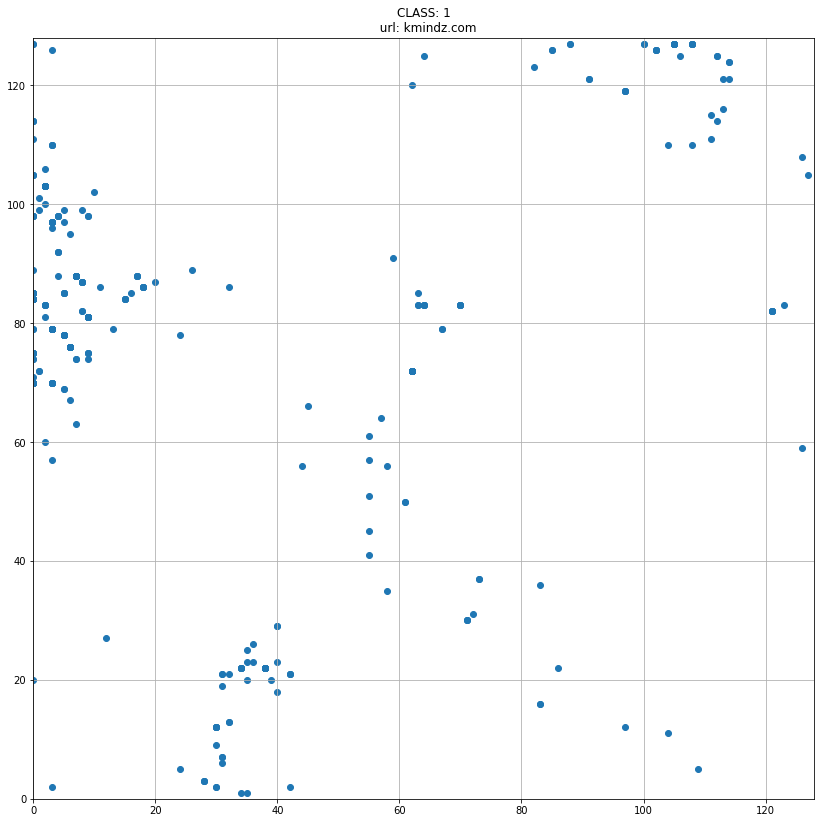

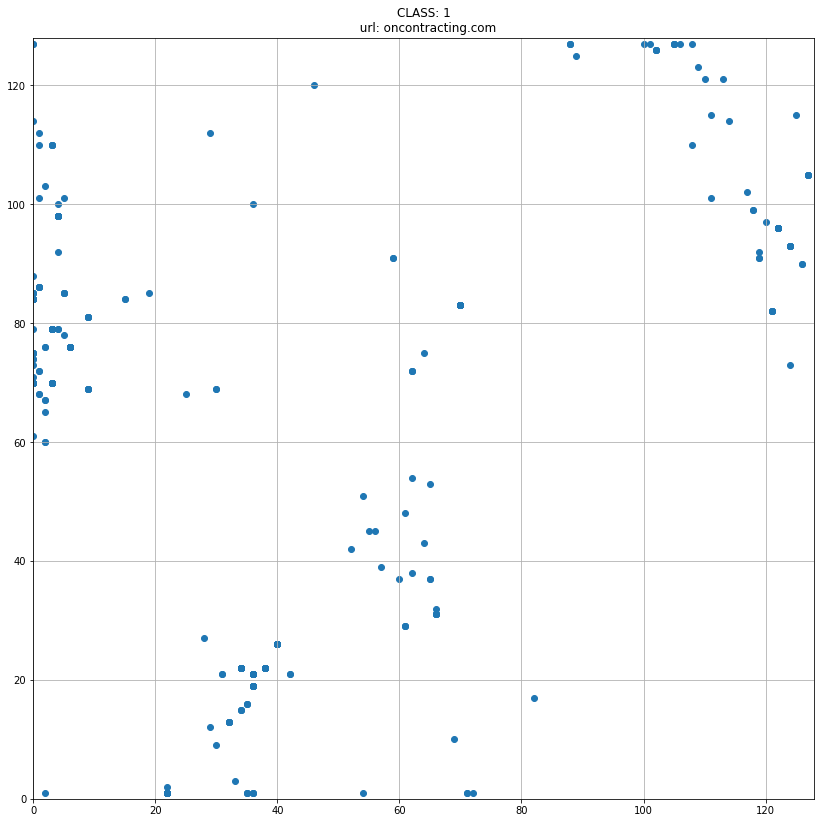

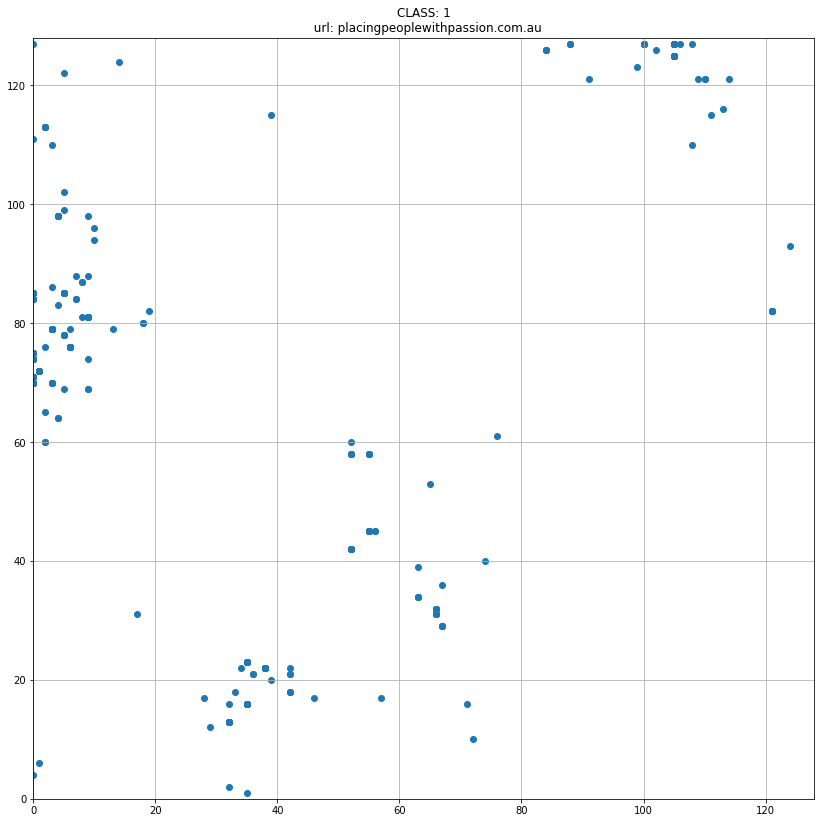

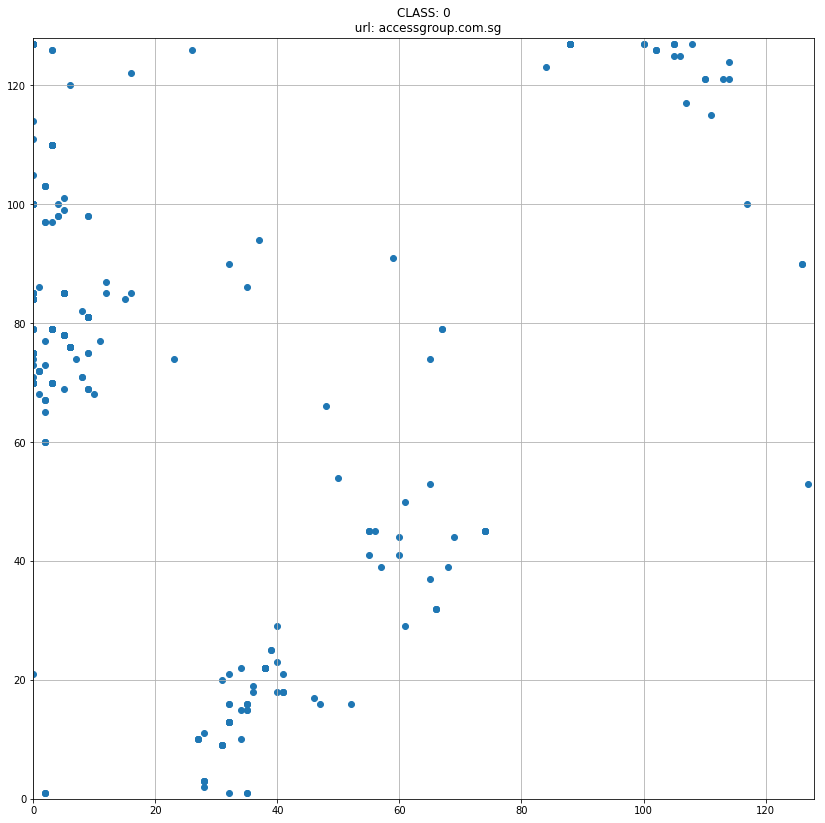

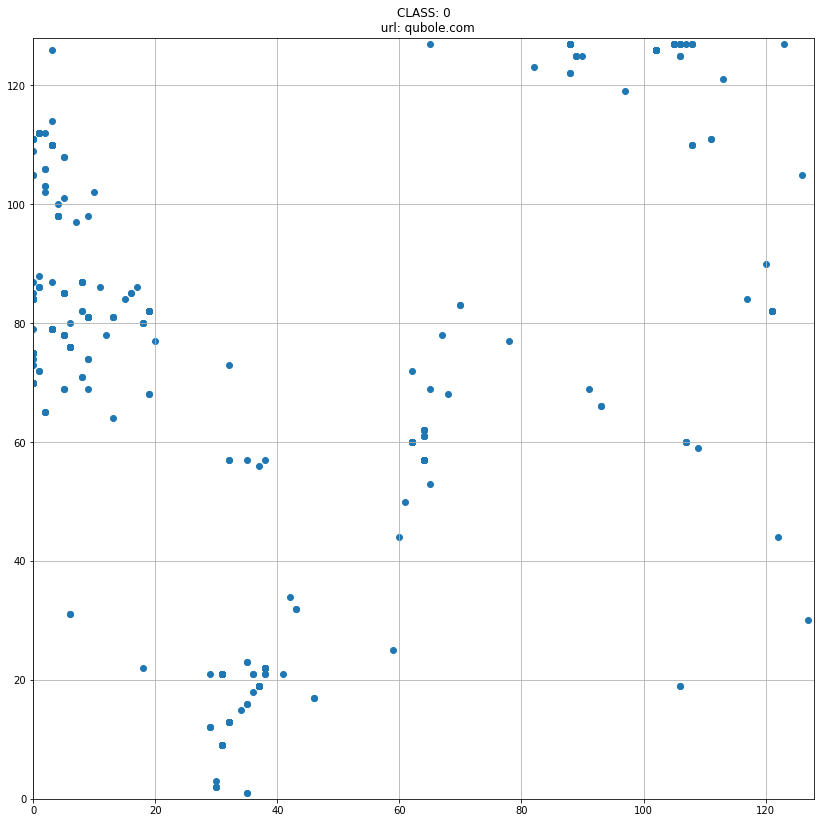

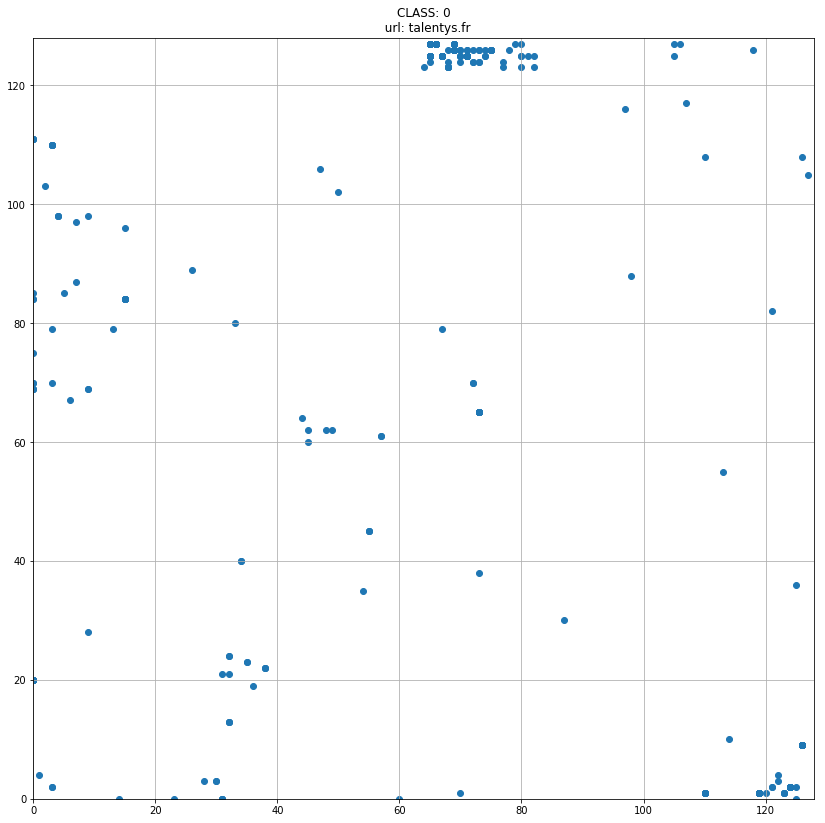

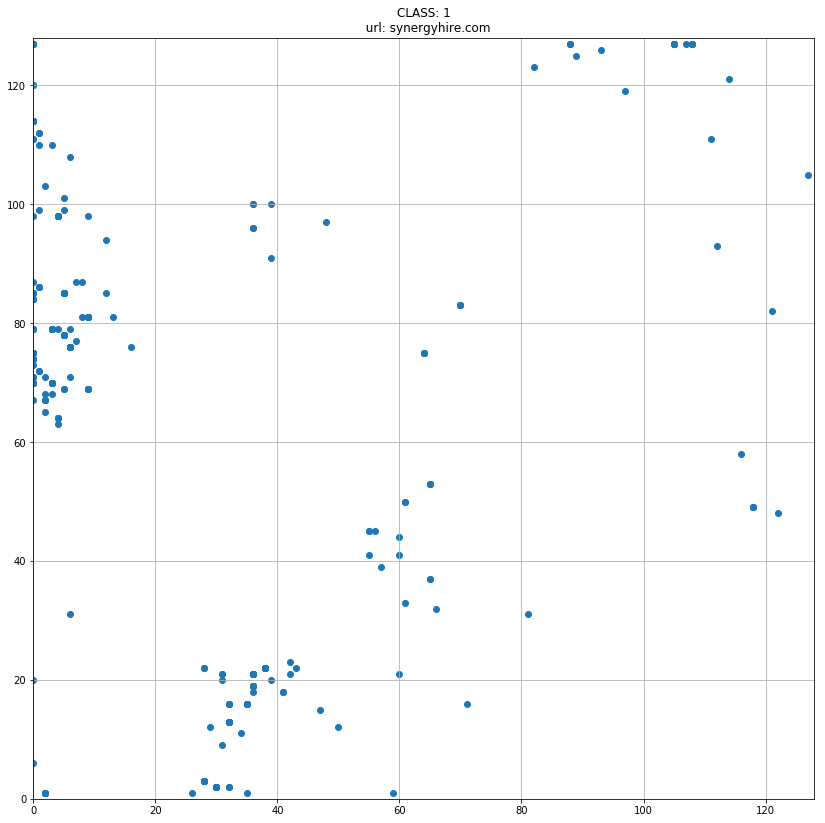

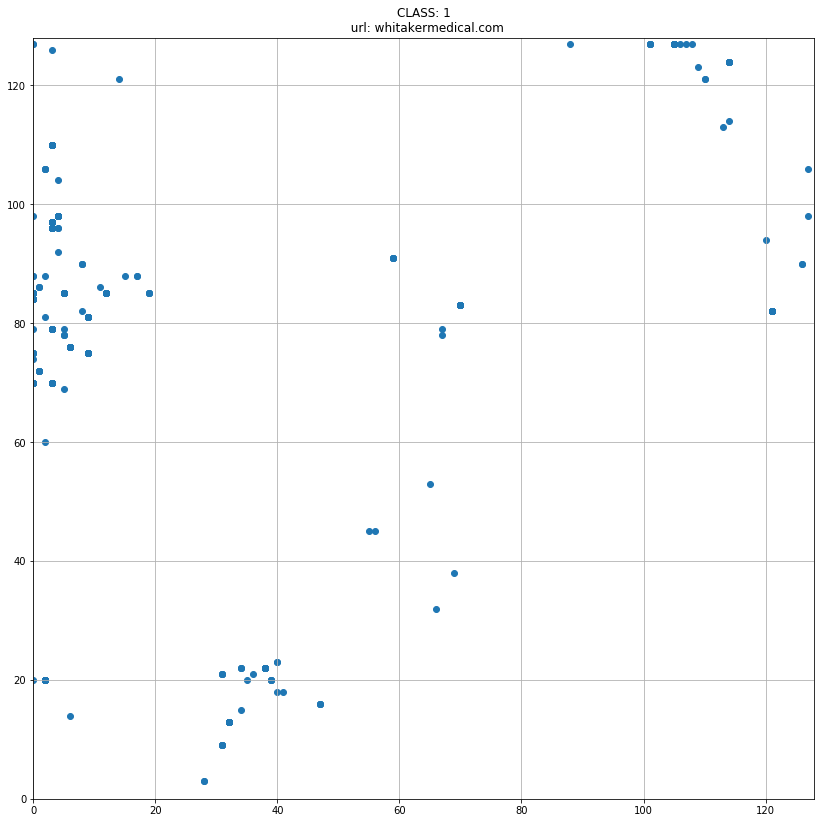

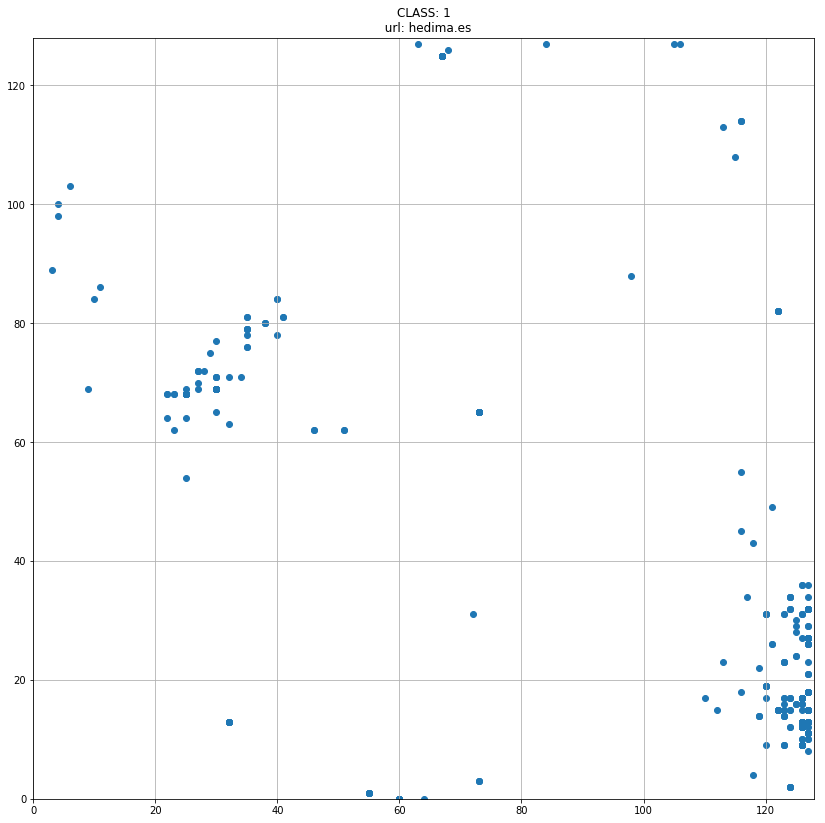

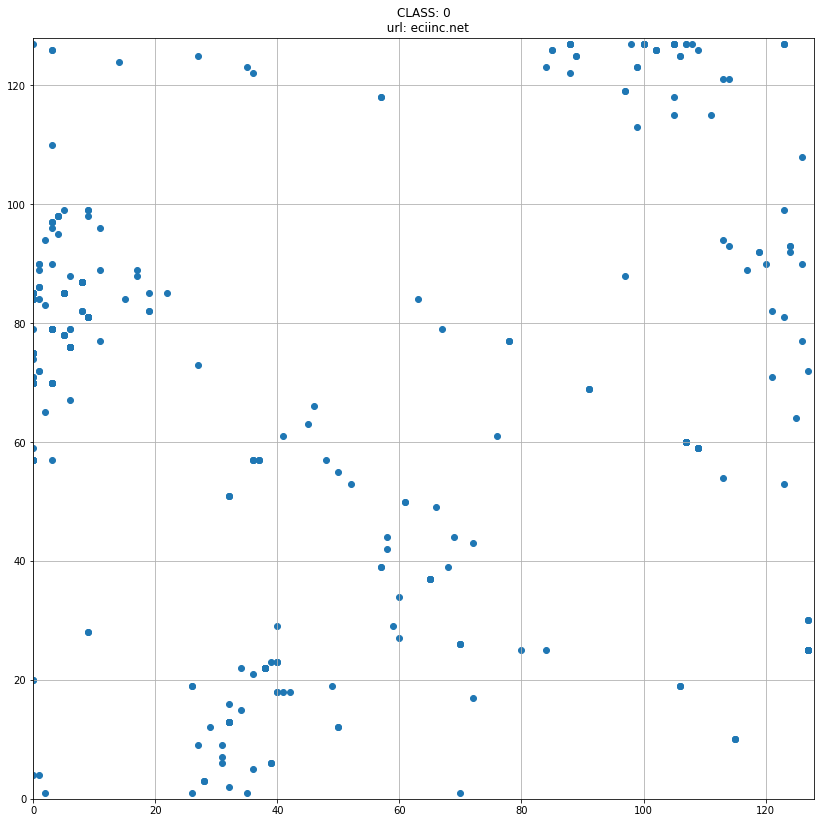

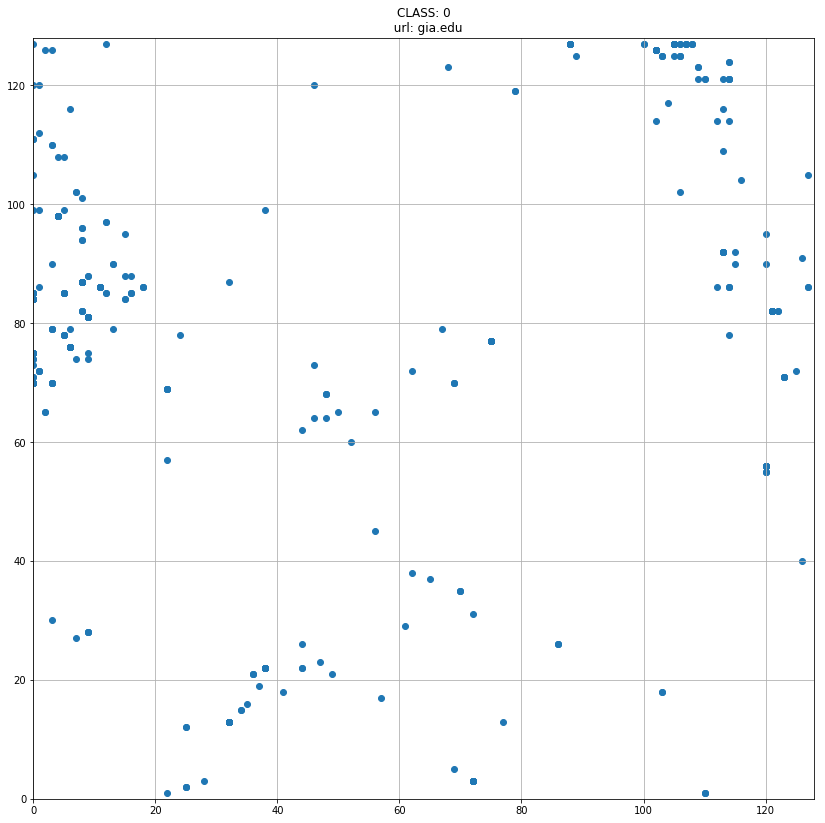

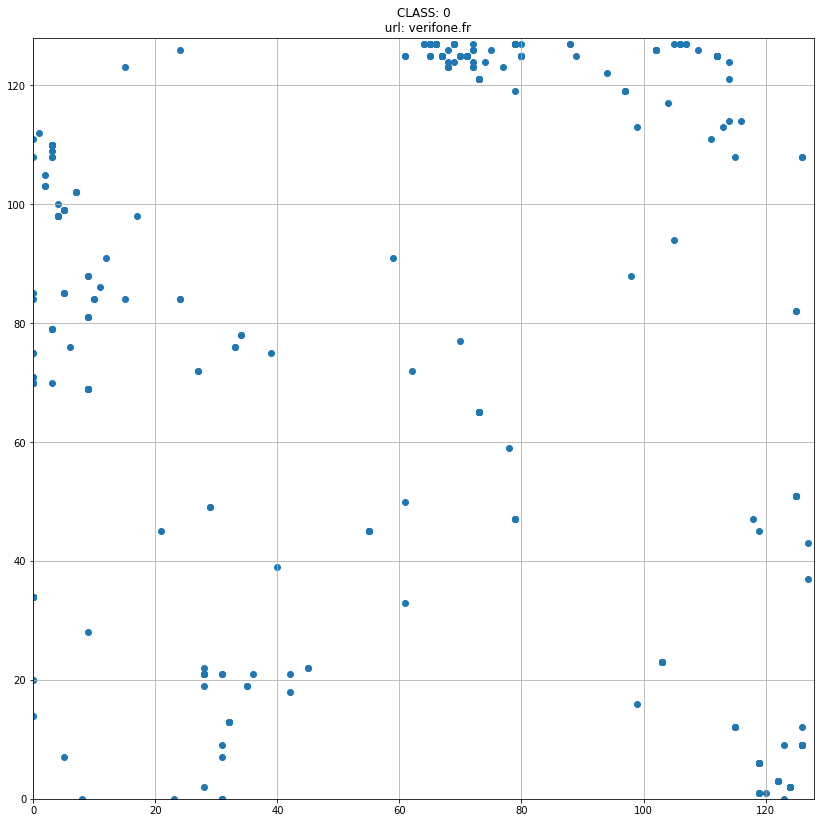

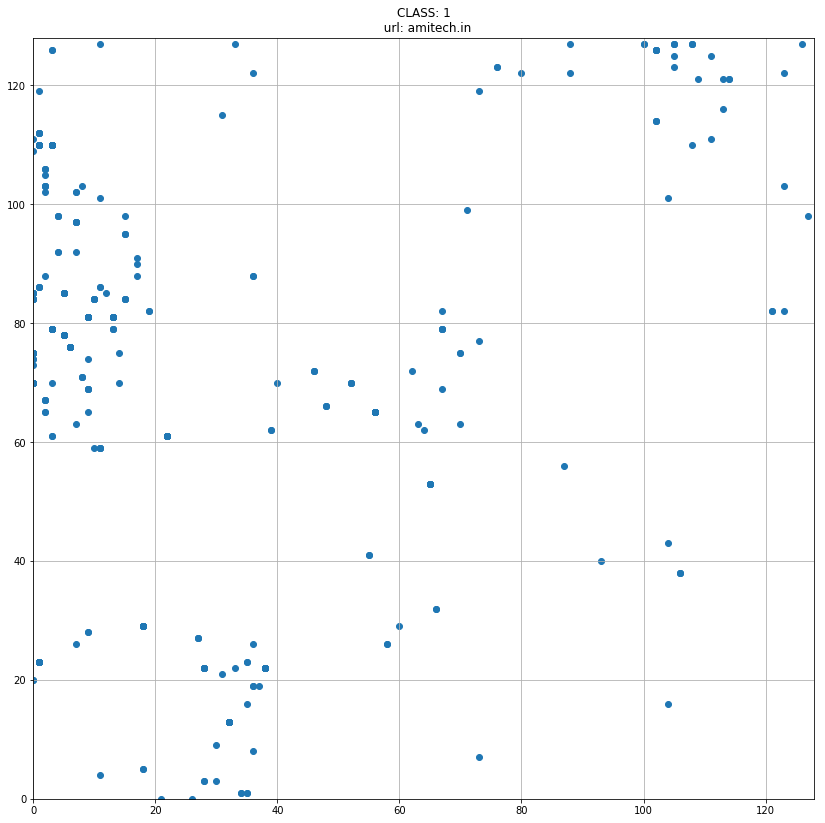

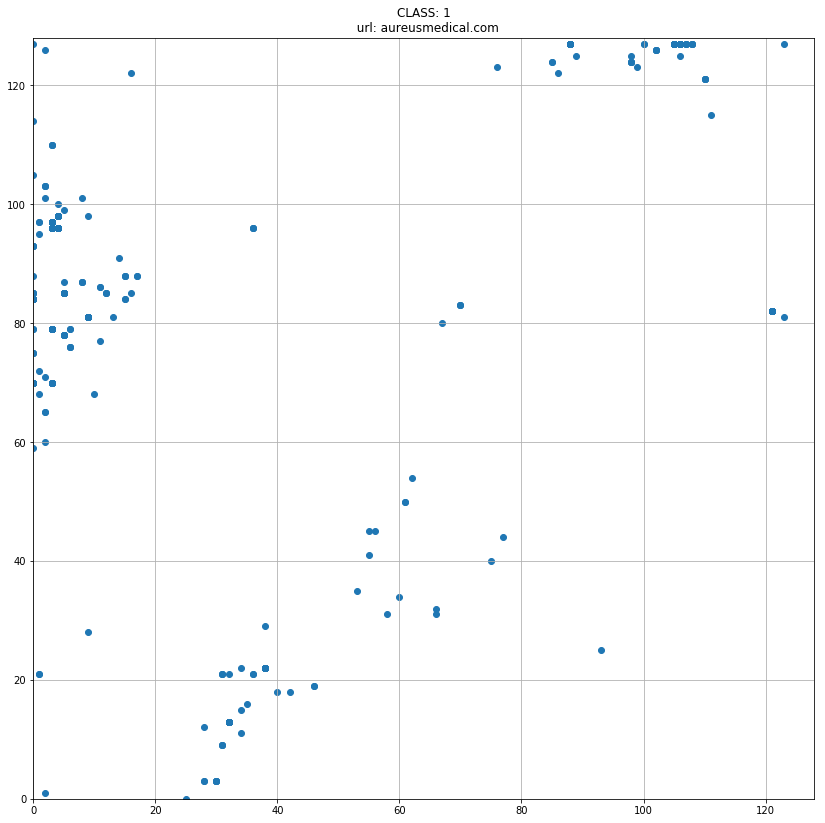

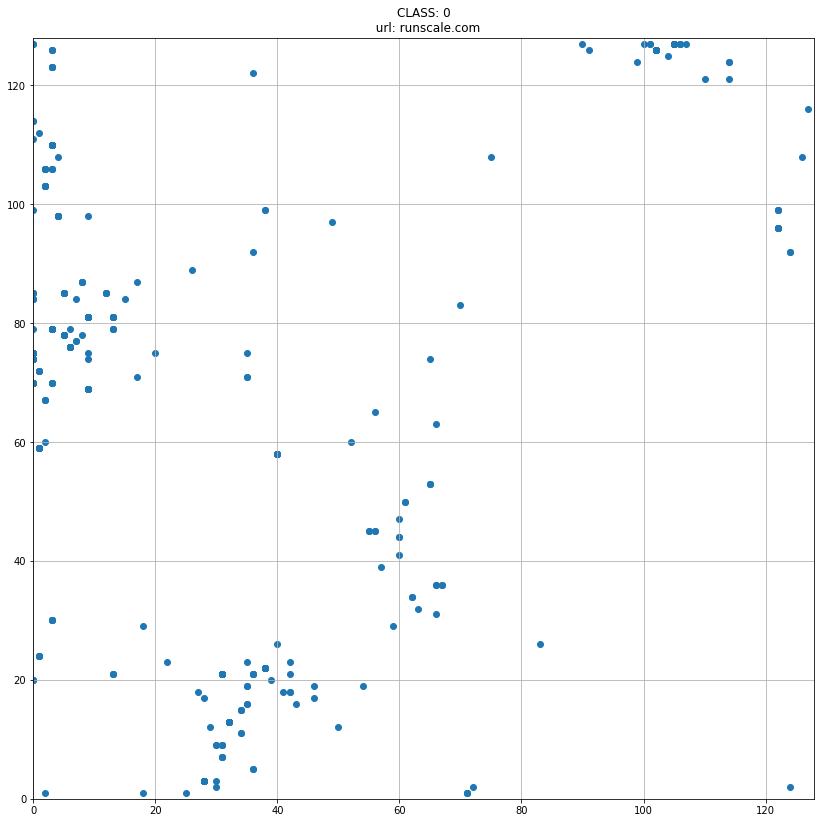

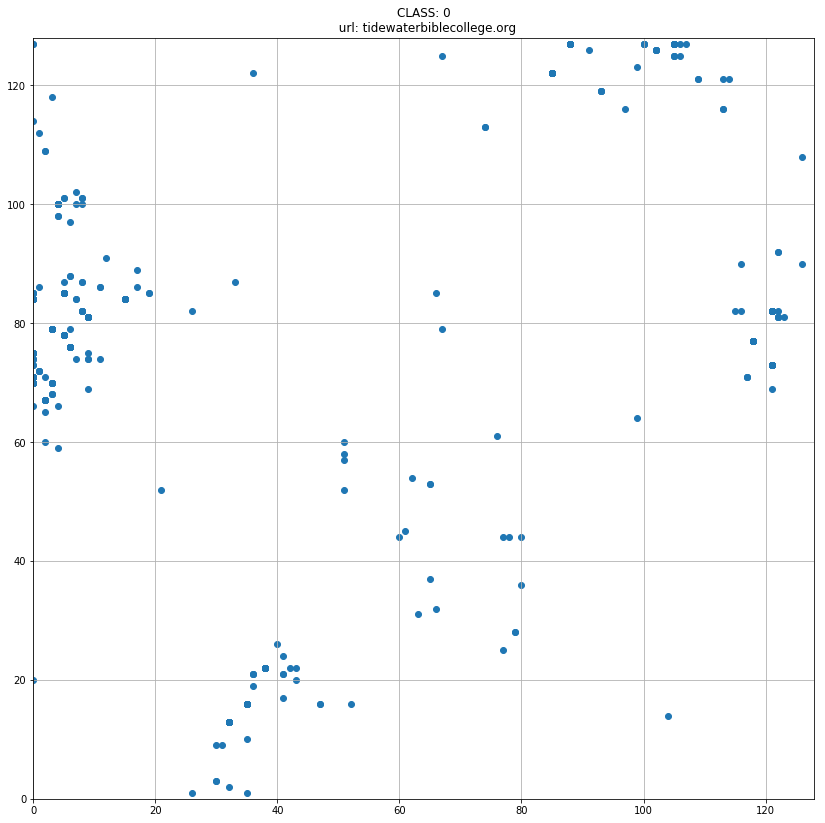

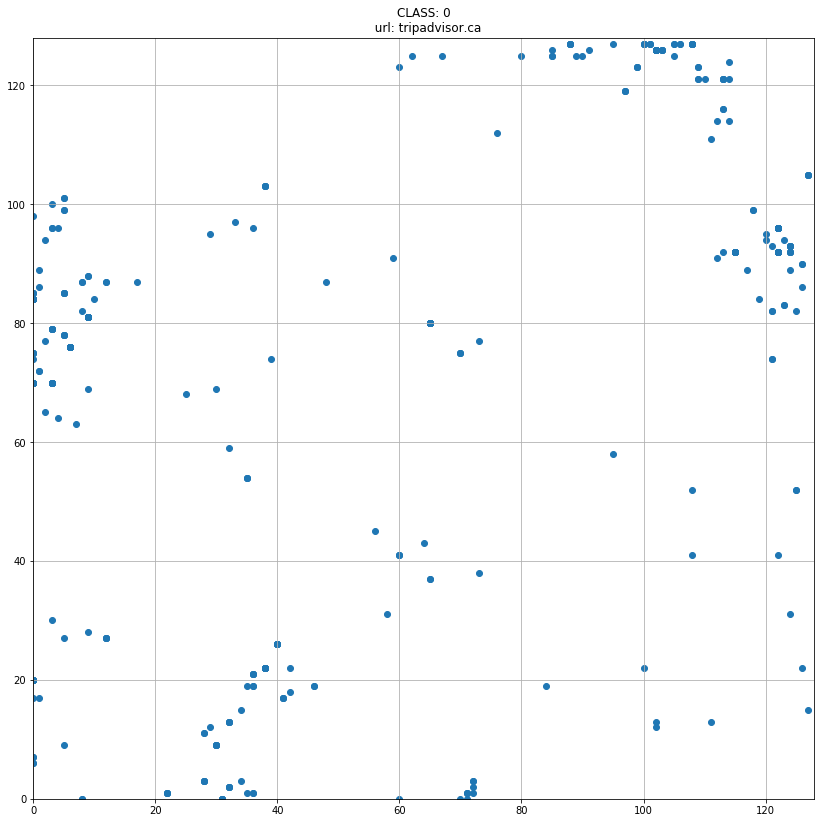

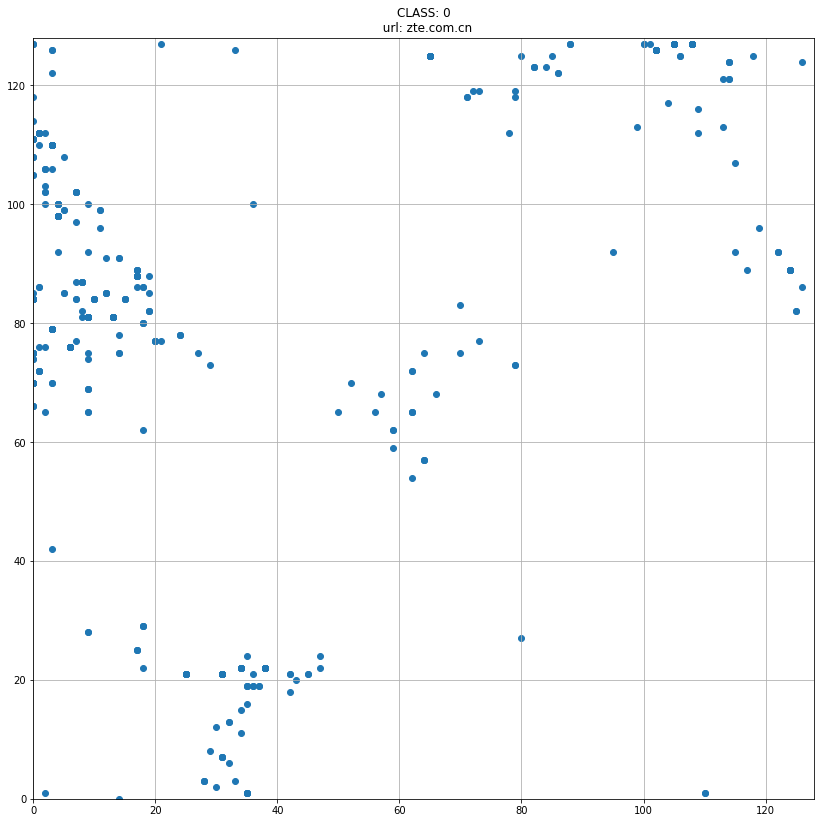

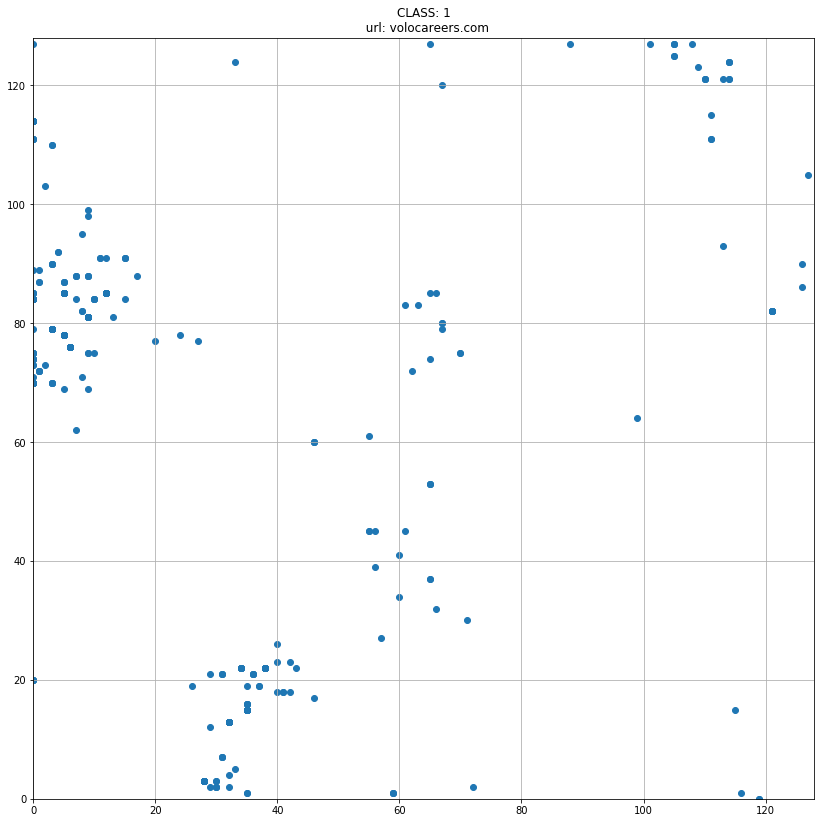

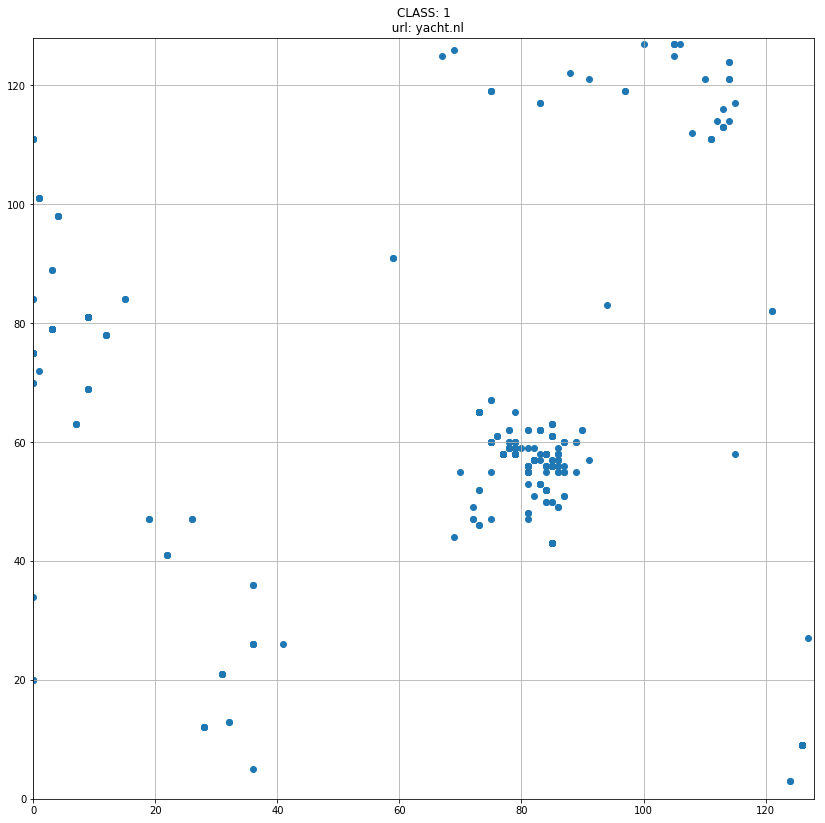

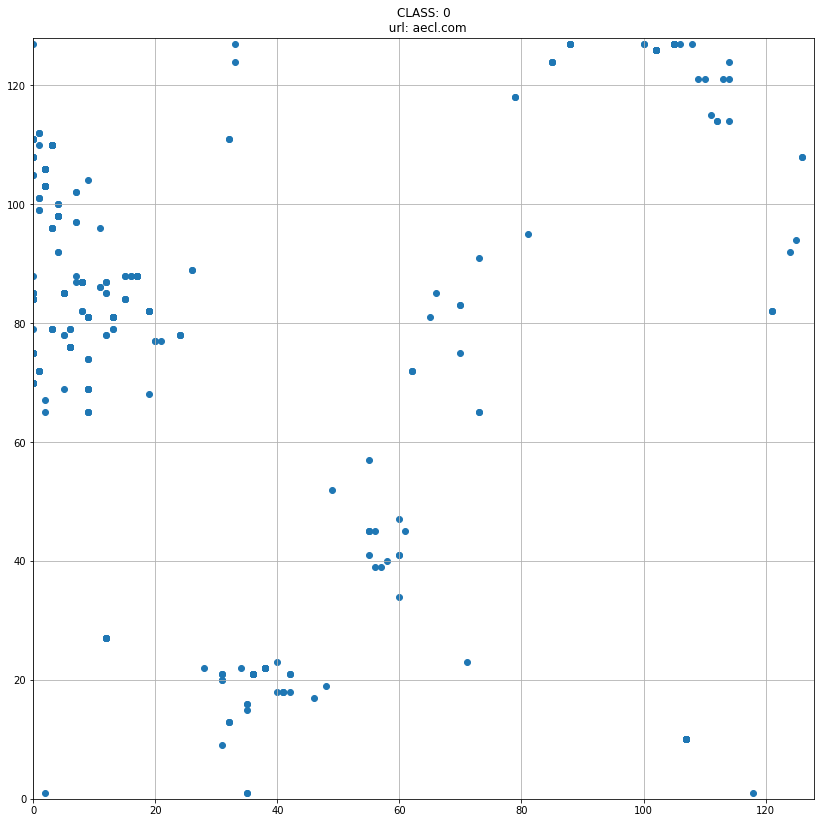

In [16]:
def import_from_data_file(url):
    with open(data_source, 'r') as source:
        for line in source:
            row_els = line.split('\t')
            binary = row_els[2]
            if url == row_els[0].strip():
                row_els = [word.lower().strip() for word in row_els[1].split(' ')]
                return binary, row_els
            else:
                continue
    print "URL NOT FOUND IN SOURCE FILE"
    return 0, []

import matplotlib.pyplot as plt
%matplotlib inline

data_source = 'data/data_for_classification.tsv'
weights_path = 'models/som_weights_3'
print "Loading weights"
som.weights = np.load("{}.npy".format(weights_path))


print "Importing from data file"
early_exit = 120
with open('data/urls_by_length.txt', 'r') as source:
    stop = 1
    idx = 0
    for line in source.readlines():
        if early_exit < 0:
            break
        early_exit -= 1
        url = line.split(' ')[2].strip()
        if idx > stop:
            idx += 1
            continue
        print "Processing url {}".format(url)
        binary, words = import_from_data_file(url)
        #print "Calculating x y coordinates of words"
        arrx = []
        arry = []
        print "Length of words", len(words)
        
        for word in words:
            try:
                x, y = som.winner(word_vectors[word])
                arrx.append(x)
                arry.append(y)
                #print word, str(x), str(y)
            except:
                pass


        #print "Plotting figure"
        fig = plt.figure(figsize=(14,14))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(arrx,arry)
        plt.axis([0,128,0,128])
        plt.grid()
        print "Saving figure to fingerprints/{}.png".format(url)
        plt.title("CLASS: {}  url: {}".format(str(binary), url))
        plt.savefig("fingerprints/{}.png".format(url))
        #plt.show()
print "DONE"